# Indian Startup Ecosystem: "Insights for Prospective Investors"

## 1. Business Understanding


### Business Scenario

Your team is trying to venture into the indian startup ecosystem. As the data experta of the team, you are to investigate the ecosystem and propose the best course of action.

To analyze funding recieved by start-ups in india from 2018 to 2021 provided;

- Separate data for each year 
- In the dataset you will find the start-up details, funding amounts received, and investors information.

### Business Objectives

The business objectives of the team are to:

- Understand the ecosystem of start-ups in India.
- Identify the best course of action to venture into the ecosystem.
- Identify the best start-ups to invest in.
- Identify the best sectors to invest in.
- Identify the best cities to invest in.

### Hypothesis Testing 

Null Hypothesis (H0): Funding amounts are evenly distributed across all sectors in the Indian startup ecosystem from 2018 to 2021, and technology-driven startups do not receive higher average funding compared to other sectors.

Alternative Hypothesis (H1): Funding amounts are not evenly distributed across all sectors in the Indian startup ecosystem from 2018 to 2021, and technology-driven startups receive higher average funding compared to other sectors.

### Key Questions
    
1. Which sectors (Top 5) are receiving the most investment in the Indian startup ecosystem?

2. How do funding amounts vary across different startup sectors, yearly?

3. At what stage do businesses raise the most money across sectors?

4. Which are the top 10 locations that received funding?

5. Are there specific cities that have become hubs for certain industries or types of startups?

6. Who are the top 3 investors in the top 5 sectors?

## 2. Data Understanding 

#### Sourcing the Dataset 

- The datasets(2020/2021) were sourced from a github repository, a onedrive account, and a SQL server database.  

- The data(2018) at a github repo was read directly using the web url and the dataframe saved as a csv file.  

- The data(2019) at a onedrive account was downloaded manually due to permission issues.

- The datasets hosted by a SQL server database was queried, and the respective dataframes saved as single files in csv format.  

#### Data Dictionary

| Column Names | Description | Data type |
| --- | --- | --- |
| Company/Brand | Name of company/start-up | Object |
| Founded | Year Start-up was founded | Int |
| Sector | Sector of service | Object |
| What it Does/About| Description about the company | Object |
| Founders | Founders of the company | Object|
| Investor | Investors | Object |
| Amount($) | Raised Amount | Float|
| Stage | Round of funding reached | Object |
| Headquarter | Location of company | Object | 

## 3. Data Preparation

In [1]:
### Import requisite libraries

# connect to databases using Open Database Connectivity (ODBC). 
import pyodbc

# To parse a .env file and return its contents as a dictionary.
from dotenv import dotenv_values 

# Loading of environment variables from a.env file into the environment.
from dotenv import load_dotenv 

# Control the display of warning messages.
import warnings 

# Suppress specific warnings during the execution of the code, to help keep the output clean.
warnings.filterwarnings('ignore') 

# To interact with the operating system. 
import os 

# Make HTTP requests interact with web services and APIs.
import requests 

# To read and write strings as file-like objects. 
from io import StringIO 

# Consists of various functions used for data cleaning, transformation, and analysis.
import pandas as pd 

# For numerical computing in python. 
import numpy as np  

# Create static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt 

# High-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Find the best matches for a given input from a list of possibilities. 
from difflib import get_close_matches 

#### DATASET HOSTED AT A GITHUB REPOSITORY - 2018

In [2]:
# Github repo url link
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

# Reading data from the Github repo link
data1 = pd.read_csv(url)

data1.tail(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [3]:
#Saving the dataset
data1.to_csv('../Datasets/startup_funding2018.csv', index=False)

#### SQL SERVER DATASETS - 2020 & 2021

In [4]:
# Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values("../.env")

# Get the values for the credentials you set in the '.env' file
# server    = environment_variables.get("SERVER")
#database  = environment_variables.get("DATABASE")
#username  = environment_variables.get("USERNAME")
#password  = environment_variables.get("PASSWORD")

#server = 'dap-projects-database.database.windows.net'
#database = 'dapDB'
#username = 'LP1_learner'
#password = 'Hyp0th3s!$T3$t!ng'


#connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Establish a connection to the DAPS Project database using the PyODBC library
#cnxn= pyodbc.connect(connection_string)


In [5]:
# Querying data from a DAP database table
#query1 = "SELECT * FROM LP1_startup_funding2021"

#data3 = pd.read_sql(query1, cnxn)

#data3.tail(5)

In [6]:
# Saving the dataframe
# data3.to_csv('../Datasets/startup_funding2020.csv', index=False)

In [7]:
# Querying data from another DAP database table
# query2 = "SELECT * FROM dbo.LP1_startup_funding2021"

#data4 = pd.read_sql(query2, cnxn)

#data4.tail(5)

In [8]:
#data4.to_csv('../Datasets/startup_funding2021.csv', index=False)

## Loading and Exploring the DataSets

All four (4) datasets from the three (3) sources were loaded one at a time. 

In [9]:
# 2018 dataset as df1
df1 = pd.read_csv('../Datasets/startup_funding2018.csv')

df1.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [10]:
# Get the number of rows and columns
rows, columns = df1.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 526
Number of columns: 6


In [11]:
# 2019 dataset as df2
df2 = pd.read_csv('../Datasets/startup_funding2019.csv')

df2.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [12]:
# Get the number of rows and columns
rows, columns = df2.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 89
Number of columns: 9


In [13]:
# 2020 dataset as df3
df3 = pd.read_csv("C:/Users/lenovo/Documents/Documents/personal/Azubi Africa/Git Assignment/LP1 repo/TEAM-FIJI_LPI/Datasets/2020 dataset.csv")

df3.head(5)

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN
3,3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN


In [14]:
# Get the number of rows and columns
rows, columns = df3.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1055
Number of columns: 11


In [15]:
# 2021 dataset as df4
df4 = pd.read_csv('../Datasets/startup_funding2021.csv')

df4.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [16]:
# Get the number of rows and columns
rows, columns = df4.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1209
Number of columns: 9


#### EXPLORING THE DATASETS

We identified several data quality issues while exploring the datasets:

1. Inconsistent and Missing Columns: Some datasets, such as the 2018 dataset, have inconsistent column structures with missing columns.

2. Missing Values and Duplicates: There are null values and duplicates within the individual datasets.

3. Inconsistent Values and Currencies in the Amount Column: The amount column contains inconsistent values and different currency types.

4. Inconsistent Values in the Sector, Location, and Industry Columns: These columns contain numerous inconsistent values that need to be addressed.

##### EDA - 2018 DATASET (df1)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [18]:
df1.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


Based on the info returned, there exists duplicates in the data and missing values.

###### Univariate Analysis 2018

In [19]:
# Check for missing values
print(df1.isnull().sum())

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64


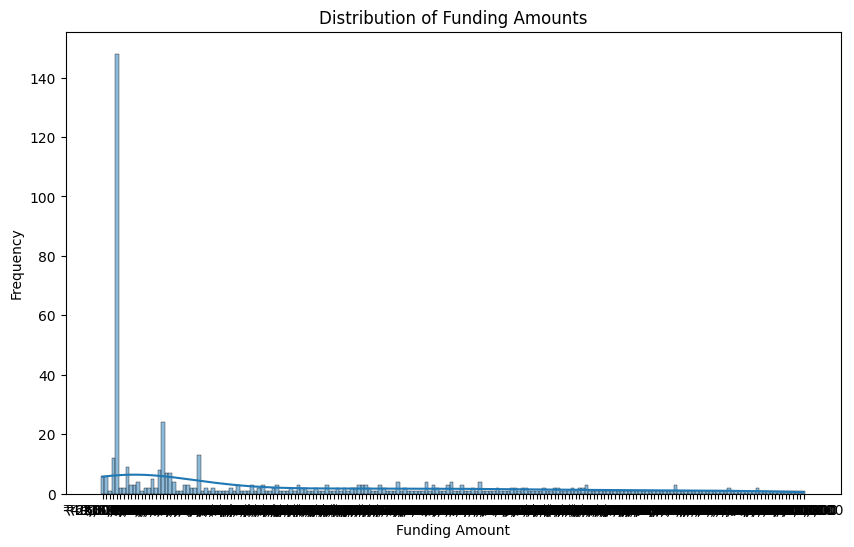

In [20]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df1['Amount'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()


Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

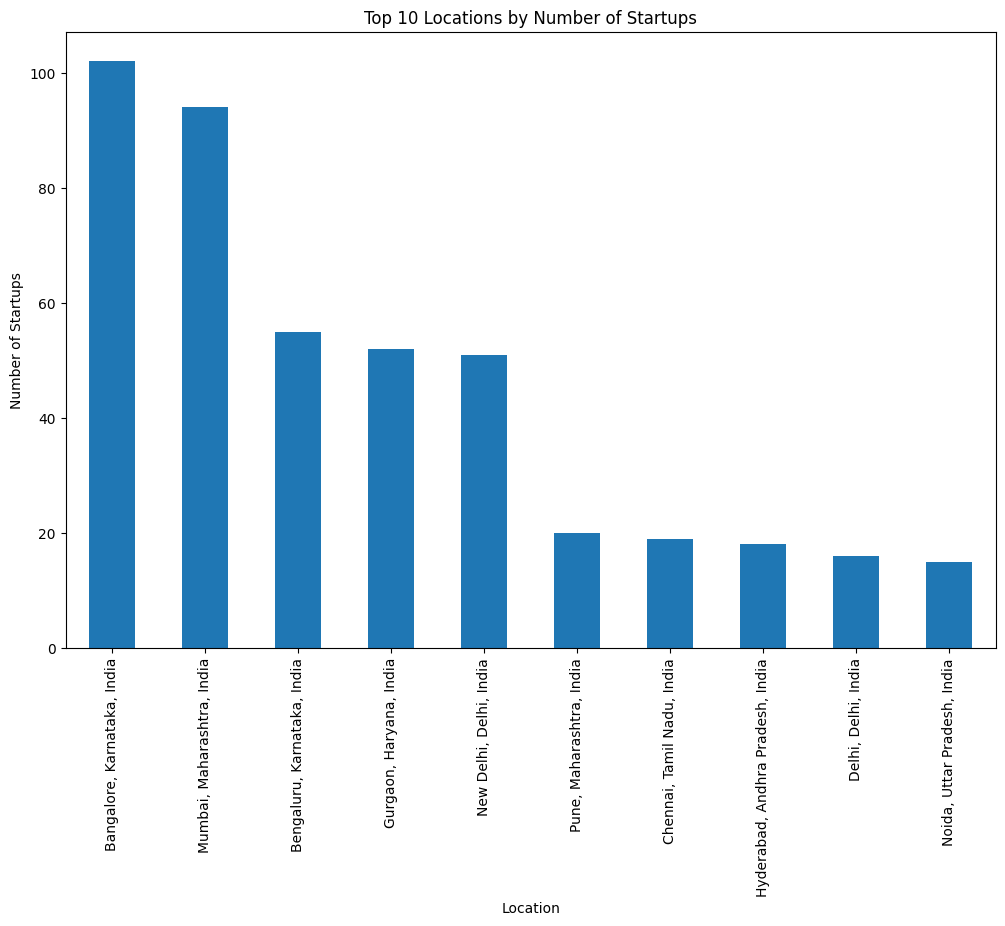

In [21]:
# Frequency count of 'location'

print(df1['Location'].value_counts())

# Bar plot of location

plt.figure(figsize=(12, 8))
df1['Location'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Locations by Number of Startups')
plt.xlabel('Location')
plt.ylabel('Number of Startups')
plt.show()

###### Multivariate Analysis 2018

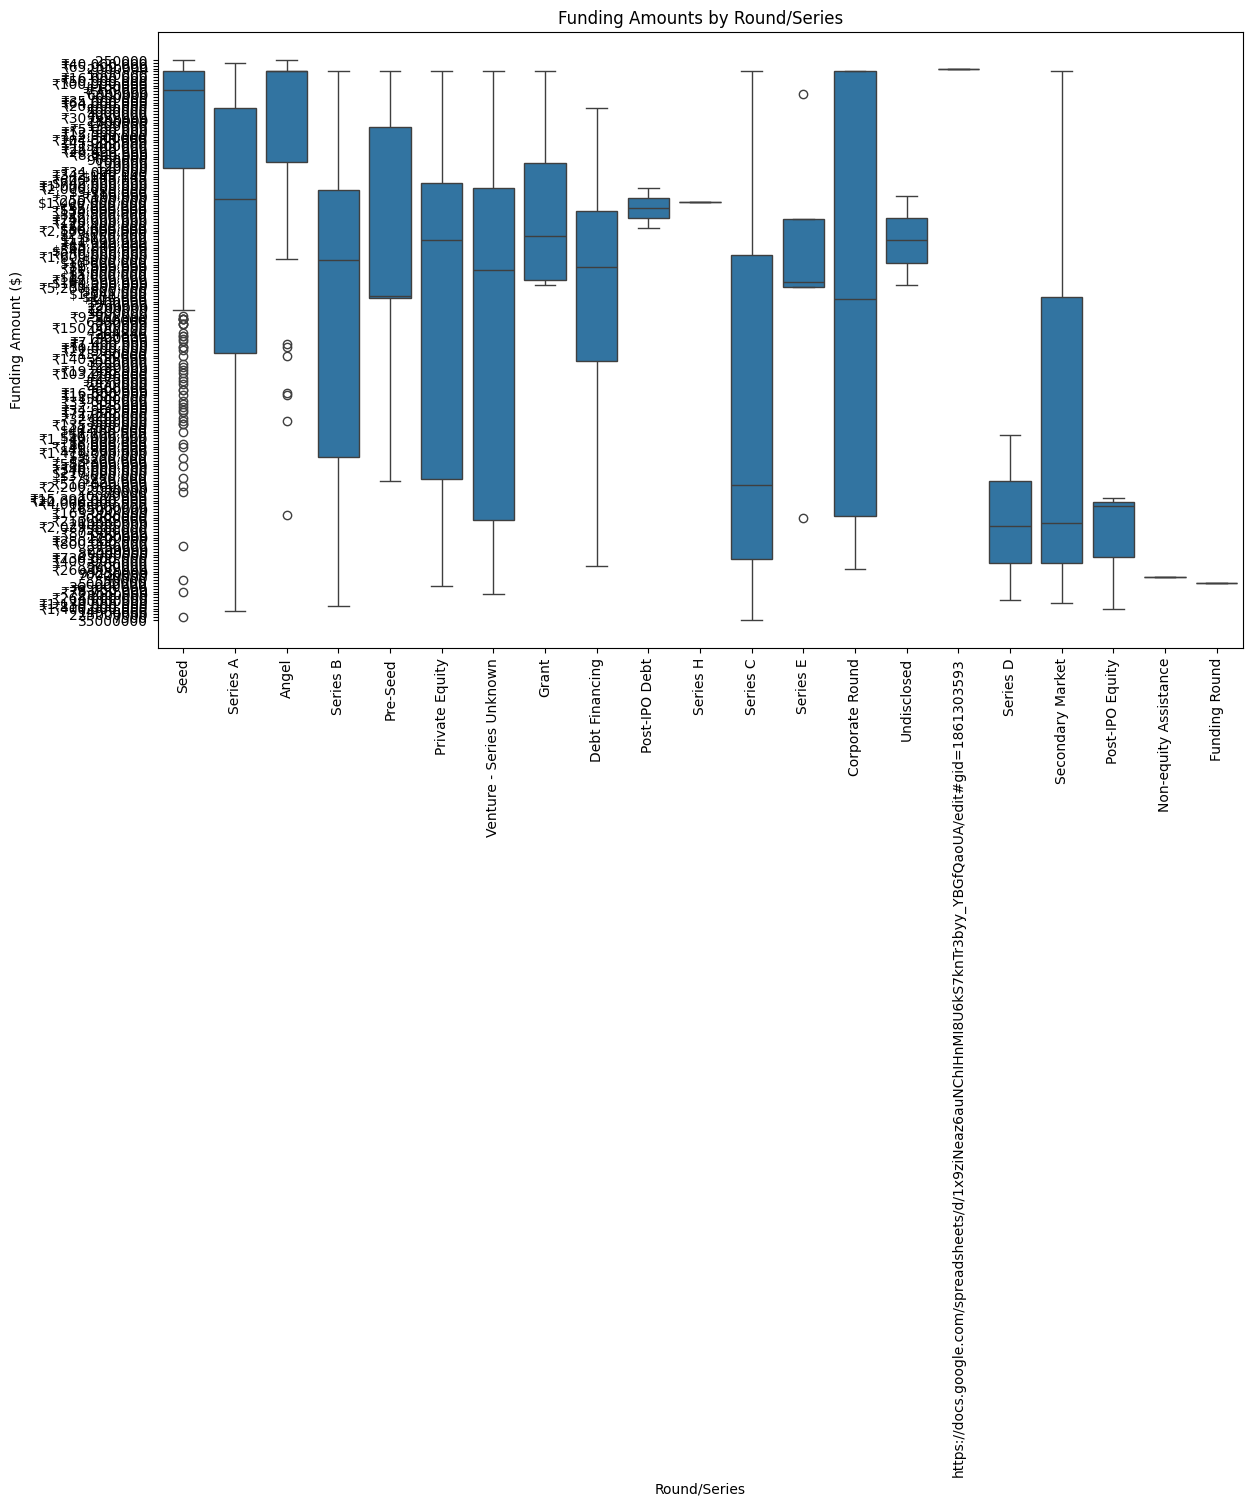

In [22]:
# Boxplot to show distribution of funding amounts across different round/series
plt.figure(figsize=(14, 8))
sns.boxplot(x='Round/Series', y='Amount', data=df1)
plt.title('Funding Amounts by Round/Series')
plt.xlabel('Round/Series')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=90)
plt.show()

##### EDA - 2019 DATASET (df2)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [24]:
df2.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


###### Univariate Analysis - 2019

In [25]:
# Check for missing values
print(df2.isnull().sum())

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64


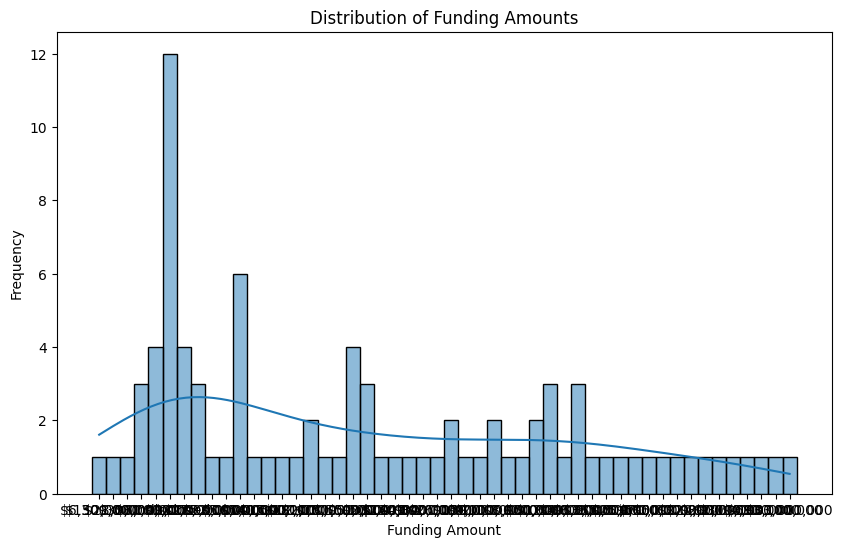

In [26]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df2['Amount($)'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()

HeadQuarter
Bangalore        21
Mumbai           12
Delhi            10
Noida             5
Gurugram          5
Chennai           4
Pune              2
Jaipur            2
Telangana         1
Ahmedabad         1
Haryana           1
Chandigarh        1
New Delhi         1
Surat             1
Uttar pradesh     1
Hyderabad         1
Rajasthan         1
Name: count, dtype: int64


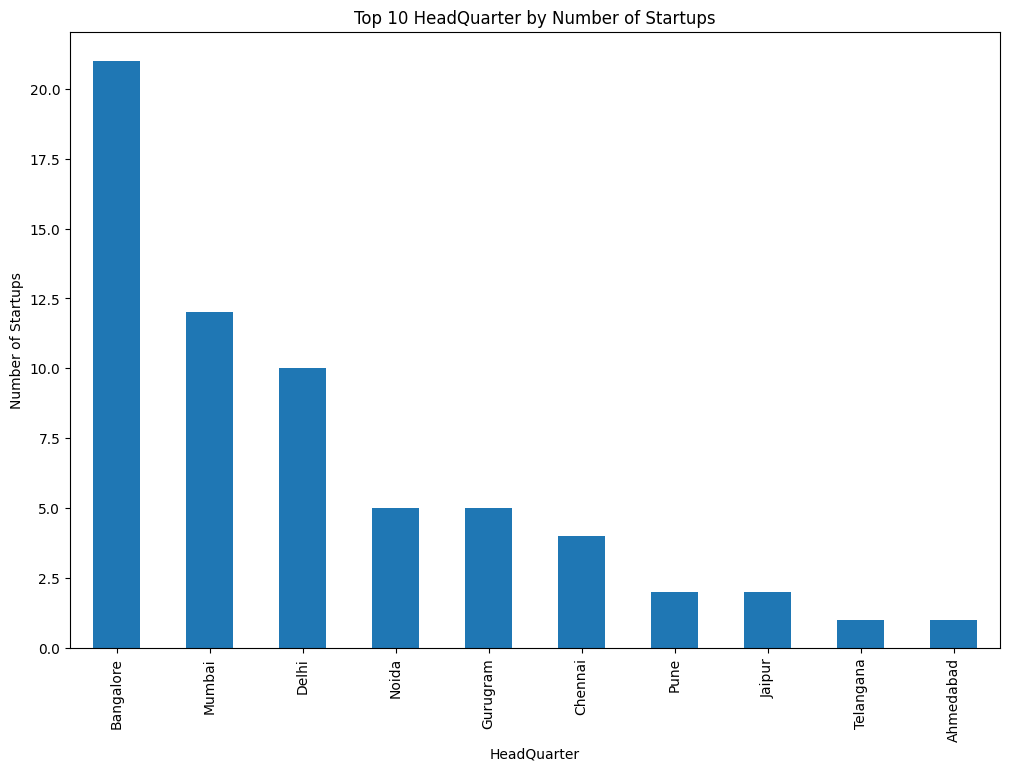

In [27]:
# Frequency count of 'location'

print(df2['HeadQuarter'].value_counts())

# Bar plot of location

plt.figure(figsize=(12, 8))
df2['HeadQuarter'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 HeadQuarter by Number of Startups')
plt.xlabel('HeadQuarter')
plt.ylabel('Number of Startups')
plt.show()

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

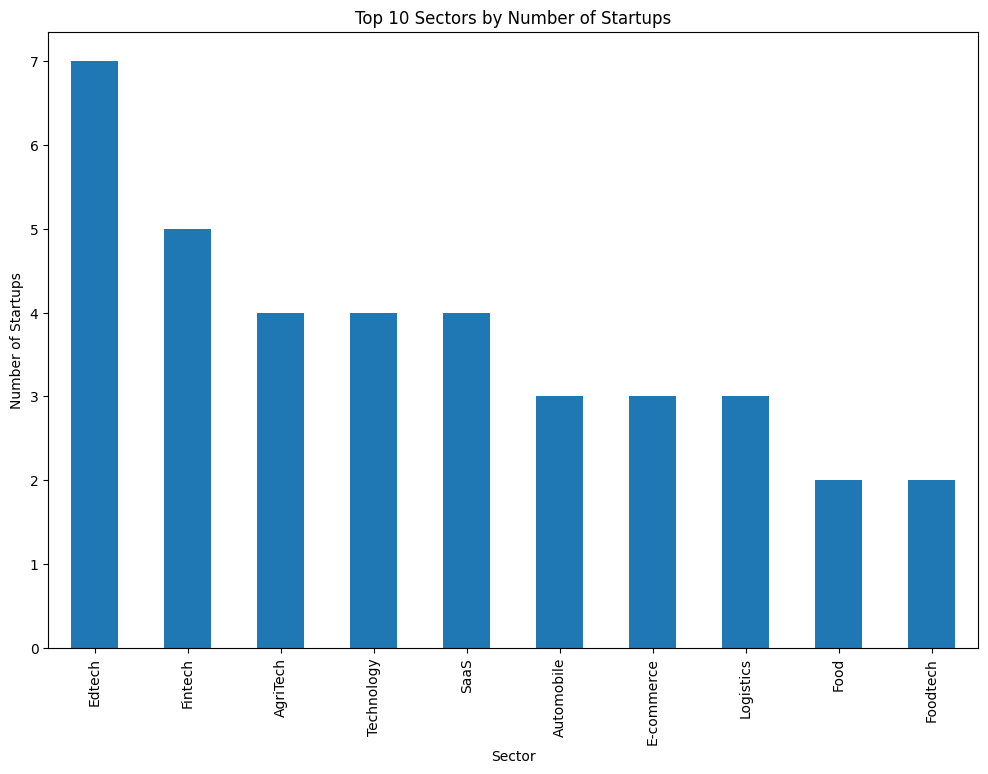

In [28]:
# Frequency count
print(df2['Sector'].value_counts())

# Bar plot
plt.figure(figsize=(12, 8))
df2['Sector'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sectors by Number of Startups')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.show()

###### Multivariate Analysis -2019

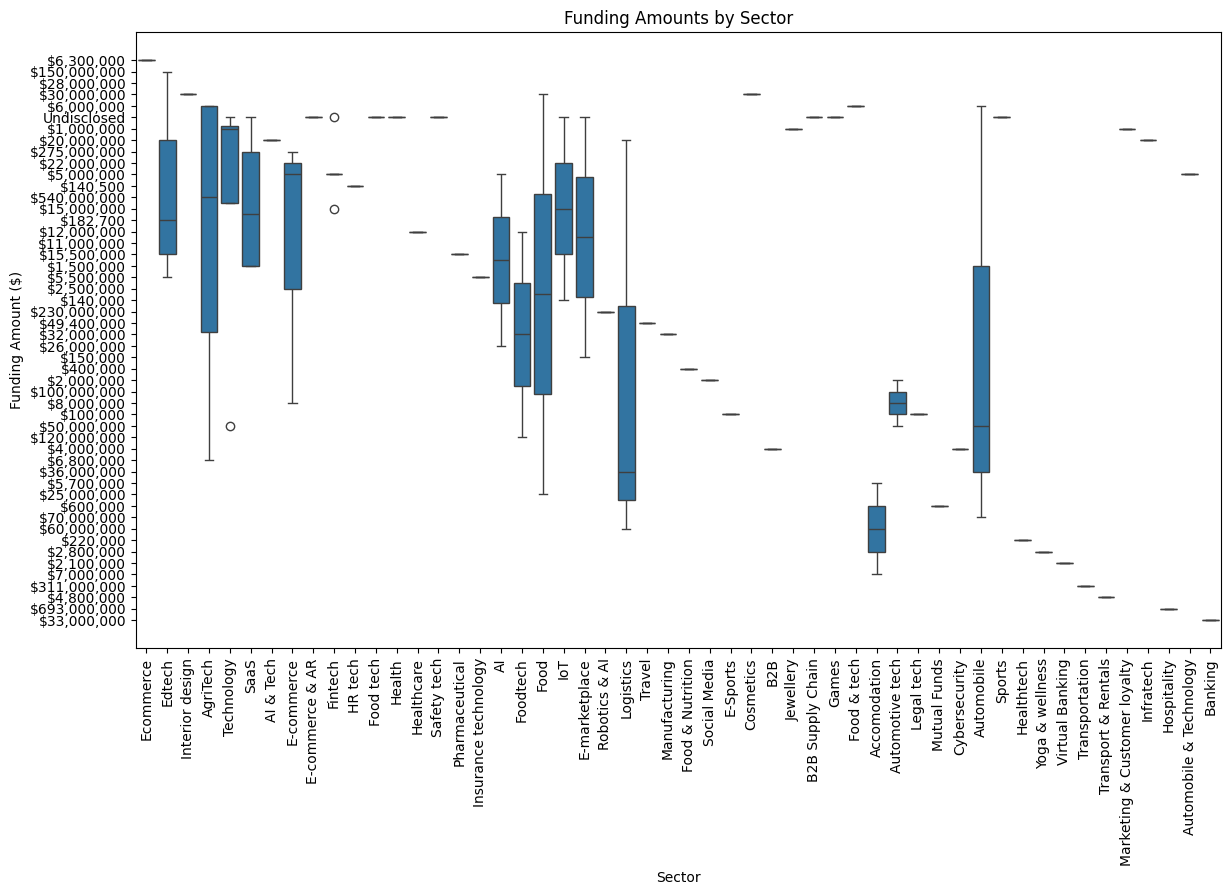

In [29]:
# Boxplot to show distribution of funding amounts across different sectors
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sector', y='Amount($)', data=df2)
plt.title('Funding Amounts by Sector')
plt.xlabel('Sector')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=90)
plt.show()



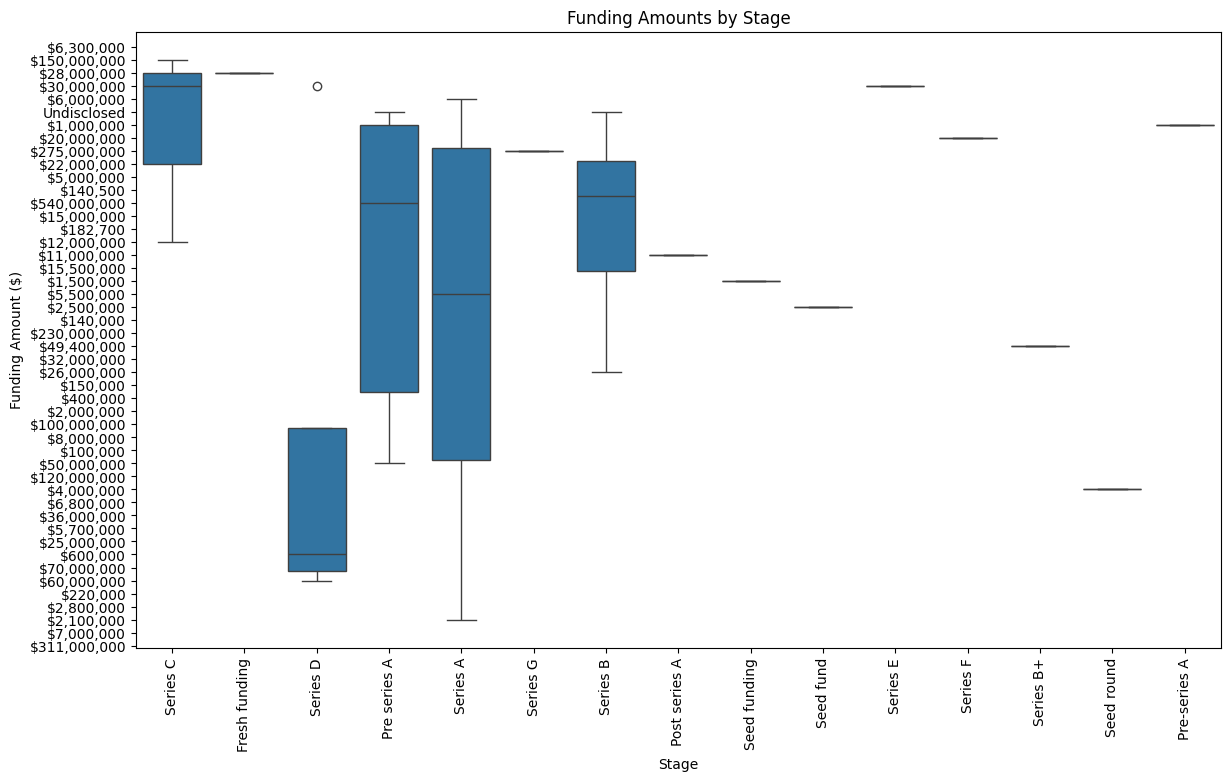

In [30]:
# Boxplot to show distribution of funding amounts across different stages
plt.figure(figsize=(14, 8))
sns.boxplot(x='Stage', y='Amount($)', data=df2)
plt.title('Funding Amounts by Stage')
plt.xlabel('Stage')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=90)
plt.show()

##### EDA - 2020 DATASET (df3)

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1055 non-null   int64  
 1   Company_Brand  1055 non-null   object 
 2   Founded        842 non-null    float64
 3   HeadQuarter    961 non-null    object 
 4   Sector         1042 non-null   object 
 5   What_it_does   1055 non-null   object 
 6   Founders       1043 non-null   object 
 7   Investor       1017 non-null   object 
 8   Amount         801 non-null    float64
 9   Stage          591 non-null    object 
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [32]:
df3.describe()

,Unnamed: 0,Founded,Amount
count,1055.00000,842.000000,8.010000e+02
mean,527.00000,2015.363420,1.130430e+08
std,304.69657,4.097909,2.476635e+09
min,0.00000,1973.000000,1.270000e+04
25%,263.50000,2014.000000,1.000000e+06
50%,527.00000,2016.000000,3.000000e+06
75%,790.50000,2018.000000,1.100000e+07
max,1054.00000,2020.000000,7.000000e+10


###### Univariate Analysis 2020

In [33]:
# Check for missing values
print(df3.isnull().sum())


Unnamed: 0          0
Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64


In [34]:
# Summary statistics
print(df3['Amount'].describe())

count    8.010000e+02
mean     1.130430e+08
std      2.476635e+09
min      1.270000e+04
25%      1.000000e+06
50%      3.000000e+06
75%      1.100000e+07
max      7.000000e+10
Name: Amount, dtype: float64


Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   40
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64


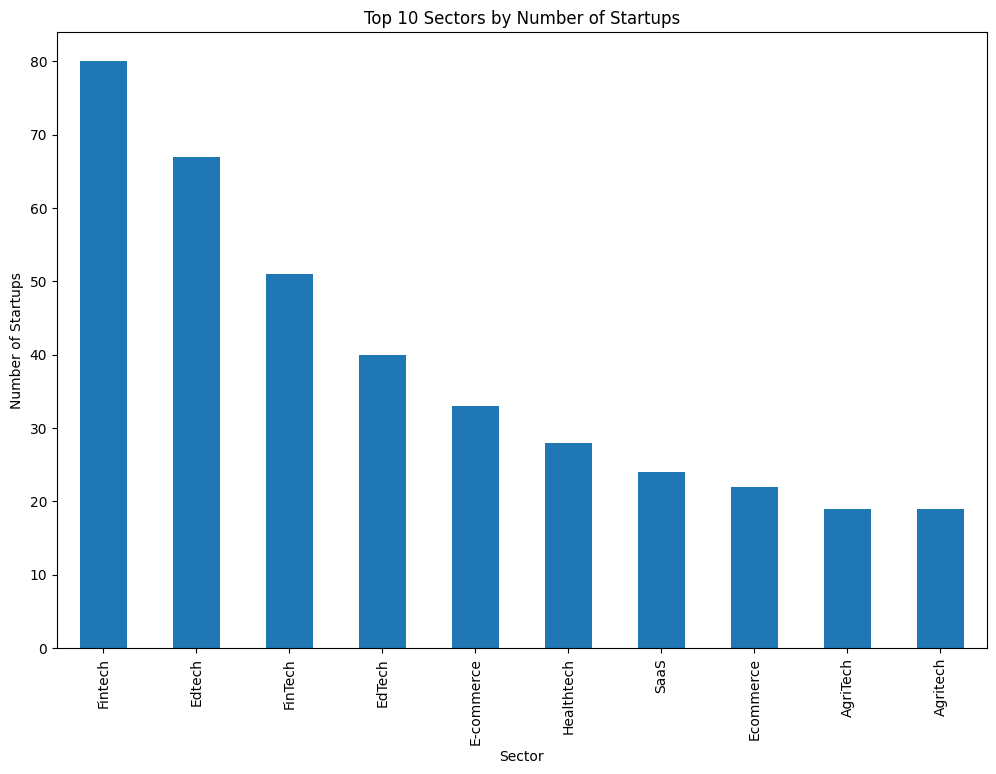

In [35]:
# Frequency count
print(df3['Sector'].value_counts())

# Bar plot
plt.figure(figsize=(12, 8))
df3['Sector'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sectors by Number of Startups')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.show()

###### Multivariate Analysis 2020

###### Boxplot to show distribution of funding amounts across different stages
This could not be done because the amount column contains non-numeric characters. This would be removed during the cleaning process.

##### EDA 2021 DATASET (df4)

In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [37]:
df4.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


###### Univariate Analysis 2021

In [38]:
# Check for missing values
print(df4.isnull().sum())


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64


In [39]:
# Summary statistics
print(df4['Amount'].describe())

count             1206
unique             278
top       $Undisclosed
freq                73
Name: Amount, dtype: object


Sector
FinTech                   122
EdTech                    102
Financial Services         61
E-commerce                 37
Food & Beverages           37
                         ... 
Manufacturing startup       1
Cryptocurrency              1
Vehicle repair startup      1
Advisory firm               1
Staffing & Recruiting       1
Name: count, Length: 254, dtype: int64


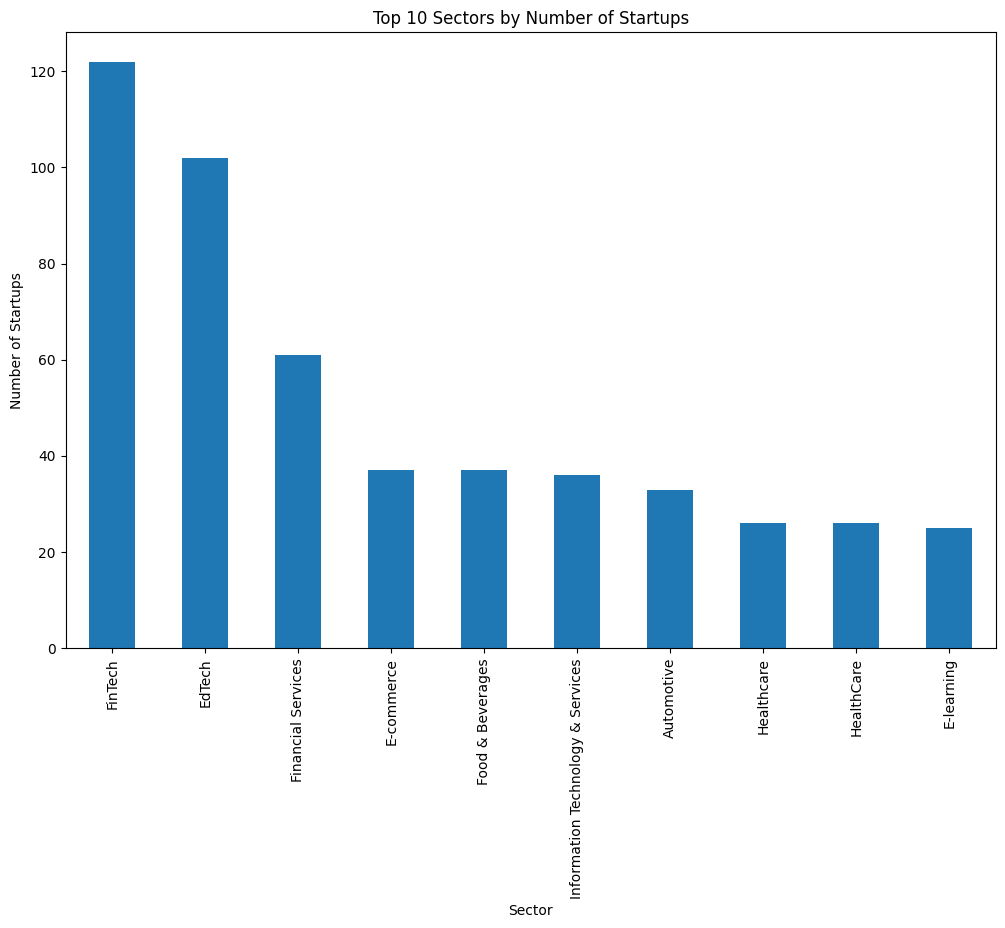

In [40]:
# Frequency count
print(df4['Sector'].value_counts())

# Bar plot
plt.figure(figsize=(12, 8))
df4['Sector'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sectors by Number of Startups')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.show()

###### Multivariate Analysis 2021


###### Boxplot to show distribution of funding amounts across different stages

This could not be done because the amount column contains non-numeric characters. This would be removed during the cleaning process.

## DATA CLEANING

#### 2018 DATASET (df1)

1. The "Year" column was created for the 2018 dataset to maintain row uniqueness after merging all datasets into one single dataframe. 

2. The "Headquarters" and "Sector" columns were created based on the "Location" and "Industry" columns respectively.  

3. The "Company Name" and "Round/Series" had to be renamed to make them consistent column names in other datasets. The "About Company" was renamed to "About" for simplicity.

4. The Location and "Industry" columns were dropped since they will be of no further use to the analytical process.

5. The Amount column was in the wrong data type. But before any corrections were made, we looked at the unique values present in the column so that appropriate steps would be taken. 

6. After viewing the unique values present in the column, we noticed that some records were expressed in terms of rupees, some in terms of dollars, and the rest had no currency designation. We decided to assume the currency of the undesignated records as dollars since there were more records with dollars symbol than those with rupees symbol. The records with the rupees symbol were converted to their respective dollar values in order to have the entire column in terms of dollars only. 

7. Since the column was in the string data type, we got all non-numeric characters and symbols removed. Then, we converted the entire column into the float data type. 

8. Taking a look at the df1 (2018 dataset) dataframe, we can see that there are no null values. The "Amount" column had a mean value of about USD12,626,950 , with minimum and maximum values of USD0.0 and UDS1,000,000,000 respectively. While the "Year" column had its mean, minimum and maximum values as 2018.

9. Duplicate values after cleaning was 1. 

##### Visualize 2018 Dataset before Cleaning

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
 6   Year           525 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


<Axes: >

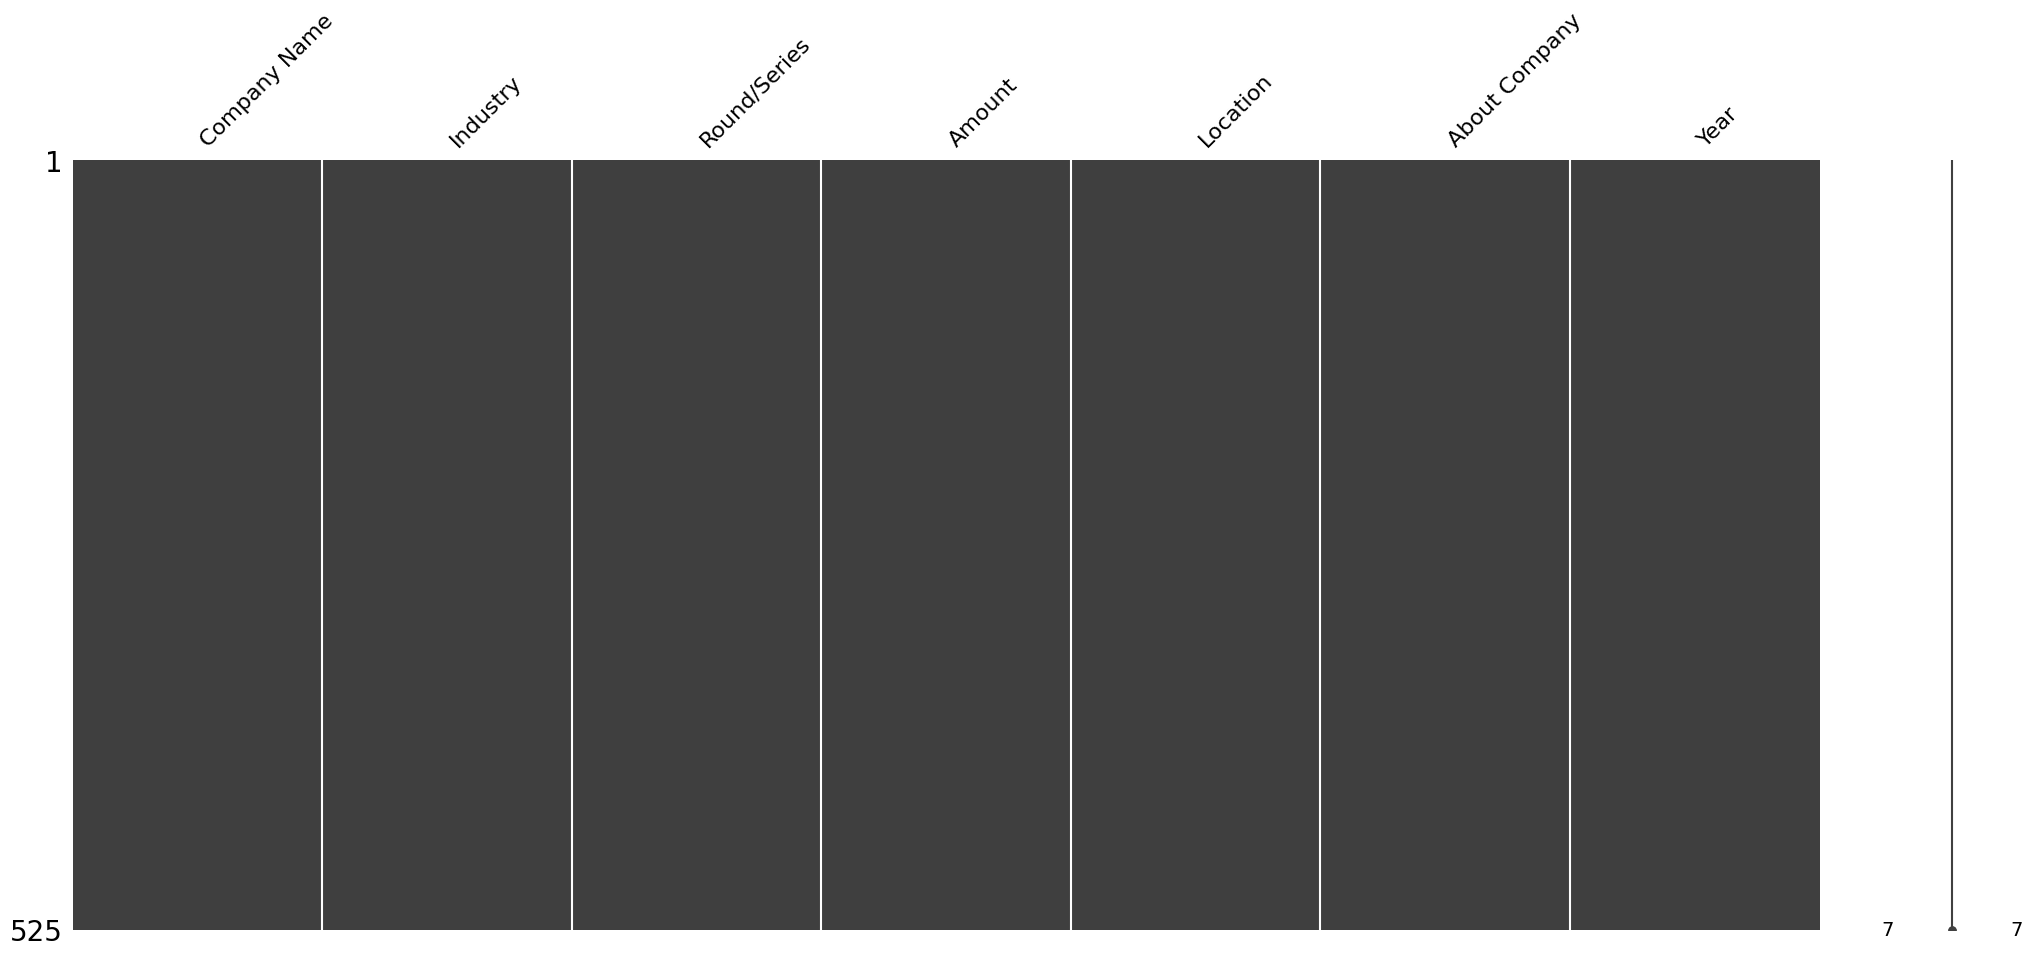

In [48]:
# Visualize Null values before cleaning
import missingno as msno
msno.matrix(df1)


In [49]:
# Add a Year column
year = 2018
df1['Year'] = year

##### Check and resolve Duplicates

In [50]:
# Check for dulicated values 
df1.duplicated().sum()

0

In [51]:
# Drop the duplicate value
df1.drop_duplicates(inplace=True)

##### Clean 'Location' Column

In [52]:
df1['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [53]:
# Create Headquarters column by extracting it from the location column
df1['Headquarter'] = df1['Location'].str.split().str.get(0)

# Print the DataFrame to view the 'Headquarters' column
print(df1['Headquarter'])

0      Bangalore,
1         Mumbai,
2        Gurgaon,
3          Noida,
4      Hyderabad,
          ...    
521    Bangalore,
522      Haryana,
523       Mumbai,
524       Mumbai,
525      Chennai,
Name: Headquarter, Length: 525, dtype: object


In [54]:
# print new values
df1['Headquarter'].unique()

array(['Bangalore,', 'Mumbai,', 'Gurgaon,', 'Noida,', 'Hyderabad,',
       'Bengaluru,', 'Kalkaji,', 'Delhi,', 'India,', 'Hubli,', 'New',
       'Chennai,', 'Mohali,', 'Kolkata,', 'Pune,', 'Jodhpur,', 'Kanpur,',
       'Ahmedabad,', 'Azadpur,', 'Haryana,', 'Cochin,', 'Faridabad,',
       'Jaipur,', 'Kota,', 'Anand,', 'Bangalore', 'Belgaum,', 'Thane,',
       'Margão,', 'Indore,', 'Alwar,', 'Kannur,', 'Trivandrum,',
       'Ernakulam,', 'Kormangala,', 'Uttar', 'Andheri,', 'Mylapore,',
       'Ghaziabad,', 'Kochi,', 'Powai,', 'Guntur,', 'Kalpakkam,',
       'Bhopal,', 'Coimbatore,', 'Worli,', 'Alleppey,', 'Chandigarh,',
       'Guindy,', 'Lucknow,'], dtype=object)

In [55]:
# Getting unique values of Headquarters column
unique_headquarters = df1['Headquarter'].unique()

# Defining a function to correct misspelled words based on unique values
def correct_spelling(text):
    closest_match = get_close_matches(text, unique_headquarters, n=1, cutoff=0.3)
    if closest_match:
        return closest_match[0]
    else:
        return text


df1['Headquarter'].str.replace(',', '').str.strip()

# Apply the correction function to the 'Headquarters' column
df1['Headquarter'] = df1['Headquarter'].str.replace(',', '').str.strip()

df1['Headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

In [56]:
# Mapping of old city names to new city names
city_mapping = {
    'Bangalore': 'Bangaluru',
    'Bengaluru': 'Bangaluru',
    'Delhi': 'New Delhi',
    'Trivandrum': 'Thiruvananthapuram',
    'Coimbatore': 'Kovai',
    'Madras': 'Chennai',
    'New': 'New Delhi',
    'Delhi': 'New Delhi'
}

# Defining a function to replace old city names with new city names
def replace_city_names(city):
    if city in city_mapping:
        return city_mapping[city]
    else:
        return city

# Replace old city names with new city names in the 'Headquarters' column
df1['Headquarter'] = df1['Headquarter'].apply(replace_city_names)
df1['Headquarter'].unique()

array(['Bangaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Thiruvananthapuram', 'Ernakulam', 'Kormangala', 'Uttar',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Kovai', 'Worli', 'Alleppey', 'Chandigarh',
       'Guindy', 'Lucknow'], dtype=object)

In [57]:
# preview dataset 2018
df1.head(2)


,Company Name,Industry,Round/Series,Amount,Location,About Company,Year,Headquarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangaluru
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Mumbai


In [58]:
# Remove the old 'Location' column
df1.drop(columns=['Location'], inplace=True)

##### Renaming Columns

In [59]:
# Creating Sector column for the 2018 database extracting it from the industry column
df1['Sector']= df1['Industry'].str.split().str.get(-1)
df1['Sector']

0           Ticketing
1             Farming
2         Marketplace
3             FinTech
4                SaaS
            ...      
521       Marketplace
522            Travel
523          Internet
524        Technology
525    Pharmaceutical
Name: Sector, Length: 525, dtype: object

In [60]:
# Rename some columns
df1.rename(columns={'Company Name': 'Company/Brand', 'Round/Series': 'Stage', 'About Company': 'About'}, inplace=True)
df1.tail(5)

,Company/Brand,Industry,Stage,Amount,About,Year,Headquarter,Sector
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Udaan is a B2B trade platform, designed specif...",2018,Bangaluru,Marketplace
522,Happyeasygo Group,"Tourism, Travel",Series A,—,HappyEasyGo is an online travel domain.,2018,Haryana,Travel
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mombay is a unique opportunity for housewives ...,2018,Mumbai,Internet
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Droni Tech manufacture UAVs and develop softwa...,2018,Mumbai,Technology
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,Welcome to India's most convenient pharmacy!,2018,Chennai,Pharmaceutical


##### Clean 'Amount' Column

In [61]:
# View unique values in the Amount column
df1['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [62]:
# Remove comma from all rows
df1['Amount'] = df1['Amount'].str.replace(',', '')
df1['Amount'].head(5)

0       250000
1    ₹40000000
2    ₹65000000
3      2000000
4            —
Name: Amount, dtype: object

In [63]:
# Function to convert rupees to dollars
def convert_to_dollars(amount):
    if pd.isnull(amount):
        return np.nan
    amount_str = str(amount)
    if amount_str.startswith('₹'):
        try:
            return float(amount_str[1:]) * 0.0146
        except ValueError:
            return np.nan
    else:
        try:
            return float(amount_str)
        except ValueError:
            return np.nan

# Apply the conversion function to the amount column
df1['Amount'] = df1['Amount'].apply(convert_to_dollars)

# Display the first 5 rows of the Amount column
print(df1['Amount'].head(5))

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          NaN
Name: Amount, dtype: float64


In [64]:
# Another view at outcome of comma removal
df1['Amount'].unique()

array([2.500000e+05, 5.840000e+05, 9.490000e+05, 2.000000e+06,
                nan, 1.600000e+06, 2.336000e+05, 7.300000e+05,
       1.460000e+06, 1.500000e+05, 1.100000e+06, 7.300000e+03,
       6.000000e+06, 6.500000e+05, 5.110000e+05, 9.344000e+05,
       2.920000e+05, 1.000000e+06, 5.000000e+06, 4.000000e+06,
       4.380000e+05, 2.800000e+06, 1.700000e+06, 1.300000e+06,
       7.300000e+04, 1.825000e+05, 2.190000e+05, 5.000000e+05,
       1.518400e+06, 6.570000e+05, 1.340000e+07, 3.650000e+05,
       3.854400e+05, 1.168000e+05, 8.760000e+02, 9.000000e+06,
       1.000000e+05, 2.000000e+04, 1.200000e+05, 4.964000e+05,
       4.993200e+06, 8.760000e+06, 1.460000e+07, 2.920000e+07,
       1.460000e+03, 3.650000e+06, 8.030000e+06, 3.504000e+06,
       1.752000e+06, 3.650000e+07, 6.424000e+05, 8.760000e+05,
       9.490000e+06, 2.336000e+07, 1.022000e+06, 1.496500e+06,
       1.752000e+04, 7.592000e+07, 1.400000e+06, 1.200000e+06,
       2.200000e+06, 1.800000e+06, 3.600000e+06, 1.3870

In [65]:
# Function to clean the Amount column

def clean_column(Amount):
    # Convert the series to string type
    Amount = Amount.astype(str)
    
    # Remove characters: $, space, .
    Amount = Amount.str.replace('[$ .]', '')

    Amount = Amount.str.replace('$', '')

    # Remove single quotation marks surrounding numbers
    Amount = Amount.str.replace(r"'(\d+)'", r'\1')

    # Replace '—' with 0
    Amount = Amount.str.replace('—', '0')

    return Amount

# Using the clean_column function
df1['Amount'] = clean_column(df1['Amount'])
df1['Amount'].head(5)


0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          nan
Name: Amount, dtype: object

In [66]:
# Convert the Amount column to float data type
df1['Amount'] = df1['Amount'].astype(float)
print(df1['Amount'].dtype)

print('\n')

df1['Amount'].unique()

float64




array([2.500000e+05, 5.840000e+05, 9.490000e+05, 2.000000e+06,
                nan, 1.600000e+06, 2.336000e+05, 7.300000e+05,
       1.460000e+06, 1.500000e+05, 1.100000e+06, 7.300000e+03,
       6.000000e+06, 6.500000e+05, 5.110000e+05, 9.344000e+05,
       2.920000e+05, 1.000000e+06, 5.000000e+06, 4.000000e+06,
       4.380000e+05, 2.800000e+06, 1.700000e+06, 1.300000e+06,
       7.300000e+04, 1.825000e+05, 2.190000e+05, 5.000000e+05,
       1.518400e+06, 6.570000e+05, 1.340000e+07, 3.650000e+05,
       3.854400e+05, 1.168000e+05, 8.760000e+02, 9.000000e+06,
       1.000000e+05, 2.000000e+04, 1.200000e+05, 4.964000e+05,
       4.993200e+06, 8.760000e+06, 1.460000e+07, 2.920000e+07,
       1.460000e+03, 3.650000e+06, 8.030000e+06, 3.504000e+06,
       1.752000e+06, 3.650000e+07, 6.424000e+05, 8.760000e+05,
       9.490000e+06, 2.336000e+07, 1.022000e+06, 1.496500e+06,
       1.752000e+04, 7.592000e+07, 1.400000e+06, 1.200000e+06,
       2.200000e+06, 1.800000e+06, 3.600000e+06, 1.3870

In [67]:
# perform a descriptive statistics on the new dataset
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,525,525,TheCollegeFever,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,525,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,525,21,Seed,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,318.0,NaN,NaN,NaN,10614981.232704,37112349.615185,876.0,485450.0,1051200.0,4000000.0,365000000.0
About,525,524,Algorithmic trading platform.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,525.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0
Headquarter,525,47,Bangaluru,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,525,137,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Cleaning 'Stage' Column



The "Stage" column will be categorized/clustered into the following stages:
1.	Early-Stage Funding: Pre-Seed, Seed

2.	Mid Stage Funding: Series A, Series B

3.	Late-Stage Funding: Series C, Series D, Series E, Series H

4.	Special Funding Types: Angel, Grant, Debt Financing, Non-equity Assistance

5.	Other Funding Types: Private Equity, Post-IPO Equity, Post-IPO Debt, Corporate Round, Secondary Market, Venture - Series Unknown, Funding Round

In [68]:
# check for unique values in the stage column
df1.Stage.unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [69]:
# Clean Stage column- Clustering
modified_stage_column = {
'Seed': 'Early Stage Funding',
'Series A':'Mid Stage Funding',
'Angel' : 'Special Funding Types',
'Series B' : 'Mid Stage Funding', 
'Series C' : 'Late Stage Funding',
'Pre-Seed' : 'Early Stage Funding',
'Private Equity' : 'Other Funding Types', 
'Venture - Series Unknown' : 'Other Funding Types',
'Grant' : 'Special Funding Types',
'Debt Financing' : 'Special Funding Types',
'Post-IPO Debt' : 'Other Funding Types',
'Series H' : 'Late Stage Funding',
'Series E' : 'Late Stage Funding',
'Corporate Round' : 'Other Funding Types',
'Undisclosed' : 'Other Funding Types',
'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' : 'Other Funding Types',
'Series D' : 'Late Stage Funding', 
'Secondary Market' : 'Other Funding Types', 
'Post-IPO Equity' : 'Other Funding Types',
'Non-equity Assistance' : 'Special Funding Types',
'Funding Round': 'Other Funding Types',  
}

In [70]:
# Replace 'Stage' with 'Modified_Stage'
df1['Stage']= df1['Stage'].replace(modified_stage_column)
df1.Stage.unique()

array(['Early Stage Funding', 'Mid Stage Funding',
       'Special Funding Types', 'Other Funding Types',
       'Late Stage Funding'], dtype=object)

In [71]:
df1['Stage'].isna().sum()

0

##### Impute Nulls in the 'Amount' Column

In [72]:
# Function to fill NaN values in the amount column with the average based on stage of company
def impute_amount_column(df,filter_name,fill_value):
    unique_values = df[filter_name].unique()
    for val, avg_amount in zip(unique_values,df.groupby(filter_name)[fill_value].transform('median')):
        df.loc[df[filter_name] == val, fill_value] = df.loc[df[filter_name] == val, fill_value].fillna(avg_amount)
    return df

In [73]:
# call the impute_amount_column
impute_amount_column(df1,"Stage","Amount")

,Company/Brand,Industry,Stage,Amount,About,Year,Headquarter,Sector
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Early Stage Funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangaluru,Ticketing
1,Happy Cow Dairy,"Agriculture, Farming",Early Stage Funding,584000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Farming
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Mid Stage Funding,949000.0,Leading Online Loans Marketplace in India,2018,Gurgaon,Marketplace
3,PayMe India,"Financial Services, FinTech",Special Funding Types,2000000.0,PayMe India is an innovative FinTech organizat...,2018,Noida,FinTech
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Early Stage Funding,584000.0,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,SaaS
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Late Stage Funding,225000000.0,"Udaan is a B2B trade platform, designed specif...",2018,Bangaluru,Marketplace
522,Happyeasygo Group,"Tourism, Travel",Mid Stage Funding,584000.0,HappyEasyGo is an online travel domain.,2018,Haryana,Travel
523,Mombay,"Food and Beverage, Food Delivery, Internet",Early Stage Funding,7500.0,Mombay is a unique opportunity for housewives ...,2018,Mumbai,Internet
524,Droni Tech,Information Technology,Early Stage Funding,511000.0,Droni Tech manufacture UAVs and develop softwa...,2018,Mumbai,Technology


In [74]:
# confirm changes
df1["Amount"].isnull().sum()

0

In [75]:
# Remove the old 'Location' column
df1.drop(columns=['Industry'], inplace=True)

##### Cleaning the 'Sector' Column


Source: https://www.businessinsider.in/business/startups/news/top-10-industries-for-new-startups-in-india-as-per-hurun-list/articleshow/105651758.cms

From research, there are 15 sectors in India where all these values in the sector column of the dataset can be generalised into. They are therefore mapped onto the 15 sectors which include:

- IT & Technology,
- Financial Services,
- Healthcare & Life Sciences,
- Consumer Goods,
- Business Services,
- Media & Entertainment,
- Education,
- Manufacturing,
- Retail,
- Transportation & Logistics,
- Sports,
- Agriculture,
- Real Estate,
- Travel & Tourism,
- Energy,
- Others.

In [76]:
# Check for unique values in the sector column 

df1["Sector"].sort_values().unique()

array(['Accommodations', 'Aerospace', 'Agriculture', 'Analytics', 'Apps',
       'Assessment', 'Assistant', 'Audio', 'Automation', 'Automotive',
       'Ball', 'Banking', 'Beverage', 'Biopharma', 'Biotechnology',
       'Businesses', 'Capital', 'Care', 'Chat', 'CleanTech', 'Consulting',
       'Consumer', 'Cosmetics', 'Delivery', 'Design', 'Development',
       'Device', 'Diagnostics', 'Dry-cleaning', 'E-Commerce',
       'E-Learning', 'Economy', 'Education', 'Electronics', 'Energy',
       'Engine', 'Enterprise', 'Entertainment', 'Entrepreneurship',
       'Estate', 'Events', 'Farming', 'Fashion', 'FinTech', 'Finance',
       'Food', 'Games', 'Gas', 'Goods', 'Health', 'Home', 'Hospital',
       'Hospitality', 'Improvement', 'Incubators', 'Industry',
       'Infrastructure', 'InsurTech', 'Insurance', 'Intelligence',
       'Internet', 'Jewelry', 'Learning', 'Lending', 'Lifestyle',
       'Logistics', 'Management', 'Manufacturing', 'Marketing',
       'Marketplace', 'Media', 'Medical', 

In [77]:
sector_mapping = {
'Accommodations': 'Travel & Tourism',
'Aerospace': 'Transportation & Logistics',
'Agriculture': 'Agriculture',
'Analytics': 'IT & Technology',
'Apps': 'IT & Technology',
'Assessment': 'Business Services',
'Assistant': 'IT & Technology',
'Audio': 'Media & Entertainment',
'Automation': 'Manufacturing',
'Automotive': 'Transportation & Logistics',
'Ball': 'Sports',
'Banking': 'Financial Services',
'Beverage': 'Consumer Goods',
'Biopharma': 'Healthcare & Life Sciences',
'Biotechnology': 'Healthcare & Life Sciences',
'Businesses': 'Business Services',
'Capital': 'Financial Services',
'Care': 'Healthcare & Life Sciences',
'Chat': 'IT & Technology',
'CleanTech': 'Energy',
'Consulting': 'Business Services',
'Consumer': 'Consumer Goods',
'Cosmetics': 'Consumer Goods',
'Delivery': 'Transportation & Logistics',
'Design': 'Business Services',
'Development': 'IT & Technology',
'Device': 'Healthcare & Life Sciences',
'Diagnostics': 'Healthcare & Life Sciences',
'Dry-cleaning': 'Business Services',
'E-Commerce': 'Retail',
'E-Learning': 'Education',
'Economy': 'Financial Services',
'Education': 'Education',
'Electronics': 'IT & Technology',
'Energy': 'Energy',
'Engine': 'Manufacturing',
'Enterprise': 'IT & Technology',
'Entertainment': 'Media & Entertainment',
'Entrepreneurship': 'Business Services',
'Estate': 'Real Estate',
'Events': 'Media & Entertainment',
'Farming': 'Agriculture',
'Fashion': 'Consumer Goods',
'FinTech': 'Financial Services',
'Finance': 'Financial Services',
'Food': 'Consumer Goods',
'Games': 'Media & Entertainment',
'Gas': 'Energy',
'Goods': 'Consumer Goods',
'Health': 'Healthcare & Life Sciences',
'Home': 'Consumer Goods',
'Hospital': 'Healthcare & Life Sciences',
'Hospitality': 'Travel & Tourism',
'Improvement': 'Consumer Goods',
'Incubators': 'Business Services',
'Industry': 'Manufacturing',
'Infrastructure': 'Manufacturing',
'InsurTech': 'Financial Services',
'Insurance': 'Financial Services',
'Intelligence': 'IT & Technology',
'Internet': 'IT & Technology',
'Jewelry': 'Consumer Goods',
'Learning': 'Education',
'Lending': 'Financial Services',
'Lifestyle': 'Consumer Goods',
'Logistics': 'Transportation & Logistics',
'Management': 'Business Services',
'Manufacturing': 'Manufacturing',
'Marketing': 'Business Services',
'Marketplace': 'Retail',
'Media': 'Media & Entertainment',
'Medical': 'Healthcare & Life Sciences',
"Men's": 'Consumer Goods',
'Mobile': 'IT & Technology',
'Nanotechnology': 'IT & Technology',
'Network': 'IT & Technology',
'Networking': 'IT & Technology',
'News': 'Media & Entertainment',
'Nutrition': 'Healthcare & Life Sciences',
'Outdoors': 'Consumer Goods',
'Outsourcing': 'Business Services',
'PaaS': 'IT & Technology',
'Parenting': 'Consumer Goods',
'Payments': 'Financial Services',
'Peer': 'Business Services',
'Personalization': 'IT & Technology',
'Pharmaceutical': 'Healthcare & Life Sciences',
'Platform': 'IT & Technology',
'Portals': 'IT & Technology',
'Processing': 'IT & Technology',
'Profit': 'Financial Services',
'Property': 'Real Estate',
'Publishing': 'Media & Entertainment',
'Reality': 'Media & Entertainment',
'Recognition': 'IT & Technology',
'Rental': 'Real Estate',
'Research': 'Business Services',
'Resources': 'IT & Technology',
'Restaurants': 'Consumer Goods',
'Retail': 'Retail',
'Robotics': 'IT & Technology',
'SaaS': 'IT & Technology',
'Safety': 'IT & Technology',
'Security': 'IT & Technology',
'Semiconductor': 'IT & Technology',
'Services': 'Business Services',
'Sharing': 'IT & Technology',
'Shoes': 'Consumer Goods',
'Shopping': 'Retail',
'Social': 'IT & Technology',
'Software': 'IT & Technology',
'Solar': 'Energy',
'Sports': 'Sports',
'Storage': 'IT & Technology',
'Streaming': 'Media & Entertainment',
'Systems': 'IT & Technology',
'TV': 'Media & Entertainment',
'Tea': 'Consumer Goods',
'Technology': 'IT & Technology',
'Telecommunications': 'IT & Technology',
'Ticketing': 'Media & Entertainment',
'Tourism': 'Travel & Tourism',
'Training': 'Education',
'Transportation': 'Transportation & Logistics',
'Travel': 'Travel & Tourism',
'Tutoring': 'Education',
'Vehicle': 'Transportation & Logistics',
'Vehicles': 'Transportation & Logistics',
'Veterinary': 'Healthcare & Life Sciences',
'Video': 'Media & Entertainment',
'Wearables': 'IT & Technology',
'Wedding': 'Consumer Goods',
'Wellness': 'Healthcare & Life Sciences',
'Wireless': 'IT & Technology',
"Women's": 'Consumer Goods',
'mHealth': 'Healthcare & Life Sciences',
'—': 'Others'
}

# Apply the mapping to categorize the industries
df1['Sector'] = df1['Sector'].map(sector_mapping)
df1.Sector.unique()

array(['Media & Entertainment', 'Agriculture', 'Retail',
       'Financial Services', 'IT & Technology', 'Business Services',
       'Consumer Goods', 'Transportation & Logistics', 'Manufacturing',
       'Travel & Tourism', 'Education', 'Energy',
       'Healthcare & Life Sciences', 'Others', 'Sports', 'Real Estate'],
      dtype=object)

In [78]:
# Replacing the sector column values with the new sectors
df1["Sector"]= df1["Sector"].replace(sector_mapping)
df1.head(2)

,Company/Brand,Stage,Amount,About,Year,Headquarter,Sector
0,TheCollegeFever,Early Stage Funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangaluru,Media & Entertainment
1,Happy Cow Dairy,Early Stage Funding,584000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture


In [79]:
# count the number of the new sectors
df1["Sector"].value_counts()

Sector
IT & Technology               134
Business Services              65
Healthcare & Life Sciences     47
Financial Services             43
Others                         30
Consumer Goods                 29
Retail                         28
Education                      28
Media & Entertainment          27
Transportation & Logistics     23
Travel & Tourism               18
Manufacturing                  16
Real Estate                    12
Sports                         10
Energy                          9
Agriculture                     6
Name: count, dtype: int64

In [80]:
# filter only the rows with the "Others" sector
others_cat = df1[df1["Sector"] == "Others" ]
others_cat

,Company/Brand,Stage,Amount,About,Year,Headquarter,Sector
58,MissMalini Entertainment,Early Stage Funding,1518400.0,MissMalini Entertainment is a multi-platform n...,2018,Mumbai,Others
105,Jagaran Microfin,Special Funding Types,8030000.0,Jagaran Microfin is a Microfinance institution...,2018,Kolkata,Others
121,FLEECA,Early Stage Funding,584000.0,FLEECA is a Tyre Care Provider company.,2018,Jaipur,Others
146,WheelsEMI,Mid Stage Funding,584000.0,"WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,Pune,Others
153,Fric Bergen,Other Funding Types,511000.0,Fric Bergen is a leader in the specialty food ...,2018,Alwar,Others
174,Deftouch,Early Stage Funding,584000.0,Deftouch is a mobile game development company ...,2018,Bangaluru,Others
181,Corefactors,Early Stage Funding,584000.0,"Corefactors is a leading campaign management, ...",2018,Bangaluru,Others
210,Cell Propulsion,Early Stage Funding,102200.0,Cell Propulsion is an electric mobility startu...,2018,Bangaluru,Others
230,Flathalt,Special Funding Types,50000.0,FInd your Customized Home here.,2018,Gurgaon,Others
235,dishq,Early Stage Funding,400000.0,dishq leverages food science and machine learn...,2018,Bangaluru,Others


In [81]:
# view the descriptions of the companies with the others categories
others_cat['About']

58     MissMalini Entertainment is a multi-platform n...
105    Jagaran Microfin is a Microfinance institution...
121              FLEECA is a Tyre Care Provider company.
146    WheelsEMI is the brand name of NBFC, WheelsEMI...
153    Fric Bergen is a leader in the specialty food ...
174    Deftouch is a mobile game development company ...
181    Corefactors is a leading campaign management, ...
210    Cell Propulsion is an electric mobility startu...
230                      FInd your Customized Home here.
235    dishq leverages food science and machine learn...
238    Trell is a location based network which helps ...
242          New Apartments, Flats for Sale in Bangalore
243    It is a fabless semiconductor company focused ...
247    SaffronStays connects travellers to India's In...
251    Inner Being Wellness manufactures beauty, well...
257    SEO, PPC, Search Engine Marketing, Social Medi...
258                             Digital Marketing Agency
259    Scale Labs is a cross bo

In [82]:
# create dictionary to contain the keywords in the About column
keywords = {
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Travel & Tourism',
    'beauty, wellness': 'Consumer Goods',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Travel & Tourism',
    'edutech': 'Education'
}

In [83]:
# Function to assign sector based on description
def assign_sector(About):
    for keyword,Sector in keywords.items():
        if keyword in About.lower():
            return Sector
    return "Others" #Keep Others if no keyword matches

In [84]:
# Update sectors for entries currently labeled as "Others"
df1.loc[df1['Sector'] == 'Others', 'Sector'] = df1.loc[df1['Sector'] == 'Others', 'About'].apply(assign_sector)

In [85]:
# confirm changes
df1["Sector"].value_counts()

Sector
IT & Technology               139
Business Services              69
Financial Services             48
Healthcare & Life Sciences     47
Consumer Goods                 34
Education                      29
Media & Entertainment          28
Retail                         28
Transportation & Logistics     24
Travel & Tourism               19
Manufacturing                  16
Real Estate                    12
Sports                         10
Energy                          9
Others                          7
Agriculture                     6
Name: count, dtype: int64

<Axes: >

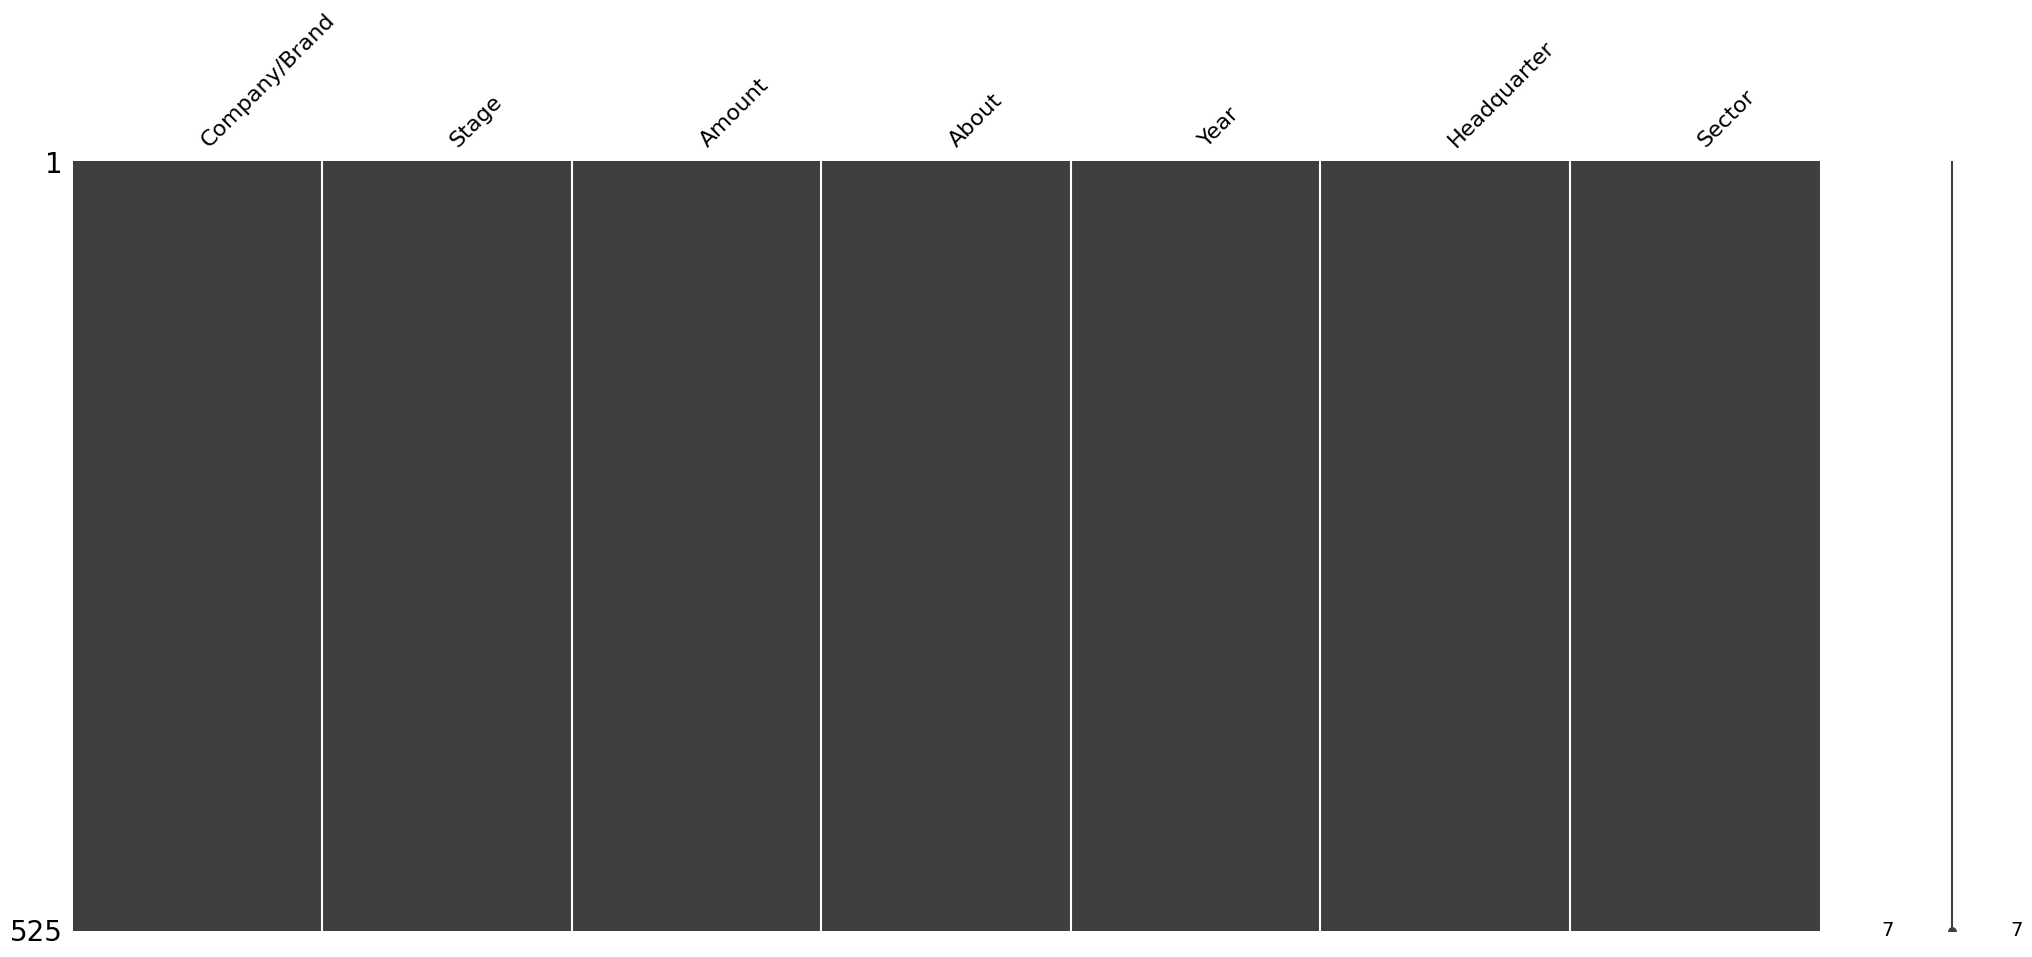

In [86]:
msno.matrix(df1)

In [87]:
# Print the list of column names
print(df1.columns.tolist())

['Company/Brand', 'Stage', 'Amount', 'About', 'Year', 'Headquarter', 'Sector']


#### 2019 DATASET (df2)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [89]:
# check for missing values in dataset
df2.isnull().sum()


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

##### Read values from a cleaned dataset to replace the missing values in the dirty values

In [90]:
import chardet

#importing a reviewed copy of the 2019 dataset
with open("C:/Users/lenovo/Documents/Documents/personal/Azubi Africa/Git Assignment/LP1 repo/TEAM-FIJI_LPI/Datasets/File-in data.csv", 'rb') as f:
    result = chardet.detect(f.read())
    detected_encoding = result['encoding']
    print(f'Detected encoding: {detected_encoding}')

# Read the file with the detected encoding
df_2019 = pd.read_csv("C:/Users/lenovo/Documents/Documents/personal/Azubi Africa/Git Assignment/LP1 repo\TEAM-FIJI_LPI/Datasets/File-in data.csv", encoding=detected_encoding)

# Verify content 
print(df_2019.head(5))

Detected encoding: ISO-8859-1
    Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving     2015   New Delhi        Ecommerce   
1       Ruangguru     2014      Mumbai           Edtech   
2        Eduisfun     2014      Mumbai           Edtech   
3        HomeLane     2014     Chennai  Interior design   
4        Nu Genes     2004   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

             

In [91]:
df_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015,New Delhi,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Debt Financing
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,2014,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Seed


In [92]:
df_2019.isnull().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [93]:
# Fill null values in 'df2' with corresponding values from 'df_2019'
data = df2.fillna(df_2019)

print(data.head())  # Print the new DataFrame 'data' with filled values

    Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving   2015.0   New Delhi        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun   2014.0      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                           

In [94]:
data.isnull().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [95]:
data.tail(20) # Print the new DataFrame 'data'

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
69,Nivesh.com,2016.0,Noida,Mutual Funds,The platform simplifies the process of investment,"Anurag Garg, Sridhar Srinivasan",Windrose Capital,"$600,000",Series A
70,Zebu,2015.0,Chennai,Cybersecurity,Platform uses encryption technology to allow b...,Team of Waterloo-based software developers,Undisclosed,"$4,000,000",Seed round
71,Smart Institute,2008.0,Surat,Edtech,A platform to learn online,Dr. Akhil Shahani,HNI investors,"$1,500,000",Seed
72,CarDekho,2008.0,Jaipur,Automobile,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...","$70,000,000",Series D
73,Shadowfax,2015.0,Bangalore,Logistics,A platform for delivery services,"Abhishek Bansal, Vaibhav Khandelwal","Flipkart, Eight Roads Ventures, NGP Capital, Q...","$60,000,000",Series D
74,Credr,2014.0,Mumbai,Automobile,A marketplace to buy and sell used bikes and s...,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...","$6,000,000",Series B
75,Sportido,2015.0,Noida,Sports,It is a sports discovery app that helps to fin...,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",Undisclosed,Series B
76,Phable,2018.0,Bengalore,Healthtech,"It creates an engagement loop between doctors,...",Sumit Sinha,"LetsVenture, 91 Springboard, IKP Knowledge, An...","$220,000",Series A
77,Sarva,2016.0,Chennai,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,"Venture fund, Fireside Ventures.","$2,800,000",Series B
78,IndyFint,2019.0,Bangalore,Virtual Banking,It helps lenders to directly provide short-ter...,Paddy Padmanabhan,Saravanan Adiseshan,"$2,100,000",Series A


##### Add a new column

In [96]:
# Add a Year column
year = 2019
data['Year'] = year
data.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,2015.0,New Delhi,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Debt Financing,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,2014.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Seed,2019


##### Clean 'location' Column

In [97]:
data['HeadQuarter'].unique()

array(['New Delhi', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Bengalore', 'Gurugram',
       'Nova-Brazil', 'Gurgaon', 'Haryana', 'San Francisco', 'Chandigarh',
       'Jaipur', 'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'],
      dtype=object)

In [98]:
# Getting unique values of Headquarters column
unique_headquarters = data['HeadQuarter'].unique()

#Defining a function to correct misspelled words based on unique values
def correct_spelling(text):
    closet_match = get_close_matches(text, unique_headquarters, n=1, cutoff=0.3)
    if closet_match:
        return closet_match[0]
    else:
        return text
    
data['HeadQuarter'].str.replace(',', '').str.strip()

# Apply the corection function to the 'Headquaters' column
data['HeadQuarter'] = data['HeadQuarter'].str.replace(',','').str.strip()
data['HeadQuarter'].unique()

array(['New Delhi', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Bengalore', 'Gurugram',
       'Nova-Brazil', 'Gurgaon', 'Haryana', 'San Francisco', 'Chandigarh',
       'Jaipur', 'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'],
      dtype=object)

In [99]:
# Mapping of old city names to new city names
city_mapping = {
    'Bangalore': 'Bangaluru',
    'Bengaluru': 'Bangaluru',
    'Delhi': 'New Delhi',
    'Trivandrum': 'Thiruvananthapuram',
    'Coimbatore': 'Kovai',
    'Madras': 'Chennai',
    'New': 'New Delhi',
    'Delhi': 'New Delhi'
}

# Defining a function to replace old city names with new city names
def replace_city_names(city):
    if city in city_mapping:
        return city_mapping[city]
    else:
        return city

# Replace old city names with new city names in the 'Headquarters' column
data['HeadQuarter'] = data['HeadQuarter'].apply(replace_city_names)
data['HeadQuarter'].unique()

array(['New Delhi', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangaluru',
       'Noida', 'Ahmedabad', 'Bengalore', 'Gurugram', 'Nova-Brazil',
       'Gurgaon', 'Haryana', 'San Francisco', 'Chandigarh', 'Jaipur',
       'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'], dtype=object)

##### Rename Columns

In [100]:
# Rename some columns
data.rename(columns={'HeadQuarter': 'Headquarter', 'What it does': 'About', 'Amount($)': 'Amount'}, inplace= True)
data.head(6)

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,2015.0,New Delhi,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Debt Financing,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,2014.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Seed,2019
5,FlytBase,2013.0,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,seed,2019


##### Clean 'Amount' Column

In [101]:
# Function to clean the Amount column
def clean_column(Amount):
    # Convert the series to string type
    Amount = Amount.astype(str)
    
    # Remove dollar signs, spaces, and periods
    Amount = Amount.str.replace('[$ .]', '', regex=True)
    
    # Remove single quotation marks surrounding numbers
    Amount = Amount.str.replace(r"'(\d+)'", r'\1', regex=True)
    
    # Replace '-' with 0
    Amount = Amount.str.replace('-', '0')
    
    return Amount 

# Using the clean_column function
data['Amount'] = clean_column(data['Amount'])
print(data['Amount'].head(5))

0      6,300,000
1    150,000,000
2     28,000,000
3     30,000,000
4      6,000,000
Name: Amount, dtype: object


In [102]:
# Function to convert the amount to a float or handle "Undisclosed"
def convert_to_dollars(amount):
    if pd.isnull(amount):
        return np.nan
    amount_str = str(amount).strip()
    if amount_str.lower() == 'undisclosed':
        return 'undisclosed'
    else:
        try:
            return float(amount_str.replace('$', '').replace(',', ''))
        except ValueError as e:
            print(f"ValueError converting '{amount_str}': {e}")  # Debugging output
            return np.nan

# Assuming `data` is your DataFrame
# Apply the conversion function to the amount column
data['Amount'] =data['Amount'].apply(convert_to_dollars)

# Display the first 10 rows of the DataFrame
print(data.head(10))

# Check if the "Amount" column is of float data type
print(data['Amount'].dtype)

# Check if each entry in the "Amount" column is a float
is_float = data['Amount'].apply(lambda x: isinstance(x, float))
print(is_float)

# Check if all entries are floats
all_floats = is_float.all()
print(f"All entries are floats: {all_floats}")

    Company/Brand  Founded Headquarter           Sector  \
0  Bombay Shaving   2015.0   New Delhi        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun   2014.0      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   
5        FlytBase   2013.0        Pune       Technology   
6           Finly   2015.0   Bangaluru             SaaS   
7        Kratikal   2013.0       Noida       Technology   
8       Quantiphi   2013.0      Mumbai        AI & Tech   
9        Lenskart   2010.0   New Delhi       E-commerce   

                                               About  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   
5             

In [103]:
data['Amount'].unique()

array([6300000.0, 150000000.0, 28000000.0, 30000000.0, 6000000.0,
       'undisclosed', 1000000.0, 20000000.0, 275000000.0, 22000000.0,
       5000000.0, 140500.0, 540000000.0, 15000000.0, 182700.0, 12000000.0,
       11000000.0, 15500000.0, 1500000.0, 5500000.0, 2500000.0, 140000.0,
       230000000.0, 49400000.0, 32000000.0, 26000000.0, 150000.0,
       400000.0, 2000000.0, 100000000.0, 8000000.0, 100000.0, 50000000.0,
       120000000.0, 4000000.0, 6800000.0, 36000000.0, 5700000.0,
       25000000.0, 600000.0, 70000000.0, 60000000.0, 220000.0, 2800000.0,
       2100000.0, 7000000.0, 311000000.0, 4800000.0, 693000000.0,
       33000000.0], dtype=object)

##### Check for duplicates

In [104]:
#Total duplicated entries
data.duplicated().sum()

0

In [105]:
data.isnull().sum()

Company/Brand    0
Founded          0
Headquarter      0
Sector           0
About            0
Founders         0
Investor         0
Amount           0
Stage            0
Year             0
dtype: int64

In [106]:
data.head(20)

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,2015.0,New Delhi,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Debt Financing,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2014.0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Seed,2019
5,FlytBase,2013.0,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,undisclosed,seed,2019
6,Finly,2015.0,Bangaluru,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",undisclosed,seed,2019
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A,2019
8,Quantiphi,2013.0,Mumbai,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A,2019
9,Lenskart,2010.0,New Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,2019


##### Recategorization of 'Sector'

In [107]:
data['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media',
       'Media & Entertaiment', 'E-Sports', 'staffing and recruitment',
       'Cosmetics', 'B2B', 'Consultation & Professional services',
       'Jewellery', 'B2B Supply Chain', 'Games', 'Financial service',
       'Marketing', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], d

In [108]:
# Define the mapping of sectors to categories
sector_to_category = {
    'Ecommerce': 'IT & Technology',
    'E-commerce': 'IT & Technology',
    'E-commerce & AR': 'IT & Technology',
    'Edtech': 'Education',
    'Interior design': 'Real Estate',
    'AgriTech': 'Agriculture',
    'Technology': 'IT & Technology',
    'SaaS': 'IT & Technology',
    'AI & Tech': 'IT & Technology',
    'Fintech': 'Financial Services',
    'HR tech': 'Business Services',
    'Food tech': 'Consumer Goods',
    'Health': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'Safety tech': 'Others',
    'Pharmaceutical': 'Healthcare & Life Sciences',
    'Insurance technology': 'Financial Services',
    'AI': 'IT & Technology',
    'Foodtech': 'Consumer Goods',
    'Food': 'Consumer Goods',
    'IoT': 'IT & Technology',
    'E-marketplace': 'Retail',
    'Robotics & AI': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Travel': 'Travel & Tourism',
    'Manufacturing': 'Manufacturing',
    'Food & Nutrition': 'Consumer Goods',
    'Social Media': 'Media & Entertainment',
    'Media & Entertaiment': 'Media & Entertainment',
    'E-Sports': 'Media & Entertainment',
    'staffing and recruitment': 'Business Services',
    'Cosmetics': 'Consumer Goods',
    'B2B': 'Business Services',
    'Consultation & Professional services': 'Business Services',
    'Jewellery': 'Consumer Goods',
    'B2B Supply Chain': 'Business Services',
    'Games': 'Media & Entertainment',
    'Financial service': 'Financial Services',
    'Marketing': 'Business Services',
    'Food & tech': 'Consumer Goods',
    'Accomodation': 'Travel & Tourism',
    'Automotive tech': 'IT & Technology',
    'Legal tech': 'IT & Technology',
    'Mutual Funds': 'Financial Services',
    'Cybersecurity': 'IT & Technology',
    'Automobile': 'Others',
    'Sports': 'Sports',
    'Healthtech': 'Healthcare & Life Sciences',
    'Yoga & wellness': 'Healthcare & Life Sciences',
    'Virtual Banking': 'Financial Services',
    'Transportation': 'Transportation & Logistics',
    'Transport & Rentals': 'Transportation & Logistics',
    'Marketing & Customer loyalty': 'Business Services',
    'Infratech': 'IT & Technology',
    'Hospitality': 'Travel & Tourism',
    'Automobile & Technology': 'IT & Technology',
    'Banking': 'Financial Services'
}

# Apply the mapping to categorize the Sectors
data['Sector'] = data['Sector'].map(sector_to_category)
data.Sector.unique()

array(['IT & Technology', 'Education', 'Real Estate', 'Agriculture',
       'Financial Services', 'Business Services', 'Consumer Goods',
       'Healthcare & Life Sciences', 'Others', 'Retail',
       'Transportation & Logistics', 'Travel & Tourism', 'Manufacturing',
       'Media & Entertainment', 'Sports'], dtype=object)

In [109]:
# Replacing the sector column values with the new sectors
data["Sector"]= data["Sector"].replace(sector_to_category)
data.head(5)

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,2015.0,New Delhi,IT & Technology,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Debt Financing,2019
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2014.0,Mumbai,Education,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Real Estate,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,Agriculture,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Seed,2019


In [110]:
# count the number of the new sectors
data["Sector"].value_counts()

Sector
IT & Technology               25
Financial Services            10
Consumer Goods                 9
Education                      7
Business Services              7
Healthcare & Life Sciences     5
Transportation & Logistics     5
Agriculture                    4
Others                         4
Travel & Tourism               4
Media & Entertainment          4
Retail                         2
Real Estate                    1
Manufacturing                  1
Sports                         1
Name: count, dtype: int64

In [111]:
# filter only the rows with the "Others" sector
others_cat = data[data["Sector"] == "Others" ]
others_cat

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
23,DROR Labs Pvt. Ltd,2018.0,New Delhi,Others,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,undisclosed,Non-Equity Assistance,2019
72,CarDekho,2008.0,Jaipur,Others,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000.0,Series D,2019
74,Credr,2014.0,Mumbai,Others,A marketplace to buy and sell used bikes and s...,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...",6000000.0,Series B,2019
87,Spinny,2015.0,New Delhi,Others,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,Series C,2019


In [112]:
# create dictionary to contain the keywords in the About column
keywords = {
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Travel & Tourism',
    'beauty, wellness': 'Consumer Goods',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Travel & Tourism',
    'edutech': 'Education'
}

In [113]:
# Function to assign sector based on description
def assign_sector(About):
    for keyword,Sector in keywords.items():
        if keyword in About.lower():
            return Sector
    return "Others" #Keep Others if no keyword matches

In [114]:
# Update sectors for entries currently labeled as "Others"
data.loc[data['Sector'] == 'Others', 'Sector'] = data.loc[data['Sector'] == 'Others', 'About'].apply(assign_sector)

In [115]:
# confirm changes
data["Sector"].value_counts()

Sector
IT & Technology               25
Financial Services            10
Consumer Goods                 9
Education                      7
Business Services              7
Healthcare & Life Sciences     5
Transportation & Logistics     5
Agriculture                    4
Others                         4
Travel & Tourism               4
Media & Entertainment          4
Retail                         2
Real Estate                    1
Manufacturing                  1
Sports                         1
Name: count, dtype: int64

##### Clean 'Stage' Column

In [116]:
# check for unique values in the stage column
data.Stage.unique()

array(['Debt Financing', 'Series C', 'Fresh funding', 'Series D', 'Seed',
       'seed', 'Pre series A', 'Series A', 'Series G', 'Series B',
       'Debt Financing ', 'Private Equity ', 'Venture - Series Unknown ',
       'Post series A', 'Non-Equity Assistance ', 'Seed funding',
       'Seed fund', 'Series E', 'Angel', 'Grant', 'Corporate Round',
       'Series F', 'Series B+', 'Seed/Series A', 'Seed round', 'Series J',
       'Pre-series A'], dtype=object)

In [117]:
# Define the mapping of funding stages to categories
funding_to_category = {
    'Debt Financing': 'Special Funding Types',
    'Debt Financing ': 'Special Funding Types',  # Accounting for trailing space
    'Series C': 'Late-Stage Funding',
    'Fresh funding': 'Other Funding Types',
    'Series D': 'Late-Stage Funding',
    'Seed': 'Early-Stage Funding',
    'seed': 'Early-Stage Funding',  # Accounting for lowercase
    'Pre series A': 'Early-Stage Funding',
    'Pre-series A': 'Early-Stage Funding',  # Accounting for different hyphenation
    'Series A': 'Mid Stage Funding',
    'Series G': 'Late-Stage Funding',
    'Series B': 'Mid Stage Funding',
    'Private Equity': 'Other Funding Types',
    'Private Equity ': 'Other Funding Types',  # Accounting for trailing space
    'Venture - Series Unknown': 'Other Funding Types',
    'Venture - Series Unknown ': 'Other Funding Types',  # Accounting for trailing space
    'Post series A': 'Mid Stage Funding',
    'Non-Equity Assistance': 'Special Funding Types',
    'Non-Equity Assistance ': 'Special Funding Types',  # Accounting for trailing space
    'Seed funding': 'Early-Stage Funding',
    'Seed fund': 'Early-Stage Funding',
    'Series E': 'Late-Stage Funding',
    'Angel': 'Special Funding Types',
    'Grant': 'Special Funding Types',
    'Corporate Round': 'Other Funding Types',
    'Series F': 'Late-Stage Funding',
    'Series B+': 'Mid Stage Funding',
    'Seed/Series A': 'Early-Stage Funding',
    'Seed round': 'Early-Stage Funding',
    'Series J': 'Late-Stage Funding',
}

In [118]:
# Replace 'Stage' with 'Modified_Stage'
data['Stage']= data['Stage'].replace(funding_to_category)
data.Stage.unique()

array(['Special Funding Types', 'Late-Stage Funding',
       'Other Funding Types', 'Early-Stage Funding', 'Mid Stage Funding'],
      dtype=object)

In [119]:
data['Stage'].isna().sum()

0

##### Impute Nulls in the Amount column

In [120]:
# Function to fill NaN values in the amount column with the median based on the stage of the company
def impute_amount_column(data, filter_name, fill_value):
    # Calculate the median for each group
    medians = data.groupby(filter_name)[fill_value].median()
    
    # Function to fill NaN values with the median of the corresponding group
    def fill_na(row):
        if pd.isna(row[fill_value]):
            return medians[row[filter_name]]
        else:
            return row[fill_value]
    
    # Apply the fill_na function to each row
    data[fill_value] = data.apply(fill_na, axis=1)
    
    return data

In [121]:
# Print the list of column names
print(data.columns.tolist())

['Company/Brand', 'Founded', 'Headquarter', 'Sector', 'About', 'Founders', 'Investor', 'Amount', 'Stage', 'Year']


In [122]:
# Rename some columns
data.rename(columns={'HeadQuarter': 'Headquarter', 'What it does': 'About', 'Amount($)': 'Amount'}, inplace= True)
data.head(6)

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
0,Bombay Shaving,2015.0,New Delhi,IT & Technology,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Special Funding Types,2019
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Late-Stage Funding,2019
2,Eduisfun,2014.0,Mumbai,Education,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Other Funding Types,2019
3,HomeLane,2014.0,Chennai,Real Estate,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Late-Stage Funding,2019
4,Nu Genes,2004.0,Telangana,Agriculture,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Early-Stage Funding,2019
5,FlytBase,2013.0,Pune,IT & Technology,A drone automation platform,Nitin Gupta,Undisclosed,undisclosed,Early-Stage Funding,2019


In [123]:
# Print the list of column names
print(data.columns.tolist())

['Company/Brand', 'Founded', 'Headquarter', 'Sector', 'About', 'Founders', 'Investor', 'Amount', 'Stage', 'Year']


In [124]:
# Drop column 'B'
data = data.drop(columns=['Founders'])

print(data)

      Company/Brand  Founded Headquarter              Sector  \
0    Bombay Shaving   2015.0   New Delhi     IT & Technology   
1         Ruangguru   2014.0      Mumbai           Education   
2          Eduisfun   2014.0      Mumbai           Education   
3          HomeLane   2014.0     Chennai         Real Estate   
4          Nu Genes   2004.0   Telangana         Agriculture   
..              ...      ...         ...                 ...   
84     Infra.Market   2016.0      Mumbai     IT & Technology   
85              Oyo   2013.0    Gurugram    Travel & Tourism   
86       GoMechanic   2016.0   New Delhi     IT & Technology   
87           Spinny   2015.0   New Delhi              Others   
88  Ess Kay Fincorp   1994.0   Rajasthan  Financial Services   

                                                About  \
0          Provides a range of male grooming products   
1   A learning platform that provides topic-based ...   
2             It aims to make learning fun via games.   
3  

In [125]:
# Print the list of column names
print(data.columns.tolist())

['Company/Brand', 'Founded', 'Headquarter', 'Sector', 'About', 'Investor', 'Amount', 'Stage', 'Year']


#### 2020 Dataset Cleaning

In [126]:
# 2020 dataset as df3
df3 = pd.read_csv("C:/Users/lenovo/Documents/Documents/personal/Azubi Africa/Git Assignment/LP1 repo/TEAM-FIJI_LPI/Datasets/2020 dataset.csv")
df3.head(5)

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN
3,3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN


In [127]:
# check the shape of the dataset
df3.shape

(1055, 11)

In [128]:
# Confirm the presence of duplicates
df3.duplicated().sum()

#dropping duplicates
df3.drop_duplicates(inplace=True)

In [129]:
# check for null Values in The Column
df3.isna().sum()

Unnamed: 0          0
Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

<Axes: >

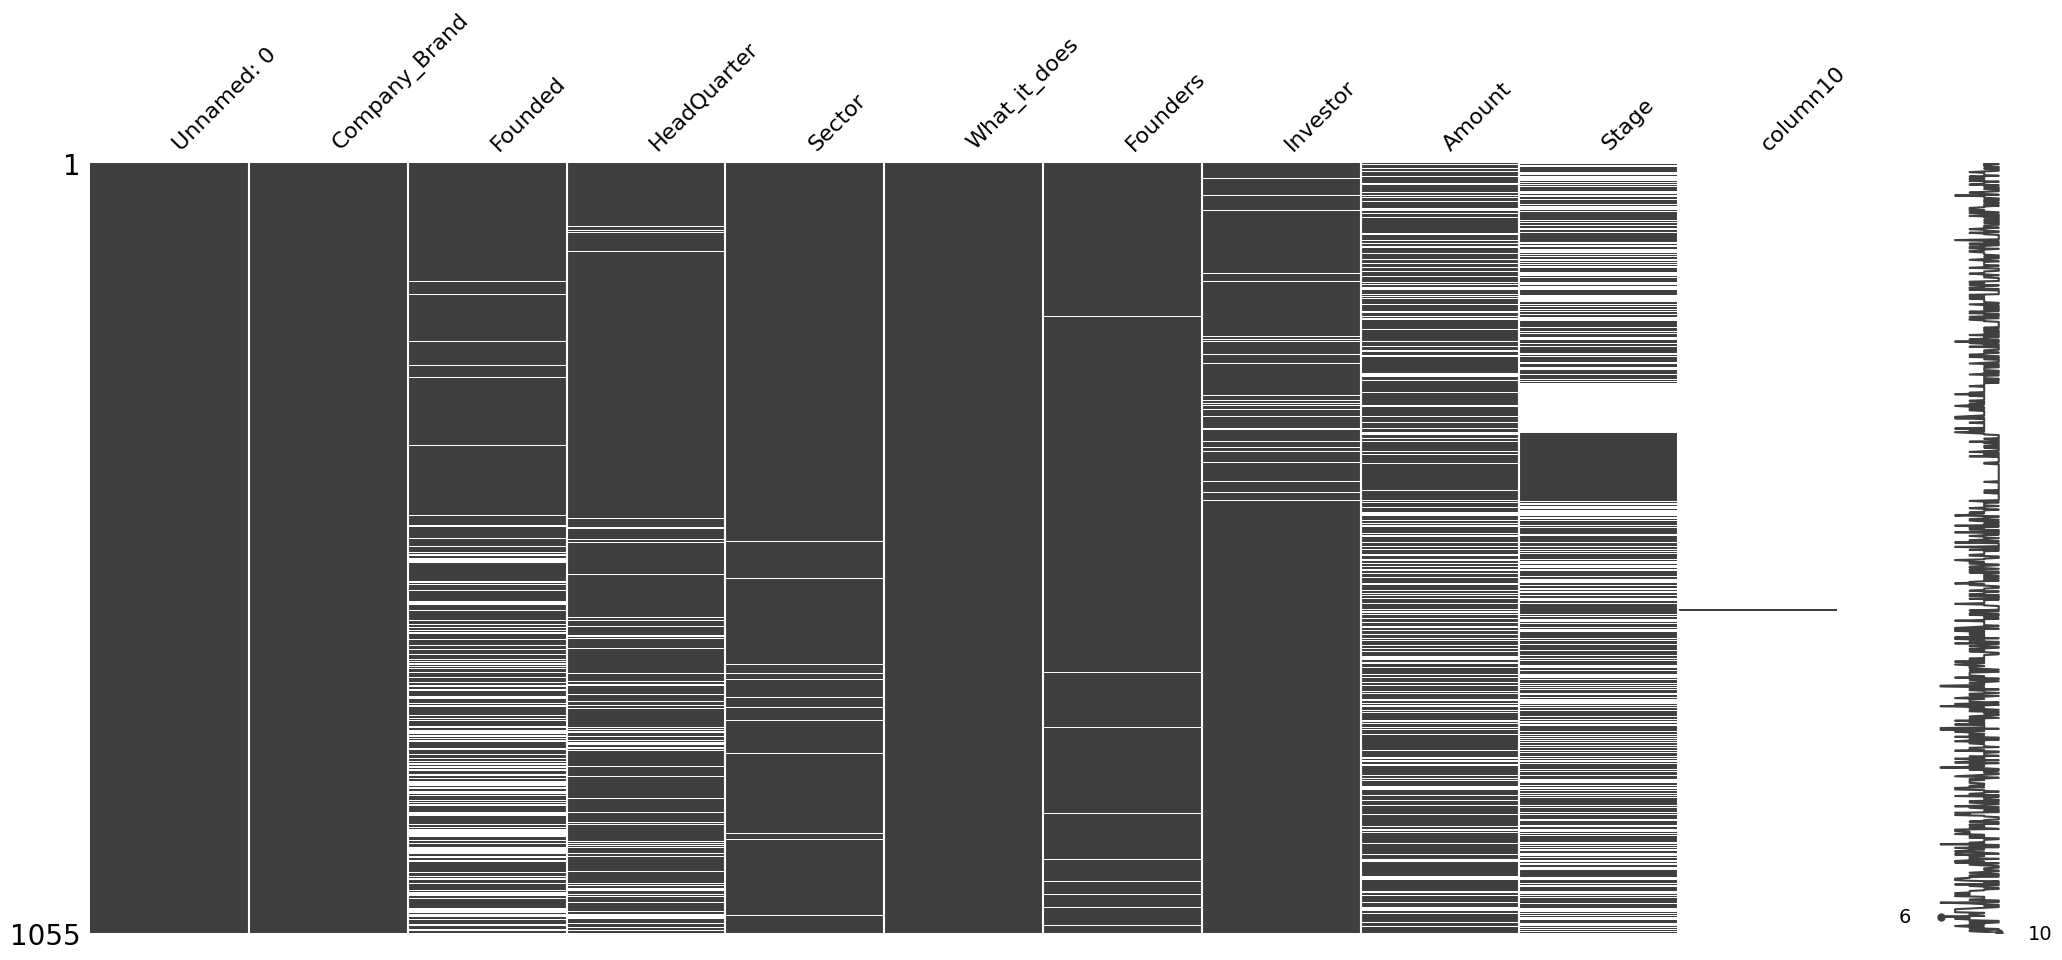

In [130]:
#Visualizing nulls withing the dataset before cleaning
import missingno as msno
msno.matrix(df3)

In [131]:
#First dropping unuseful columns
df3.drop(columns = ["column10"], inplace = True)

In [132]:
# Rename company_brand to company/brand
df3.rename(columns={"Company_Brand":"Company/Brand"},inplace=True)

In [133]:
# confirm changes
df3.columns

Index(['Unnamed: 0', 'Company/Brand', 'Founded', 'HeadQuarter', 'Sector',
       'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [134]:
print(df3)
df3["Year"] = 2020


      Unnamed: 0 Company/Brand  Founded HeadQuarter              Sector  \
0              0    Aqgromalin   2019.0     Chennai            AgriTech   
1              1      Krayonnz   2019.0   Bangalore              EdTech   
2              2  PadCare Labs   2018.0        Pune  Hygiene management   
3              3         NCOME   2020.0   New Delhi              Escrow   
4              4    Gramophone   2016.0      Indore            AgriTech   
...          ...           ...      ...         ...                 ...   
1050        1050  Leverage Edu      NaN       Delhi              Edtech   
1051        1051         EpiFi      NaN         NaN             Fintech   
1052        1052       Purplle   2012.0      Mumbai           Cosmetics   
1053        1053        Shuttl   2015.0       Delhi           Transport   
1054        1054         Pando   2017.0     Chennai            Logitech   

                                           What_it_does  \
0                          Cultivating I

In [135]:
#First dropping unuseful columns
df3.drop(columns = ["Unnamed: 0"], inplace = True)

In [136]:
# confirm changes
df3.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

In [137]:
# Perform Descriptive Statistics on the dataset
df3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1055.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


In [138]:
# Check for null values in the 2020 dataset
df3.isnull().sum()

Company/Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           254
Stage            464
Year               0
dtype: int64

In [139]:
# check for info on the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   Year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 82.5+ KB


##### Clean 'Amount' Column

In [140]:
from sklearn.impute import SimpleImputer

In [141]:
import pandas as pd
import numpy as np

# Define the function to fill NaN values in the amount column with the median based on the stage of the company
def impute_amount_column(df3, filter_name, fill_value):
    # Calculate the median for each group
    medians = df3.groupby(filter_name)[fill_value].median()

    # Function to fill NaN values with the median of the corresponding group
    def fill_na(row):
        if pd.isna(row[fill_value]):
            if pd.isna(row[filter_name]):
                return row[fill_value]  # If both are NaN, leave as NaN
            else:
                return medians.get(row[filter_name], row[fill_value])
        else:
            return row[fill_value]

    # Apply the fill_na function to each row
    df3[fill_value] = df3.apply(fill_na, axis=1)

    return df3

In [142]:
# Call the impute_amount_column function
df3 = impute_amount_column(df3, "Stage", "Amount")

print("DataFrame after imputation:")
print(df3)

DataFrame after imputation:
     Company/Brand  Founded HeadQuarter              Sector  \
0       Aqgromalin   2019.0     Chennai            AgriTech   
1         Krayonnz   2019.0   Bangalore              EdTech   
2     PadCare Labs   2018.0        Pune  Hygiene management   
3            NCOME   2020.0   New Delhi              Escrow   
4       Gramophone   2016.0      Indore            AgriTech   
...            ...      ...         ...                 ...   
1050  Leverage Edu      NaN       Delhi              Edtech   
1051         EpiFi      NaN         NaN             Fintech   
1052       Purplle   2012.0      Mumbai           Cosmetics   
1053        Shuttl   2015.0       Delhi           Transport   
1054         Pando   2017.0     Chennai            Logitech   

                                           What_it_does  \
0                          Cultivating Ideas for Profit   
1     An academy-guardian-scholar centric ecosystem ...   
2      Converting bio-hazardous waste 

<Axes: >

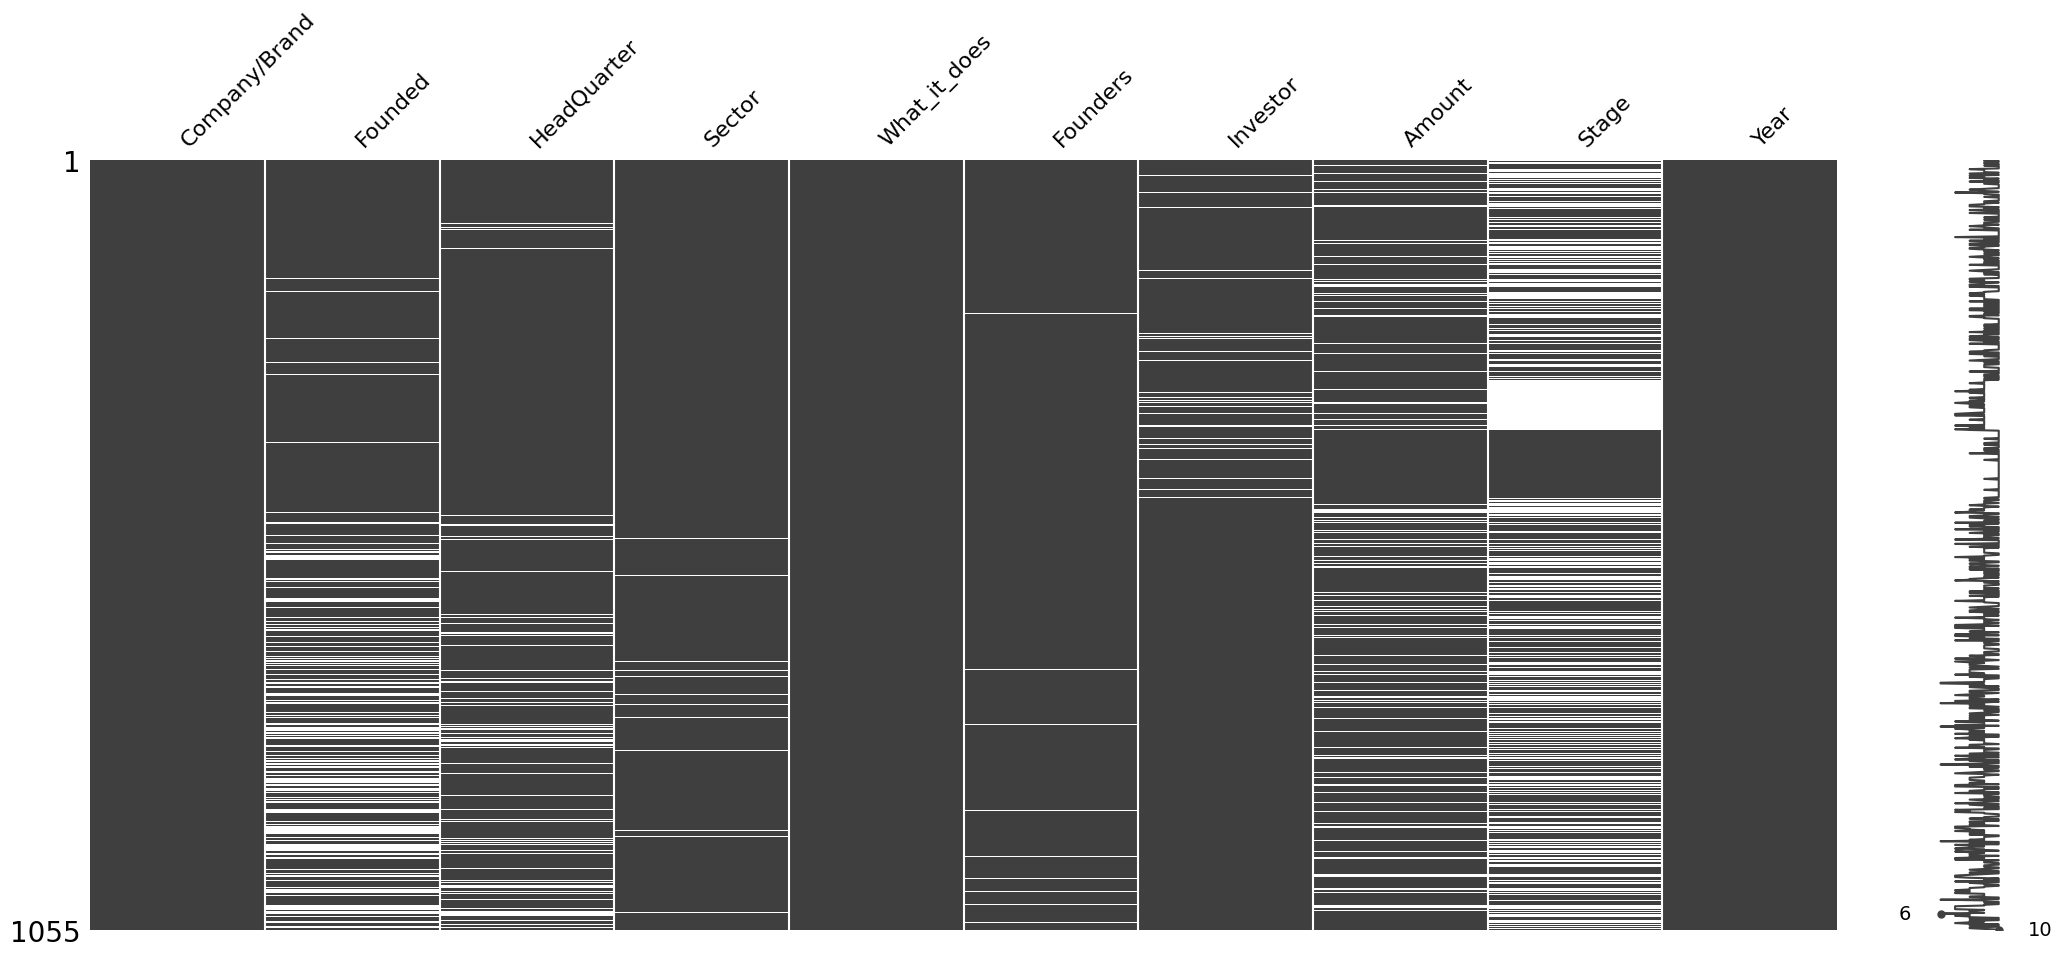

In [143]:
#Visualizing nulls withing the dataset before cleaning
import missingno as msno
msno.matrix(df3)

In [144]:
# check for nulls in the amount column
df3["Amount"].isna().sum()

150

In [145]:
# Calculate the median of the column
median_value = df3['Amount'].median()

# Fill NaN values in the column with the median
df3['Amount'] = df3['Amount'].fillna(median_value)

In [146]:
# confirm changes
df3['Amount'].isna().sum()

0

##### Clean 'Sector' Column

In [147]:
# Check for unique values in the Sector column
df3["Sector"].sort_values().unique()

array(['AI', 'AI & Data science', 'AI & Debt', 'AI & Deep learning',
       'AI & Media', 'AI Company', 'AI Platform', 'AI Robotics',
       'AI Startup', 'AI health', 'AI platform', 'AI startup',
       'API platform', 'AR platform', 'AR startup', 'AR/VR',
       'AR/VR startup', 'Accomodation', 'Ad-tech', 'Aero company',
       'Agri tech', 'AgriTech', 'Agriculture', 'Agritech',
       'Agritech startup', 'Agritech/Commerce', 'Appliance', 'Auto-tech',
       'Automation', 'Automation tech', 'Automobile',
       'Automobile Technology', 'Automobiles', 'Automotive',
       'Automotive Startup', 'Automotive and Rentals',
       'Automotive company', 'Automotive tech', 'Ayurveda tech', 'B2B',
       'B2B Agritech', 'B2B marketplace', 'Battery design',
       'Battery manufacturer', 'Beauty', 'Beauty & wellness', 'Beverage',
       'Beverages', 'Bike marketplace', 'Biomaterial startup',
       'Biopharma', 'Biotech', 'Biotechnology company', 'Blockchain',
       'Blockchain startup', 'Car

In [148]:
sector_mapping ={
    'AI': 'IT & Technology',
    'AI & Data science': 'IT & Technology',
    'AI & Debt': 'Financial Services',
    'AI & Deep learning': 'IT & Technology',
    'AI & Media': 'Media & Entertainment',
    'AI Company': 'IT & Technology',
    'AI Platform': 'IT & Technology',
    'AI Robotics': 'IT & Technology',
    'AI Startup': 'IT & Technology',
    'AI startup': 'IT & Technology',
    'AI health': 'Healthcare & Life Sciences',
    'AI platform': 'IT & Technology',
    'API platform': 'IT & Technology',
    'AR platform': 'IT & Technology',
    'AR startup': 'IT & Technology',
    'AR/VR': 'IT & Technology',
    'AR/VR startup': 'IT & Technology',
    'Accomodation': 'Hospitality',
    'Ad-tech': 'IT & Technology',
    'Aero company': 'Manufacturing',
    'Agri tech': 'Agriculture',
    'AgriTech': 'Agriculture',
    'Agriculture': 'Agriculture',
    'Agritech': 'Agriculture',
    'Agritech startup': 'Agriculture',
    'Agritech/Commerce': 'Agriculture',
    'Appliance': 'Consumer Goods',
    'Auto-tech': 'Transportation & Logistics',
    'Automation': 'Transportation & Logistics',
    'Automation tech': 'Transportation & Logistics',
    'Automobile': 'Transportation & Logistics',
    'Automobile Technology': 'Transportation & Logistics',
    'Automobiles': 'Transportation & Logistics',
    'Automotive': 'Transportation & Logistics',
    'Automotive Startup': 'Transportation & Logistics',
    'Automotive and Rentals': 'Transportation & Logistics',
    'Automotive company': 'Transportation & Logistics',
    'Automotive tech': 'Transportation & Logistics',
    'Ayurveda tech': 'Healthcare & Life Sciences',
    'B2B': 'Business Services',
    'B2B Agritech': 'Agriculture',
    'B2B marketplace': 'Business Services',
    'Battery design': 'IT & Technology',
    'Battery manufacturer': 'IT & Technology',
    'Beauty': 'Consumer Goods',
    'Beauty & wellness': 'Consumer Goods',
    'Beverage': 'Consumer Goods',
    'Beverages': 'Consumer Goods',
    'Bike marketplace': 'Transportation & Logistics',
    'Biomaterial startup': 'Healthcare & Life Sciences',
    'Biopharma': 'Healthcare & Life Sciences',
    'Biotech': 'Healthcare & Life Sciences',
    'Biotechnology company': 'Healthcare & Life Sciences',
    'Blockchain': 'IT & Technology',
    'Blockchain startup': 'IT & Technology',
    'Car Service': 'Transportation & Logistics',
    'Car Trade': 'Transportation & Logistics',
    'CleanTech': 'IT & Technology',
    'Cleantech': 'IT & Technology',
    'Cloud Kitchen': 'IT & Technology',
    'Cloud company': 'IT & Technology',
    'Co-living': 'Travel & Tourism',
    'Co-working': 'Business Services',
    'Co-working Startup': 'Business Services',
    'Construction': 'Business Services',
    'Construction tech': 'IT & Technology',
    'Consultancy': 'Business Services',
    'Consumer Goods': 'Consumer Goods',
    'Consumer appliances': 'Consumer Goods',
    'Content Marktplace': 'Media & Entertainment',
    'Content management': 'Business Services',
    'Content marketplace': 'Media & Entertainment',
    'Conversational AI platform': 'IT & Technology',
    'Cosmetics': 'Consumer Goods',
    'Coworking': 'Business Services',
    'Craft Beer': 'Consumer Goods',
    'Crowdsourcing': 'Business Services',
    'Cryptocurrency': 'IT & Technology',
    'Customer service company': 'Business Services',
    'Dairy': 'Agriculture',
    'Dairy startup': 'Agriculture',
    'Data Analytics': 'IT & Technology',
    'Data Intelligence': 'IT & Technology',
    'Data Science': 'IT & Technology',
    'Dating app': 'IT & Technology',
    'Deep Tech': 'IT & Technology',
    'Deep Tech AI': 'IT & Technology',
    'Deeptech': 'IT & Technology',
    'Deeptech startup': 'IT & Technology',
    'Defense tech': 'IT & Technology',
    'Deisgning': 'Consumer Goods',
    'Digital Media': 'Media & Entertainment',
    'Digital tech': 'IT & Technology',
    'E store': 'Retail',
    'E tailor': 'Retail',
    'E-commerce': 'Retail',
    'E-connect': 'Retail',
    'E-market': 'Retail',
    'E-mobility': 'Transportation & Logistics',
    'E-tail': 'Retail',
    'EV': 'Transportation & Logistics',
    'EV startup': 'Transportation & Logistics',
    'Ecommerce': 'Retail',
    'EdTech': 'Education',
    'EdTech Startup': 'Education',
    'EdtTech': 'Education',
    'Edtech': 'Education',
    'Education': 'Education',
    'Electricity': 'Consumer Goods',
    'Entertainment': 'Media & Entertainment',
    'Entreprenurship': 'Business Services',
    'Escrow': 'Financial Services',
    'Estore': 'Retail',
    'Eye Wear': 'Consumer Goods',
    'Eyeglasses': 'Consumer Goods',
    'FM': 'Consumer Goods',
    'FMCG': 'Consumer Goods',
    'Fashion': 'Consumer Goods',
    'Fashion Tech': 'Consumer Goods',
    'Fashion startup': 'Consumer Goods',
    'Fertility tech': 'Healthcare & Life Sciences',
    'FinTech': 'Financial Services',
    'Finance': 'Financial Services',
    'Finance company': 'Financial Services',
    'Financial Services': 'Financial Services',
    'Fintech': 'Financial Services',
    'Fitness': 'Healthcare & Life Sciences',
    'Fitness startup': 'Healthcare & Life Sciences',
    'Food': 'Consumer Goods',
    'Food & Bevarages': 'Consumer Goods',
    'Food & Beverages': 'Consumer Goods',
    'Food & Logistics': 'Consumer Goods',
    'Food Delivery': 'Consumer Goods',
    'Food Industry': 'Consumer Goods',
    'Food Startup': 'Consumer Goods',
    'Food and Beverages': 'Consumer Goods',
    'Food devlivery': 'Consumer Goods',
    'Food diet': 'Consumer Goods',
    'Food tech': 'Consumer Goods',
    'FoodTech': 'Consumer Goods',
    'Foodtech': 'Consumer Goods',
    'Foodtech & Logistics': 'Consumer Goods',
    'Fusion beverages': 'Consumer Goods',
    'Gaming': 'Media & Entertainment',
    'Gaming startup': 'Media & Entertainment',
    'HR': 'Business Services',
    'HR Tech': 'Business Services',
    'HR Tech startup': 'Business Services',
    'HR tech': 'Business Services',
    'Health': 'Healthcare & Life Sciences',
    'Health & Wellness': 'Healthcare & Life Sciences',
    'Health and Fitness': 'Healthcare & Life Sciences',
    'HealthCare': 'Healthcare & Life Sciences',
    'HealthTech': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'Healthcare/Edtech': 'Healthcare & Life Sciences',
    'Healthtech': 'Healthcare & Life Sciences',
    'HeathTech': 'Healthcare & Life Sciences',
    'Healthcare & Life Science':'Healthcare & Life Sciences',
    'Home Design': 'Consumer Goods',
    'Home interior services': 'Consumer Goods',
    'Hospitality': 'Travel & Tourism',
    'Housing': 'Real Estate',
    'Housing & Rentals': 'Real Estate',
    'HrTech': 'Business Services',
    'Hygiene': 'Healthcare & Life Sciences',
    'Hygiene management': 'Healthcare & Life Sciences',
    'IT': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Insurance Tech': 'Financial Services',
    'Insurance technology': 'Financial Services',
    'InsureTech': 'Financial Services',
    'Insurtech': 'Financial Services',
    'Interior & decor': 'Consumer Goods',
    'Interior Design': 'Consumer Goods',
    'Interior design': 'Consumer Goods',
    'Investment': 'Financial Services',
    'Investment Tech': 'Financial Services',
    'IoT': 'IT & Technology',
    'IoT startup': 'IT & Technology',
    'IoT/Automobile': 'Transportation & Logistics',
    'Jewellery': 'Consumer Goods',
    'Jewellery startup': 'Consumer Goods',
    'Job portal': 'Business Services',
    'Legal': 'Business Services',
    'LegalTech': 'Business Services',
    'Life sciences': 'Healthcare & Life Sciences',
    'Linguistic Spiritual': 'Others',
    'Location Analytics': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Logitech': 'Transportation & Logistics',
    'Luxury car startup': 'Transportation & Logistics',
    'Machine Learning': 'IT & Technology',
    'Manufacturing': 'Manufacturing',
    'Marketing': 'Business Services',
    'Marketing company': 'Business Services',
    'Marketing startup': 'Business Services',
    'Marketplace': 'Business Services',
    'Med Tech': 'Healthcare & Life Sciences',
    'Media': 'Media & Entertainment',
    'Media & Networking': 'Media & Entertainment',
    'Media Tech': 'Media & Entertainment',
    'Medtech': 'Healthcare & Life Sciences',
    'Mental Health': 'Healthcare & Life Sciences',
    'Micro-mobiity': 'Transportation & Logistics',
    'Mobility tech': 'Transportation & Logistics',
    'Mobility/Transport': 'Transportation & Logistics',
    'Multinational conglomerate company': 'Others',
    'Nano Distribution Network': 'IT & Technology',
    'Neo-banking': 'Financial Services',
    'Networking platform': 'IT & Technology',
    'Nutrition': 'Consumer Goods',
    'Nutrition Tech': 'Consumer Goods',
    'Nutrition sector': 'Consumer Goods',
    'Nutrition tech': 'Consumer Goods',
    'Online credit management startup': 'Financial Services',
    'Online financial service': 'Financial Services',
    'PaaS startup': 'IT & Technology',
    'Packaging solution startup': 'Manufacturing',
    'Personal care startup': 'Consumer Goods',
    'Pharma': 'Healthcare & Life Sciences',
    'Pharmaceutical': 'Healthcare & Life Sciences',
    'Pharmacy': 'Healthcare & Life Sciences',
    'Photonics startup': 'IT & Technology',
    'Preschool Daycare': 'Education',
    'Proptech': 'Real Estate',
    'Publication': 'Media & Entertainment',
    'QSR startup': 'Consumer Goods',
    'Real Estate': 'Real Estate',
    'Reatil startup': 'Retail',
    'Recruitment startup': 'Business Services',
    'Renewable player': 'Energy',
    'Rental': 'Transportation & Logistics',
    'Rental space': 'Real Estate',
    'Retail': 'Retail',
    'Retail Aggregator': 'Retail',
    'Retail Tech': 'Retail',
    'Retail startup': 'Retail',
    'Robotics': 'IT & Technology',
    'SaaS': 'IT & Technology',
    'SaaS platform': 'IT & Technology',
    'SaaS startup': 'IT & Technology',
    'SaaS/Edtech': 'IT & Technology',
    'SaaS\xa0\xa0startup': 'IT & Technology',
    'Sales & Services': 'Business Services',
    'Sanitation solutions': 'Consumer Goods',
    'Scanning app': 'IT & Technology',
    'Service industry': 'Business Services',
    'Skincare startup': 'Consumer Goods',
    'Sles and marketing': 'Business Services',
    'Social Commerce': 'Retail',
    'Social Media': 'Media & Entertainment',
    'Social Network': 'Media & Entertainment',
    'Social commerce': 'Retail',
    'Social e-commerce': 'Retail',
    'Social media': 'Media & Entertainment',
    'Software Company': 'IT & Technology',
    'Software company': 'IT & Technology',
    'Soil-Tech': 'Agriculture',
    'Solar Monitoring Company': 'Energy',
    'Solar SaaS': 'Energy',
    'Solar Solution': 'Energy',
    'Solar solution': 'Energy',
    'SpaceTech': 'IT & Technology',
    'Spacetech': 'IT & Technology',
    'Sports': 'Sports',
    'Startup laboratory': 'Business Services',
    'Supply chain, Agritech': 'Agriculture',
    'Taxation': 'Financial Services',
    'Tech': 'IT & Technology',
    'Tech Startup': 'IT & Technology',
    'Tech company': 'IT & Technology',
    'Tech hub': 'IT & Technology',
    'Tech platform': 'IT & Technology',
    'Technology': 'IT & Technology',
    'Techonology': 'IT & Technology',
    'Telecommunication': 'IT & Technology',
    'Tourism & EV': 'Travel & Tourism',
    'Trading platform': 'Financial Services',
    'Transport': 'Transportation & Logistics',
    'Transport & Rentals': 'Transportation & Logistics',
    'Transport Automation': 'Transportation & Logistics',
    'Transportation': 'Transportation & Logistics',
    'Travel': 'Travel & Tourism',
    'Travel & SaaS': 'Travel & Tourism',
    'Travel tech': 'Travel & Tourism',
    'TravelTech': 'Travel & Tourism',
    'Tyre management': 'Transportation & Logistics',
    'VR & SaaS': 'IT & Technology',
    'Venture capital': 'Financial Services',
    'Venture capitalist': 'Financial Services',
    'Video': 'Media & Entertainment',
    'Video personalization': 'Media & Entertainment',
    'Video platform': 'Media & Entertainment',
    'Video sharing platform': 'Media & Entertainment',
    'Video streaming platform': 'Media & Entertainment',
    'Virtual auditing startup': 'Financial Services',
    'Visual Media': 'Media & Entertainment',
    'WL & RAC protection': 'Consumer Goods',
    'Warehouse': 'Transportation & Logistics',
    'Work fulfillment': 'Business Services',
    'Yoga & wellness': 'Healthcare & Life Sciences',
    'eMobility': 'Transportation & Logistics',
    None: 'Others'
}

In [149]:
# Count on individual sectors
df3["Sector"].value_counts()

Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   40
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64

##### Clean 'Founded' Column

In [150]:
# check for null Values in The Column
df3.isna().sum()

Company/Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            464
Year               0
dtype: int64

In [151]:
unique_founded = df3['Founded'].unique()
print(unique_founded)

[2019. 2018. 2020. 2016. 2008. 2015. 2017. 2014. 1998. 2007. 2011. 1982.
 2013. 2009. 2012. 1995. 2010. 2006. 1978.   nan 1999. 1994. 2005. 1973.
 2002. 2004. 2001.]


In [152]:
# Fill NaN values with a default value 
df3['Founded'] = df3['Founded'].fillna('Unknown')

In [153]:
unique_founded = df3['Founded'].unique()
print(unique_founded)

[2019.0 2018.0 2020.0 2016.0 2008.0 2015.0 2017.0 2014.0 1998.0 2007.0
 2011.0 1982.0 2013.0 2009.0 2012.0 1995.0 2010.0 2006.0 1978.0 'Unknown'
 1999.0 1994.0 2005.0 1973.0 2002.0 2004.0 2001.0]


##### Clean 'Stage' Column

In [154]:
df3.Stage.unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [155]:
stage_mapping = {
    None: "Other Funding Types",
    'Pre-seed': "Early-Stage Funding",
    'Seed': "Early-Stage Funding",
    'Pre-series A': "Other Funding Types",
    'Pre-series': "Other Funding Types",
    'Series C': "Late-Stage Funding",
    'Series A': "Mid Stage Funding",
    'Series B': "Mid Stage Funding",
    'Debt': "Special Funding Types",
    'Pre-series C': "Other Funding Types",
    'Pre-series B': "Other Funding Types",
    'Series E': "Late-Stage Funding",
    'Bridge': "Special Funding Types",
    'Series D': "Late-Stage Funding",
    'Series B2': "Other Funding Types",
    'Series F': "Other Funding Types",
    'Pre- series A': "Other Funding Types",
    'Edge': "Other Funding Types",
    'Series H': "Late-Stage Funding",
    'Pre-Series B': "Other Funding Types",
    'Seed A': "Other Funding Types",
    'Series A-1': "Other Funding Types",
    'Seed Funding': "Special Funding Types",
    'Pre-Seed': "Early-Stage Funding",
    'Seed round': "Early-Stage Funding",
    'Pre-seed Round': "Early-Stage Funding",
    'Seed Round & Series A': "Early-Stage Funding",
    'Pre Series A': "Other Funding Types",
    'Pre seed Round': "Early-Stage Funding",
    'Angel Round': "Special Funding Types",
    'Pre series A1': "Other Funding Types",
    'Series E2': "Other Funding Types",
    'Pre series A': "Other Funding Types",
    'Seed Round': "Early-Stage Funding",
    'Bridge Round': "Special Funding Types",
    'Pre seed round': "Early-Stage Funding",
    'Pre series B': "Other Funding Types",
    'Pre series C': "Other Funding Types",
    'Seed Investment': "Other Funding Types",
    'Series D1': "Other Funding Types",
    'Mid series': "Other Funding Types",
    'Series C, D': "Other Funding Types",
    'Seed funding': "Special Funding Types"
}

In [156]:
# Replacing the sector column values with the new sectors
df3["Stage"]= df3["Stage"].replace(stage_mapping)
df3.Stage.unique()

array(['Other Funding Types', 'Early-Stage Funding', 'Late-Stage Funding',
       'Mid Stage Funding', 'Special Funding Types'], dtype=object)

In [157]:
df3["Stage"].isna().sum()

0

In [158]:
# check for nulls in the column
df3['HeadQuarter'].isna().sum()

94

In [159]:
# Fill all Nulls in the headquarter column with Undisclosed
df3["HeadQuarter"].fillna("Undisclosed",inplace=True)

In [160]:
# Confirm changes 
df3['HeadQuarter'].isna().sum()

0

##### Clean 'Investor'Column

In [161]:
# check for unique values in the column
df3["Investor"].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', nan, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipkar

In [162]:
# check for nulls
df3["Investor"].isna().sum()

38

In [163]:
# Replace all the Nulls with undisclosed
df3["Investor"].fillna("Undisclosed",inplace=True)

In [164]:
# Confirm changes
df3["Investor"].isna().sum()

0

In [165]:
def missing_data_summary(df3):
    total_missing = df3.isnull().sum()
    percent_missing = df3.isnull().mean() * 100
    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })
    return missing_data

summary = missing_data_summary(df3)
print(summary)


               Total Missing  Percent Missing
Company/Brand              0         0.000000
Founded                    0         0.000000
HeadQuarter                0         0.000000
Sector                    13         1.232227
What_it_does               0         0.000000
Founders                  12         1.137441
Investor                   0         0.000000
Amount                     0         0.000000
Stage                      0         0.000000
Year                       0         0.000000


In [166]:
# Drop the founders column as it would not be needed

# drop the founders column
df3.drop(columns=["Founders"],inplace=True)

In [167]:
def missing_data_summary(df3):
    total_missing = df3.isnull().sum()
    percent_missing = df3.isnull().mean() * 100
    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })
    return missing_data

summary = missing_data_summary(df3)
print(summary)


               Total Missing  Percent Missing
Company/Brand              0         0.000000
Founded                    0         0.000000
HeadQuarter                0         0.000000
Sector                    13         1.232227
What_it_does               0         0.000000
Investor                   0         0.000000
Amount                     0         0.000000
Stage                      0         0.000000
Year                       0         0.000000


In [168]:
df3.head(6)

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,Angel investors,200000.0,Other Funding Types,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Early-Stage Funding,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Venture Center,150000.0,Early-Stage Funding,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,Other Funding Types,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,Other Funding Types,2020
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Early-Stage Funding,2020


In [169]:
# Rename some columns
df3.rename(columns={'HeadQuarter': 'Headquarter', 'What_it_does': 'About', 'Amount($)': 'Amount'}, inplace= True)
df3.head(6)

,Company/Brand,Founded,Headquarter,Sector,About,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,Angel investors,200000.0,Other Funding Types,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Early-Stage Funding,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Venture Center,150000.0,Early-Stage Funding,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,Other Funding Types,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,Other Funding Types,2020
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Early-Stage Funding,2020


In [170]:
# Print the list of column names
print(df3.columns.tolist())

['Company/Brand', 'Founded', 'Headquarter', 'Sector', 'About', 'Investor', 'Amount', 'Stage', 'Year']


#### 2021 DATASET Cleaning

In [171]:
df4 = pd.read_csv(r"C:/Users/lenovo/Documents/Documents/personal/Azubi Africa/Git Assignment/LP1 repo/TEAM-FIJI_LPI/Datasets/startup_funding2021.csv")
df4

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [172]:
# checking the shape of the dataset
df4.shape

(1209, 9)

In [173]:
# Checking for counts of duplicates in dataset
df4.duplicated().sum()

19

In [174]:
# showing values that are duplicated
df4[df4.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,NaN
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,NaN
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,NaN
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [175]:
# check for all nulls in the dataset
df4.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [176]:
# Drop duplicates
df4.drop_duplicates(inplace=True)

In [177]:
# confirm changes
df4.duplicated().sum()

0

In [178]:
# Information entered in wrong columns
df4.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [179]:
# Correcting entries in wrong columns

# LABEL 98 (FanPlay)
df4.loc[98, "Amount"] = "$1200000"
df4.loc[98, "Stage"] = "Undisclosed"
df4.loc[98, "Investor"] = "Upsparks"
df4.loc[98, "HeadQuarter"] = "Undisclosed"

# LABEL 241 (MasterChow)
df4.loc[241,  "HeadQuarter"] = "Hauz Khas"
df4.loc[241, "Sector"] = "Food & Beverages"

# LABEL 242 (Fullife Healthcare)
df4.loc[242, "Amount"] = "$22000000"
df4.loc[242, "Investor"] = "Morgan Stanley Private Equity Asia"
df4.loc[242, "Stage"] = "Series C"
df4.loc[242, "HeadQuarter"] = "Mumbai"
df4.loc[242, "Sector"] = "Pharmaceuticals"
df4.loc[242, "Founders"] = "Varun Khanna"
df4.loc[242, "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

# LABEL 257(MoEVing)
df4.loc[257, "Amount"] = "$5000000"
df4.loc[257, "HeadQuarter"] = "Gurugram"
df4.loc[257, "Sector"] = "Electronic Vehicle"
df4.loc[257, "Stage"] = "Seed"
df4.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"


# LABEL 538 (Little Leap)
df4.loc[538, "Amount"] = "$300000"
df4.loc[538, "Investor"] = "ah! Ventures"
df4.loc[538, "Stage"] = "Undisclosed"
df4.loc[538, "Founders"] = "Vishal Gupta"

# LABEL 545 (AdmitKard)
df4.loc[545, "Amount"] = "$1000000"
df4.loc[545, "Investor"] = "Unknown"
df4.loc[545, "Stage"] = "Pre-series A"
df4.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

# LABEL 551 (BHyve)
df4.loc[551, "Amount"] = "$300000"
df4.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
df4.loc[551, "Stage"] = "Undisclosed"
df4.loc[551, "Sector"] = "HR"

# LABEL 674 (MYRE Capital)
df4.loc[674, "Amount"] = "$6000000"
df4.loc[674, "Stage"] = "Undisclosed"

# LABEL 677 (Saarthi Pedagogy)
df4.loc[677, "Amount"] = "$1000000"
df4.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
df4.loc[677, "Stage"] = "Undisclosed"

# LABEL 1100(Sochcast)
df4.loc[1100, "Investor"] = "Undisclosed"
df4.loc[1100, "HeadQuarter"] = "Undisclosed"
df4.loc[1100, "Sector"] = "Online Media"

# LABEL 1148 (Godamwale)
df4.loc[1148, "Amount"] = "1000000"
df4.loc[1148, "Investor"] = "Undisclosed"
df4.loc[1148, "Stage"] = "Seed"

# LABEL 1176(Peak)
df4.loc[1176, "Sector"] = "Information Technology & Services"
df4.loc[1176, "HeadQuarter"] = "Manchester"

In [180]:
# Confirm changes made

df4.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Undisclosed,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,$1200000,Undisclosed
241,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Mumbai,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C
257,MoEVing,2021.0,Gurugram,Electronic Vehicle,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Vishal Gupta,ah! Ventures,$300000,Undisclosed
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",Unknown,$1000000,Pre-series A
551,BHyve,2020.0,Mumbai,HR,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"ITO Angel Network, LetsVenture, 100x.VC",$300000,Undisclosed
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,Undisclosed
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"JITO Angel Network, LetsVenture",$1000000,Undisclosed
1100,Sochcast,2020.0,Undisclosed,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Undisclosed,NaN,NaN


In [181]:
# rename company_brand to company/brand
df4 = df4.rename(columns={"Company_Brand":"Company/Brand"})

#create the year column
df4["Funded_year"] = 2021

In [182]:
# checking the info about the data

df4.info()

# The data type of the amount column must be converted from object to a numeric datatype

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1188 non-null   object 
 8   Stage          773 non-null    object 
 9   Funded_year    1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 134.6+ KB


In [183]:
# perform descriptive statistics on the 2021 dataset
df4.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1190,252,FinTech,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1129,933,Inflection Point Ventures,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1188,272,$Undisclosed,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,773,28,Seed,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funded_year,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


##### Clean 'Amount' Column

In [184]:
# clean the Amount column for 2021 dataset
df4.Amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [185]:
# looking for values that do not have the dollar sign attached to them for further investigation
df4[~df4.Amount.str.get(0).isin(['$'])]

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,NaN,2021
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A,2021
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",NaN,NaN,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,NaN,2021
319,Battery Smart,2019.0,New Delhi,Battery,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed,2021


In [186]:
# Remove the word with a value
df4['Amount'] = df4['Amount'].str.replace("1000000\t#REF!" , '1000000').replace('$Undisclosed', np.NaN).replace('$undisclosed',np.NaN).replace('Undisclosed', np.NaN)


In [187]:
#creating a function on amount column for 2021

def clean_amount():
    # copy original amount columns
    amount_column = df4["Amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar_1 = amount_column[amount_column.str.startswith("$", na=False)]
    
    # strip off the dollar symbol
    amount_in_dollar_1 = amount_in_dollar_1.str.lstrip("$")

    # extract values in dollars($)
    amount_in_dollar_2 = amount_column[amount_column.str.startswith("$$", na=False)]

     # strip off the dollar symbol
    amount_in_dollar_2 = amount_in_dollar_2.str.lstrip("$$")

    # Replace the Unclean columns with the clean one
    amount_column.loc[amount_in_dollar_1.index] = amount_in_dollar_1
    amount_column.loc[amount_in_dollar_2.index] = amount_in_dollar_2
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
   
    # update the amount column 
    df4["Amount"] = amount_column

In [188]:
clean_amount()

In [189]:
# check for Null Values in the amount column

df4["Amount"].isna().sum()

141

In [190]:
# Calculate the median for the amount column

median_value = df4['Amount'].median()
median_value

3500000.0

In [191]:
# Fill NaN values in the amount column with the median

df4['Amount'] = df4['Amount'].fillna(median_value)

In [192]:
# confirm changes

df4["Amount"].isna().sum()

0

##### Clean 'Stage' Column

In [193]:
df4.Stage.unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [194]:
# modified stage to categorize the stage columns

# Define the modified stage dictionary based on the provided unique values
modified_stage = {
    'Pre-series A': 'Early-Stage Funding',
    None: 'Other Funding Types',
    'Series D': 'Late-Stage Funding',
    'Series C': 'Late-Stage Funding',
    'Seed': 'Early-Stage Funding',
    'Series B': 'Mid Stage Funding',
    'Series E': 'Late-Stage Funding',
    'Pre-seed': 'Early-Stage Funding',
    'Series A': 'Mid Stage Funding',
    'Pre-series B': 'Mid Stage Funding',
    'Debt': 'Special Funding Types',
    'Undisclosed': 'Other Funding Types',
    'Bridge': 'Special Funding Types',
    'Seed+': 'Early-Stage Funding',
    'Series F2': 'Late-Stage Funding',
    'Series A+': 'Mid Stage Funding',
    'Series G': 'Late-Stage Funding',
    'Series F': 'Late-Stage Funding',
    'Series H': 'Late-Stage Funding',
    'Series B3': 'Mid Stage Funding',
    'PE': 'Other Funding Types',
    'Series F1': 'Late-Stage Funding',
    'Pre-series A1': 'Mid Stage Funding',
    'Early seed': 'Early-Stage Funding',
    'Series D1': 'Late-Stage Funding',
    'Seies A': 'Mid Stage Funding',
    'Pre-series': 'Early-Stage Funding',
    'Series A2': 'Mid Stage Funding',
    'Series I': 'Late-Stage Funding'
}


In [195]:
# Replacing the values in the stage column with the modified stage dictionary

df4["Stage"]= df4["Stage"].replace(modified_stage)
df4.Stage.unique()

array(['Early-Stage Funding', 'Other Funding Types', 'Late-Stage Funding',
       'Mid Stage Funding', 'Special Funding Types'], dtype=object)

##### Clean 'Sector' Column

In [196]:
# check for unique values in the column

df4["Sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [197]:
# categorization of the sectors

sector_mapping_2021 = {
    'AI startup': 'IT & Technology',
    'EdTech': 'Education',
    'B2B E-commerce': 'Retail',
    'FinTech': 'Financial Services',
    'Home services': 'Business Services',
    'HealthTech': 'Healthcare & Life Sciences',
    'Tech Startup': 'IT & Technology',
    'E-commerce': 'Retail',
    'B2B service': 'Business Services',
    'Helathcare': 'Healthcare & Life Sciences',
    'Renewable Energy': 'Energy',
    'Electronics': 'Manufacturing',
    'IT startup': 'IT & Technology',
    'Food & Beverages': 'Consumer Goods',
    'Aeorspace': 'Manufacturing',
    'Deep Tech': 'IT & Technology',
    'Dating': 'Media & Entertainment',
    'Gaming': 'Media & Entertainment',
    'Robotics': 'Manufacturing',
    'Retail': 'Retail',
    'Food': 'Consumer Goods',
    'Oil and Energy': 'Energy',
    'AgriTech': 'Agriculture',
    'Telecommuncation': 'IT & Technology',
    'Milk startup': 'Consumer Goods',
    'AI Chatbot': 'IT & Technology',
    'IT': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Hospitality': 'Travel & Tourism',
    'Fashion': 'Consumer Goods',
    'Marketing': 'Business Services',
    'Transportation': 'Transportation & Logistics',
    'LegalTech': 'Business Services',
    'Food delivery': 'Food & Beverages',
    'Automotive': 'Manufacturing',
    'SaaS startup': 'IT & Technology',
    'Fantasy sports': 'Sports',
    'Video communication': 'Media & Entertainment',
    'Social Media': 'Media & Entertainment',
    'Skill development': 'Education',
    'Rental': 'Real Estate',
    'Recruitment': 'Business Services',
    'HealthCare': 'Healthcare & Life Sciences',
    'Sports': 'Sports',
    'Computer Games': 'Media & Entertainment',
    'Consumer Goods': 'Consumer Goods',
    'Information Technology': 'IT & Technology',
    'Apparel & Fashion': 'Consumer Goods',
    'Logistics & Supply Chain': 'Transportation & Logistics',
    'Healthtech': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'SportsTech': 'Sports',
    'HRTech': 'Business Services',
    'Wine & Spirits': 'Consumer Goods',
    'Mechanical & Industrial Engineering': 'Manufacturing',
    'Spiritual': 'Others',
    'Financial Services': 'Financial Services',
    'Industrial Automation': 'Manufacturing',
    'Health': 'Healthcare & Life Sciences',
    'Lifestyle': 'Consumer Goods',
    'IoT': 'IT & Technology',
    'Banking': 'Financial Services',
    'Computer software': 'IT & Technology',
    'Tech startup': 'IT & Technology',
    'Digital mortgage': 'Financial Services',
    'Information Technology & Services': 'IT & Technology',
    'Furniture': 'Consumer Goods',
    'B2B marketplace': 'Retail',
    'Healtcare': 'Healthcare & Life Sciences',
    'Location Analytics': 'IT & Technology',
    'Media': 'Media & Entertainment',
    'Consumer Electronics': 'Consumer Goods',
    'Tobacco': 'Consumer Goods',
    'Deeptech': 'IT & Technology',
    'Insuretech': 'Financial Services',
    'MLOps platform': 'IT & Technology',
    'Venture Capital': 'Financial Services',
    'Pet care': 'Healthcare & Life Sciences',
    'Drone': 'Manufacturing',
    'Wholesale': 'Retail',
    'Construction': 'Manufacturing',
    'E-learning': 'Education',
    'Consumer Services': 'Consumer Goods',
    'Venture Capital & Private Equity': 'Financial Services',
    'Health, Wellness & Fitness': 'Healthcare & Life Sciences',
    'OTT': 'Media & Entertainment',
    'Education Management': 'Education',
    'Computer Software': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Software Startup': 'IT & Technology',
    'Computer & Network Security': 'IT & Technology',
    'Capital Markets': 'Financial Services',
    'Social network': 'IT & Technology',
    'Hospital & Health Care': 'Healthcare & Life Sciences',
    'Music': 'Media & Entertainment',
    'Pharmaceuticals': 'Healthcare & Life Sciences',
    'Electronic Vehicle': 'Manufacturing',
    'Cosmetics': 'Consumer Goods',
    'Mobility': 'Transportation & Logistics',
    'Social media': 'Media & Entertainment',
    'Real Estate': 'Real Estate',
    'Digital platform': 'IT & Technology',
    'B2B Ecommerce': 'Retail',
    'Online Media': 'Media & Entertainment',
    'Social commerce': 'Retail',
    'Mobile Games': 'Media & Entertainment',
    'Food Production': 'Food & Beverages',
    'Podcast': 'Media & Entertainment',
    'HeathTech': 'Healthcare & Life Sciences',
    'Battery': 'Energy',
    'Content publishing': 'Media & Entertainment',
    'Water purification': 'Others',
    'Content commerce': 'Media & Entertainment',
    'Innovation Management': 'Business Services',
    'Software company': 'IT & Technology',
    'Automation': 'Manufacturing',
    'Food Industry': 'Consumer Goods',
    'Celebrity Engagement': 'Media & Entertainment',
    'Trading platform': 'Financial Services',
    'Personal Care': 'Consumer Goods',
    'Cannabis startup': 'Consumer Goods',
    'Blogging': 'Media & Entertainment',
    'Consulting': 'Business Services',
    'BioTechnology': 'Healthcare & Life Sciences',
    'B2B Marketplace': 'Retail',
    'Health care': 'Healthcare & Life Sciences',
    'Social audio': 'Media & Entertainment',
    'Fashion and lifestyle': 'Consumer Goods',
    'Delivery service': 'Transportation & Logistics',
    'B2B Manufacturing': 'Manufacturing',
    'Home Decor': 'Consumer Goods',
    'Solar': 'Energy',
    'TaaS startup': 'Transportation & Logistics',
    'EV startup': 'Manufacturing',
    'HR Tech': 'Business Services',
    'Blockchain startup': 'IT & Technology',
    'Food and Beverages': 'Consumer Goods',
    'Beverages': 'Consumer Goods',
    'Manufacturing startup': 'Manufacturing',
    'Cryptocurrency': 'Financial Services',
    'Vehicle repair startup': 'Manufacturing',
    'Advisory firm': 'Business Services',
    'Legaltech': 'Business Services',
    'Pollution control equiptment': 'Manufacturing',
    'Fashion & Lifestyle': 'Consumer Goods',
    'Blockchain': 'IT & Technology',
    'Fitness': 'Healthcare & Life Sciences',
    'D2C': 'Retail',
    'Automobile': 'Manufacturing',
    'Environmental Services': 'Others',
    'Merchandise': 'Retail',
    'Facilities Services': 'Business Services',
    'Marketing & Advertising': 'Business Services',
    'Human Resources': 'Business Services',
    'Eyewear': 'Consumer Goods',
    'D2C Business': 'Retail',
    'Biotechnology': 'Healthcare & Life Sciences',
    'Farming': 'Agriculture',
    'NFT Marketplace': 'IT & Technology',
    'Internet': 'IT & Technology',
    'SpaceTech': 'IT & Technology',
    'Consumer software': 'IT & Technology',
    'Social community': 'IT & Technology',
    'Fishery': 'Agriculture',
    'HR': 'Business Services',
    'Renewables & Environment': 'Energy',
    'Online storytelling': 'Media & Entertainment',
    'Aviation': 'Transportation & Logistics',
    'IT company': 'IT & Technology',
    'Environmental service': 'Others',
    'Job discovery platform': 'Business Services',
    'D2C Fashion': 'Retail',
    'Heathcare': 'Healthcare & Life Sciences',
    'CRM': 'IT & Technology',
    'Software': 'IT & Technology',
    'Nutrition': 'Healthcare & Life Sciences',
    'D2C startup': 'Retail',
    'Innovation management': 'Business Services',
    'Community platform': 'IT & Technology',
    'Venture capitalist': 'Financial Services',
    'Networking': 'IT & Technology',
    'Commercial Real Estate': 'Real Estate',
    'AR startup': 'IT & Technology',
    'Consumer service': 'Business Services',
    'Consumer goods': 'Consumer Goods',
    'MarTech': 'Business Services',
    'Advertisement': 'Business Services',
    'Content creation': 'Media & Entertainment',
    'Augmented reality': 'IT & Technology',
    'Rental space': 'Real Estate',
    'Bike Rental': 'Transportation & Logistics',
    'Beauty products': 'Consumer Goods',
    'Tourism': 'Travel & Tourism',
    'FemTech': 'Healthcare & Life Sciences',
    'Cultural': 'Media & Entertainment',
    'Co-working': 'Real Estate',
    'InsureTech': 'Financial Services',
    'Supply chain platform': 'Business Services',
    'Social platform': 'IT & Technology',
    'CleanTech': 'Energy',
    'AI company': 'IT & Technology',
    'Sports startup': 'Sports',
    'Matrimony': 'Others',
    'Crypto': 'Financial Services',
    'Clothing': 'Consumer Goods',
    'Analytics': 'IT & Technology',
    'Finance': 'Financial Services',
    'IoT platform': 'IT & Technology',
    'Commerce': 'Retail',
    'Defense & Space': 'Manufacturing',
    'Entertainment': 'Media & Entertainment',
    'Business Supplies & Equipment': 'Business Services',
    'NFT': 'IT & Technology',
    'Oil & Energy': 'Energy',
    'EV': 'Manufacturing',
    'Company-as-a-Service': 'Business Services',
    'Textiles': 'Manufacturing',
    'Professional Training & Coaching': 'Education',
    'Maritime': 'Transportation & Logistics',
    'Housing Marketplace': 'Real Estate',
    'Furniture Rental': 'Consumer Goods',
    'Telecommunications': 'IT & Technology',
    'Equity Management': 'Financial Services',
    'Cloud kitchen': 'Food & Beverages',
    'Nanotechnology': 'Manufacturing',
    'Community': 'Business Services',
    'Higher Education': 'Education',
    'B2B': 'Business Services',
    'Mechanical Or Industrial Engineering': 'Manufacturing',
    'D2C jewellery': 'Retail',
    'Sales and Distribution': 'Business Services',
    'SaaS': 'IT & Technology',
    'Information Services': 'IT & Technology',
    'Translation & Localization': 'Business Services',
    'Investment Banking': 'Financial Services',
    'Femtech': 'Healthcare & Life Sciences',
    'sports': 'Sports',
    'Foootwear': 'Consumer Goods',
    'Legal Services': 'Business Services',
    'Veterinary': 'Healthcare & Life Sciences',
    'Arts & Crafts': 'Media & Entertainment',
    'Investment Management': 'Financial Services',
    'Education': 'Education',
    'Management Consulting': 'Business Services',
    'B2B startup': 'Business Services',
    'Design': 'Business Services',
    'B2B Travel': 'Business Services',
    'Interior Design': 'Consumer Goods',
    'Product studio': 'Business Services',
    'Aviation & Aerospace': 'Transportation & Logistics',
    'Staffing & Recruiting': 'Business Services',
    
}

In [198]:
# mapping the sectors into the key sectors of the economy

df4["Sector"] = df4["Sector"].replace(sector_mapping_2021)

In [199]:
# confirm changes in sector column

df4["Sector"].unique()

array(['IT & Technology', 'Education', 'Retail', 'Financial Services',
       'Business Services', 'Healthcare & Life Sciences', 'Energy',
       'Manufacturing', 'Consumer Goods', 'Media & Entertainment',
       'Agriculture', 'Transportation & Logistics', 'Travel & Tourism',
       'Food & Beverages', 'Sports', 'Real Estate', 'Others',
       'Real estate'], dtype=object)

In [200]:
# confirm changes

df4["Sector"].isna().sum()

0

In [201]:
# count on individual sectors

df4["Sector"].value_counts()

Sector
Financial Services            217
IT & Technology               178
Education                     135
Healthcare & Life Sciences    133
Consumer Goods                118
Retail                         76
Manufacturing                  70
Media & Entertainment          63
Business Services              56
Transportation & Logistics     51
Agriculture                    26
Energy                         17
Real Estate                    14
Travel & Tourism               13
Sports                         12
Food & Beverages                5
Others                          5
Real estate                     1
Name: count, dtype: int64

In [202]:
# perform descriptive statistics on the 2021 dataset now
df4.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1190,18,Financial Services,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1129,933,Inflection Point Ventures,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1190.0,NaN,NaN,NaN,151346240.336134,4348223328.028811,10000.0,1000000.0,3500000.0,11000000.0,150000000000.0
Stage,1190,5,Early-Stage Funding,449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funded_year,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


##### Clean 'Investor' Column

In [203]:
# replace nan values with undisclosed
modified_investor = {
    None : 'Undisclosed',
    'nan' : 'Undisclosed'
}

In [204]:
# Replacing the nan values in the investor column with the modified stage dictionary

df4["Investor"]= df4["Investor"].replace(modified_investor)
df4.Investor.unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', 'Undisclosed',
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO 

In [205]:
df4['Investor'].isna().sum()

0

In [206]:
# count on individual investors

df4['Investor'].value_counts()

Investor
Undisclosed                                                                      63
Inflection Point Ventures                                                        23
Venture Catalysts                                                                11
Tiger Global                                                                     11
Elevation Capital                                                                 7
                                                                                 ..
Tiger Global, Dragoneer Investment Group, Steadview Capital, General Atlantic     1
CDC Group, Aavishkaar Venture Capital                                             1
GSF, Pras Hanuma                                                                  1
Ajat Hukkoo, Piyush Chaplot                                                       1
3one4 Capital, Kalaari Capital                                                    1
Name: count, Length: 933, dtype: int64

In [207]:
# perform descriptive statistics on the 2021 dataset now
df4.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1190,18,Financial Services,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1190,933,Undisclosed,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1190.0,NaN,NaN,NaN,151346240.336134,4348223328.028811,10000.0,1000000.0,3500000.0,11000000.0,150000000000.0
Stage,1190,5,Early-Stage Funding,449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funded_year,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


In [208]:
# Rename some columns
df4.rename(columns={'HeadQuarter': 'Headquarter', 'What_it_does': 'About', 'Amount($)': 'Amount','Funded_year': 'Year'}, inplace= True)
df4.head(6)

,Company/Brand,Founded,Headquarter,Sector,About,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,Bangalore,IT & Technology,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Early-Stage Funding,2021
1,upGrad,2015.0,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Other Funding Types,2021
2,Lead School,2012.0,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Late-Stage Funding,2021
3,Bizongo,2015.0,Mumbai,Retail,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Late-Stage Funding,2021
4,FypMoney,2021.0,Gurugram,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Early-Stage Funding,2021
5,Urban Company,2014.0,New Delhi,Business Services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,Other Funding Types,2021


In [209]:
# Drop column 'B'
df4 = df4.drop(columns=['Founders'])

print(df4)

       Company/Brand  Founded Headquarter              Sector  \
0     Unbox Robotics   2019.0   Bangalore     IT & Technology   
1             upGrad   2015.0      Mumbai           Education   
2        Lead School   2012.0      Mumbai           Education   
3            Bizongo   2015.0      Mumbai              Retail   
4           FypMoney   2021.0    Gurugram  Financial Services   
...              ...      ...         ...                 ...   
1204        Gigforce   2019.0    Gurugram   Business Services   
1205          Vahdam   2015.0   New Delhi      Consumer Goods   
1206    Leap Finance   2019.0   Bangalore  Financial Services   
1207    CollegeDekho   2015.0    Gurugram           Education   
1208          WeRize   2019.0   Bangalore  Financial Services   

                                                  About  \
0     Unbox Robotics builds on-demand AI-driven ware...   
1        UpGrad is an online higher education platform.   
2     LEAD School offers technology based 

In [210]:
# Print the list of column names
print(df4.columns.tolist())

['Company/Brand', 'Founded', 'Headquarter', 'Sector', 'About', 'Investor', 'Amount', 'Stage', 'Year']


## Concatenation of the 4 datasets and Finalizing on the Data Cleaning

In [211]:
#concatenating the datasets into a single dataframe
df = pd.concat([df1,data,df3,df4],ignore_index=True)
df.head(2)

,Company/Brand,Stage,Amount,About,Year,Headquarter,Sector,Founded,Investor
0,TheCollegeFever,Early Stage Funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangaluru,Media & Entertainment,NaN,NaN
1,Happy Cow Dairy,Early Stage Funding,584000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,NaN,NaN


In [212]:
# check the shape of the dataset
df.shape

(2859, 9)

In [213]:
# check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2859 non-null   object
 1   Stage          2859 non-null   object
 2   Amount         2859 non-null   object
 3   About          2859 non-null   object
 4   Year           2859 non-null   int64 
 5   Headquarter    2858 non-null   object
 6   Sector         2846 non-null   object
 7   Founded        2333 non-null   object
 8   Investor       2334 non-null   object
dtypes: int64(1), object(8)
memory usage: 201.1+ KB


In [214]:
# Assuming df is your DataFrame and 'Amount' is the column you want to convert
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Verify the data types of the DataFrame
print(df.dtypes)

Company/Brand     object
Stage             object
Amount           float64
About             object
Year               int64
Headquarter       object
Sector            object
Founded           object
Investor          object
dtype: object


In [215]:
# Assuming df is your DataFrame and 'Amount' is the column you want to convert
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# Verify the data types of the DataFrame
print(df.dtypes)

Company/Brand     object
Stage             object
Amount           float64
About             object
Year               int64
Headquarter       object
Sector            object
Founded          float64
Investor          object
dtype: object


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2859 non-null   object 
 1   Stage          2859 non-null   object 
 2   Amount         2847 non-null   float64
 3   About          2859 non-null   object 
 4   Year           2859 non-null   int64  
 5   Headquarter    2858 non-null   object 
 6   Sector         2846 non-null   object 
 7   Founded        2120 non-null   float64
 8   Investor       2334 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 201.1+ KB


In [217]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,2859,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2859,7,Other Funding Types,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,2847.0,NaN,NaN,NaN,97693969.657885,3102790792.588737,876.0,716825.0,2500000.0,8000000.0,150000000000.0
About,2859,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2859.0,NaN,NaN,NaN,2020.017838,1.087188,2018.0,2020.0,2020.0,2021.0,2021.0
Headquarter,2858,142,Bangalore,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2846,311,IT & Technology,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,2120.0,NaN,NaN,NaN,2016.034434,4.384563,1963.0,2015.0,2017.0,2019.0,2021.0
Investor,2334,1771,Undisclosed,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Check and Resolve Duplicates

In [218]:
# Check for dulicated values 
df.duplicated().sum()

4

In [219]:
# Drop the duplicate value
df.drop_duplicates(inplace=True)

In [220]:
#Total duplicated entries
df.duplicated().sum()

0

In [221]:
# check for nulls 
df.isna().sum()

Company/Brand      0
Stage              0
Amount            12
About              0
Year               0
Headquarter        1
Sector            13
Founded          739
Investor         525
dtype: int64

<Axes: >

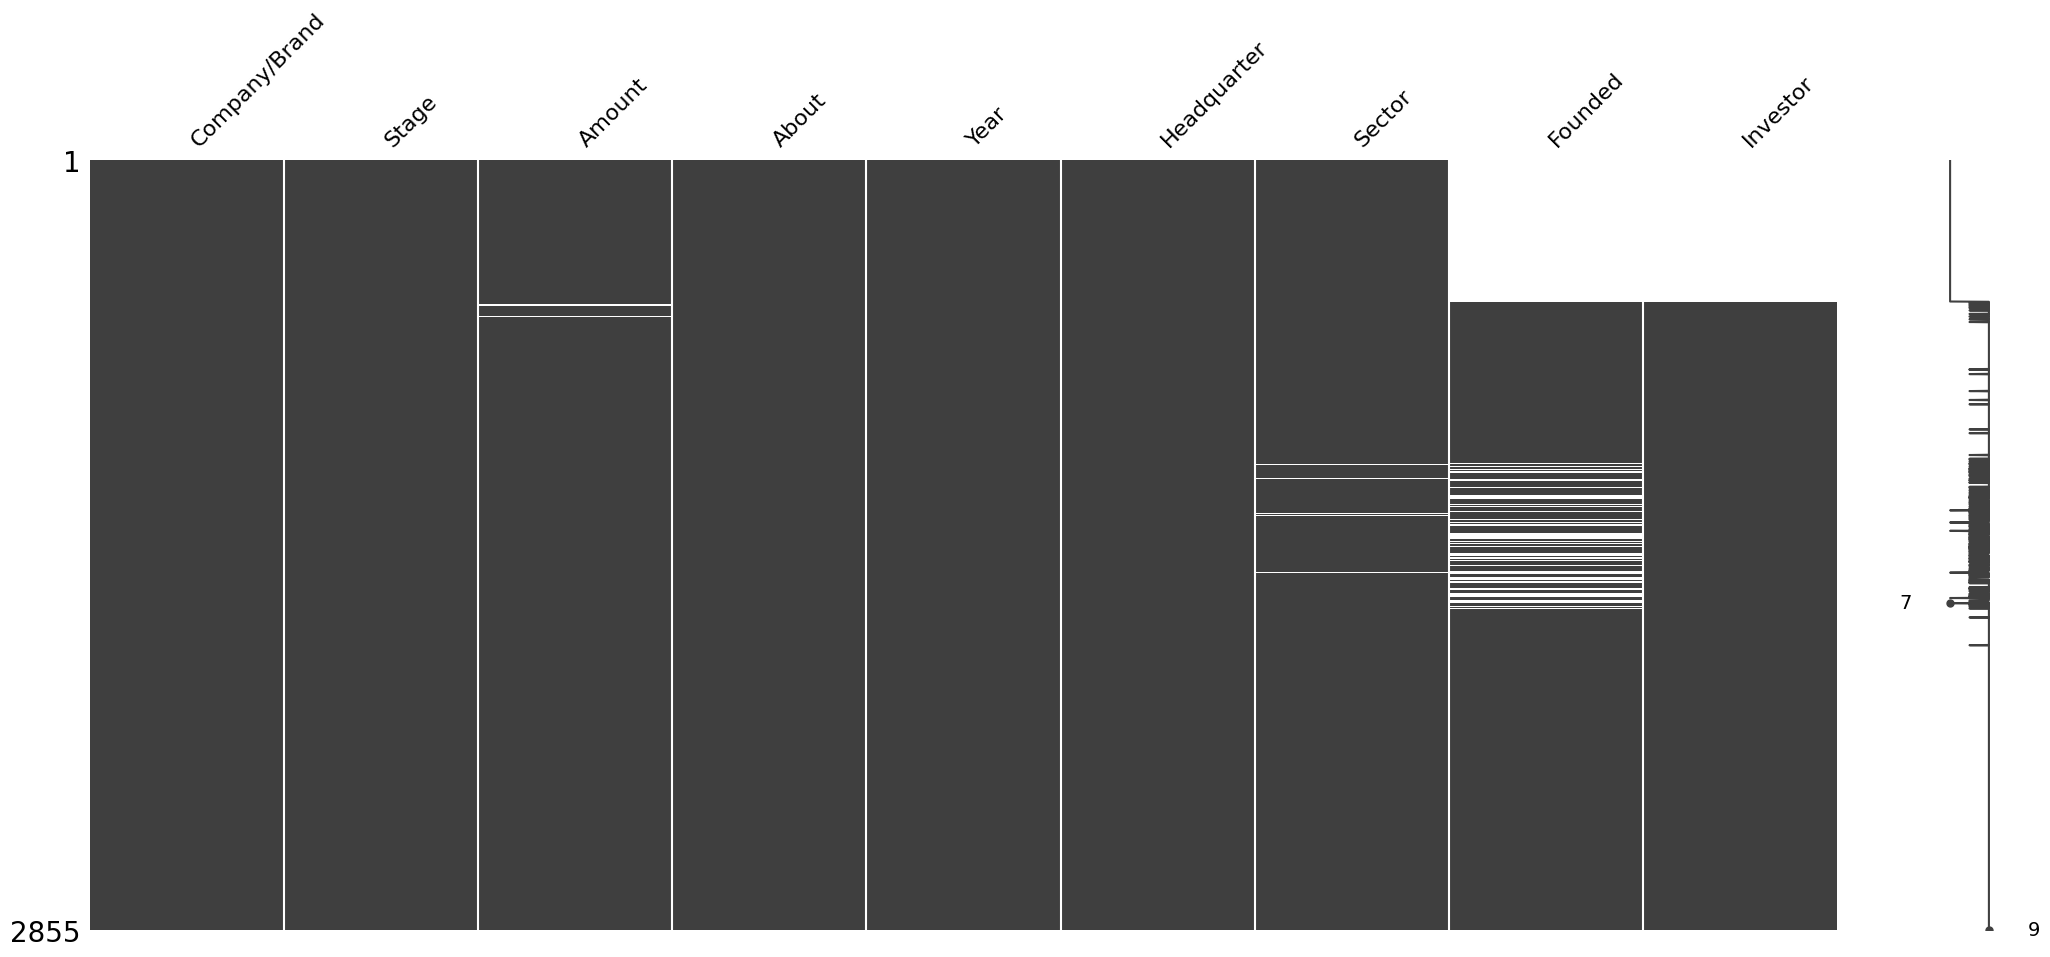

In [222]:
# visualize the null values
msno.matrix(df)

##### Clean 'Stage' Column

In [223]:
# look out for the unique values in the stage column
df["Stage"].unique()

array(['Early Stage Funding', 'Mid Stage Funding',
       'Special Funding Types', 'Other Funding Types',
       'Late Stage Funding', 'Late-Stage Funding', 'Early-Stage Funding'],
      dtype=object)

In [224]:
refined_stage = {
    'Early Stage Funding': 'Early-Stage Funding', 
    'Mid Stage Funding' : 'Mid-Stage Funding',
    'Late Stage Funding': 'Late-Stage Funding',
}

In [225]:
# Replacing the stage column values with the new stage
df["Stage"]= df["Stage"].replace(refined_stage)
df.Stage.unique()

array(['Early-Stage Funding', 'Mid-Stage Funding',
       'Special Funding Types', 'Other Funding Types',
       'Late-Stage Funding'], dtype=object)

In [226]:
df["Stage"].isna().sum()

0

##### Clean 'Headquarter' Column

In [227]:
# check for unique values in the column
df["Headquarter"].unique()

array(['Bangaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Thiruvananthapuram', 'Ernakulam', 'Kormangala', 'Uttar',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Kovai', 'Worli', 'Alleppey', 'Chandigarh',
       'Guindy', 'Lucknow', 'Telangana', 'Bengalore', 'Gurugram',
       'Nova-Brazil', 'San Francisco', 'Surat', 'Uttar pradesh',
       'Rajasthan', 'Bangalore', 'Tirunelveli, Tamilnadu', 'Undisclosed',
       'Singapore', 'Gujarat', 'Kerala', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       '

In [228]:
# check for nulls in the column
df['Headquarter'].isna().sum()

1

In [229]:
# Fill all Nulls in the headquarter column with Undisclosed
df["Headquarter"].fillna("Undisclosed",inplace=True)

In [234]:
# confirm changes
df["Headquarter"].isna().sum()

0

In [235]:
df['Headquarter'].unique()

array(['Bangaluru', 'Mumbai', 'Gurgaon', 'Uttar Pradesh', 'Hyderabad',
       'New Delhi', 'India', 'Karnataka', 'Chennai', 'Punjab', 'Kolkata',
       'Maharashtra', 'Rajasthan', 'Ahmedabad', 'Haryana', 'Cochin',
       'Gujarat', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Thiruvananthapuram', 'Ernakulam', 'Kormangala', 'Uttar',
       'Andheri', 'Tamil Nadu', 'Kochi', 'Powai', 'Andhra Pradesh',
       'Bhopal', 'Kovai', 'Worli', 'Kerala', 'Chandigarh', 'Lucknow',
       'Telangana', 'Bengalore', 'Gurugram', 'Nova-Brazil',
       'San Francisco', 'Uttar pradesh', 'Bangalore',
       'Tirunelveli, Tamilnadu', 'Undisclosed', 'Singapore',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Bihar', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'S

In [236]:
# Dictionary to manually map similar cities and fix misspellings
headquarter_mapping = {
    'Bangaluru': 'Bangalore',
    'Bangalore': 'Bangalore',
    'Bengalore': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Mumbai': 'Mumbai',
    'Gurgaon': 'Gurugram',
    'Gurugram': 'Gurugram',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Uttar pradesh': 'Uttar Pradesh',
    'Uttar': 'Uttar Pradesh',
    'Hyderabad': 'Hyderabad',
    'Hyderebad': 'Hyderabad',
    'New Delhi': 'New Delhi',
    'New delhi': 'New Delhi',
    'Delhi': 'New Delhi',
    'Rajasthan': 'Rajasthan',
    'Rajastan': 'Rajasthan',
    'Jaipur, Rajastan': 'Rajasthan',
    'Ahmedabad': 'Ahmedabad',
    'Ahmadabad': 'Ahmedabad',
    'Dhingsara, Haryana': 'Haryana',
    'Faridabad, Haryana': 'Haryana',
    'Cochin': 'Kochi',
    'Kochi': 'Kochi',
    'India': 'India',
    'Karnataka': 'Karnataka',
    'Chennai': 'Chennai',
    'Punjab': 'Punjab',
    'Kolkata': 'Kolkata',
    'Maharashtra': 'Maharashtra',
    'Gujarat': 'Gujarat',
    'Margão': 'Margão',
    'Indore': 'Indore',
    'Alwar': 'Alwar',
    'Kannur': 'Kannur',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Trivandrum': 'Thiruvananthapuram',
    'Trivandrum, Kerala, India': 'Thiruvananthapuram',
    'Ernakulam': 'Ernakulam',
    'Kormangala': 'Koramangala',
    'Andheri': 'Andheri',
    'Tamil Nadu': 'Tamil Nadu',
    'Tirunelveli, Tamilnadu': 'Tamil Nadu',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Bhopal': 'Bhopal',
    'Kovai': 'Coimbatore',
    'Coimbatore': 'Coimbatore',
    'Worli': 'Worli',
    'Kerala': 'Kerala',
    'Chandigarh': 'Chandigarh',
    'Lucknow': 'Lucknow',
    'Telangana': 'Telangana',
    'Telugana': 'Telangana',
    'Nova-Brazil': 'Overseas',
    'San Francisco': 'Overseas',
    'San Franciscao': 'Overseas',
    'San Francisco, California, United States': 'Overseas',
    'San Francisco, United States': 'Overseas',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'Overseas',
    'San Francisco Bay Area, West Coast, Western US': 'Overseas',
    'San Ramon, California': 'Overseas',
    'Frisco, Texas, United States': 'Overseas',
    'Plano, Texas, United States': 'Overseas',
    'California': 'Overseas',
    'Irvine, California, United States': 'Overseas',
    'Mountain View, CA': 'Overseas',
    'Paris, Ile-de-France, France': 'Overseas',
    'France': 'Overseas',
    'Sydney': 'Overseas',
    'Sydney, New South Wales, Australia': 'Overseas',
    'Palmwoods, Queensland, Australia': 'Overseas',
    'Milano, Lombardia, Italy': 'Overseas',
    'London, England, United Kingdom': 'Overseas',
    'London': 'Overseas',
    'New York, United States': 'Overseas',
    'New York': 'Overseas',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Overseas',
    'Shanghai, China': 'Overseas',
    'Jiaxing, Zhejiang, China': 'Overseas',
    'Berlin': 'Overseas',
    'Seattle': 'Overseas',
    'Bangkok': 'Overseas',
    'Warangal': 'Warangal',
    'Odisha': 'Odisha',
    'Orissia': 'Odisha',
    'Goa': 'Goa',
    'Bangladesh': 'Bangladesh',
    'Bangaldesh': 'Bangladesh',
    'Ranchi': 'Ranchi',
    'Hauz Khas': 'Hauz Khas',
    'West Bengal': 'West Bengal',
    'Silvassa': 'Silvassa',
    'Roorkee': 'Roorkee',
    'Panchkula': 'Panchkula',
    'Mangalore': 'Mangalore',
    'Beijing': 'Overseas',
    'Panaji': 'Panaji',
    'Satara': 'Satara',
    'Santra': 'Satara',
    'Jharkhand': 'Jharkhand',
    'Bhilwara': 'Bhilwara',
    'Guwahati': 'Guwahati',
    'Manchester': 'Overseas',
    'The Nilgiris': 'The Nilgiris',
    'Undisclosed': 'Undisclosed',
    'Singapore': 'Overseas',
    'Samastipur, Bihar': 'Bihar',
    'Samsitpur': 'Bihar',
    'Patna': 'Bihar',
    'Overseas': 'Overseas'
}

In [238]:
# Replace values in the 'Headquarter' column
df['Headquarter'] = df['Headquarter'].replace(headquarter_mapping)

In [239]:
# check for unique values in the column
df["Headquarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'Uttar Pradesh', 'Hyderabad',
       'New Delhi', 'India', 'Karnataka', 'Chennai', 'Punjab', 'Kolkata',
       'Maharashtra', 'Rajasthan', 'Ahmedabad', 'Haryana', 'Kochi',
       'Gujarat', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Thiruvananthapuram', 'Ernakulam', 'Koramangala', 'Andheri',
       'Tamil Nadu', 'Powai', 'Andhra Pradesh', 'Bhopal', 'Coimbatore',
       'Worli', 'Kerala', 'Chandigarh', 'Lucknow', 'Telangana',
       'Overseas', 'Undisclosed', 'Bihar', 'Bangladesh',
       'Tumkur, Karnataka', 'Dehradun',
       'Tangerang, Jawa Barat, Indonesia', 'Riyadh', 'Seoul', 'Warangal',
       'Odisha', 'Goa', 'Banglore', 'Ranchi', 'Hauz Khas', 'West Bengal',
       'Silvassa', 'Roorkee', 'Panchkula', 'Mangalore', 'Panaji',
       'Satara', 'Jharkhand', 'Bhilwara', 'Guwahati', 'The Nilgiris'],
      dtype=object)

##### Clean 'Investor' Column

In [240]:
# check for unique values in the column
df["Investor"].unique()

array([nan, 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [241]:
# check for nulls
df["Investor"].isna().sum()

525

In [242]:
# Replace all the Nulls with undisclosed
df["Investor"].fillna("Undisclosed",inplace=True)

In [243]:
# confirm changes
df["Investor"].isna().sum()

0

In [244]:
# check for the unique values after filling the nulls
df["Investor"].unique()

array(['Undisclosed', 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

##### Clean 'Founded' Column

In [245]:
# check out for unique Values in the column
df["Founded"].unique()

array([  nan, 2015., 2014., 2004., 2013., 2010., 2003., 2018., 2019.,
       2017., 2011., 2016., 2012., 2020., 2008., 1994., 1998., 2007.,
       1982., 2009., 1995., 2006., 1978., 1999., 2005., 1973., 2002.,
       2001., 2021., 1993., 1989., 2000., 1991., 1984., 1963.])

In [246]:
# check for Nulls in the column
df["Founded"].isna().sum()

739

Filling The Nulls in the founded column

Assumption: We made an assumption that all the values within the founded column with nulls should be replaced by the corresponding year the company received funding

In [247]:
def replace_founded_nulls(df):
    founded_column = df["Founded"]
    for i,year in enumerate(founded_column):
        if pd.isnull(year):
             # Replace null value with corresponding value in funded_year column
             df.at[i,"Founded"] = df.at[i, "Year"]
    return df

In [248]:
# call the function replace_founded function
replace_founded_nulls(df)

,Company/Brand,Stage,Amount,About,Year,Headquarter,Sector,Founded,Investor,cleaned_headquarter
0,TheCollegeFever,Early-Stage Funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Media & Entertainment,2018.0,Undisclosed,Bangalore
1,Happy Cow Dairy,Early-Stage Funding,584000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,2018.0,Undisclosed,Mumbai
2,MyLoanCare,Mid-Stage Funding,949000.0,Leading Online Loans Marketplace in India,2018,Gurugram,Retail,2018.0,Undisclosed,Gurugram
3,PayMe India,Special Funding Types,2000000.0,PayMe India is an innovative FinTech organizat...,2018,Uttar Pradesh,Financial Services,2018.0,Undisclosed,Uttar Pradesh
4,Eunimart,Early-Stage Funding,584000.0,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,IT & Technology,2018.0,Undisclosed,Hyderabad
...,...,...,...,...,...,...,...,...,...,...
2854,Gigforce,Early-Stage Funding,3000000.0,A gig/on-demand staffing company.,2021,Gurugram,Business Services,2019.0,Endiya Partners,Gurugram
2855,Vahdam,Late-Stage Funding,20000000.0,VAHDAM is among the world’s first vertically i...,2021,New Delhi,Consumer Goods,2015.0,IIFL AMC,New Delhi
2856,Leap Finance,Late-Stage Funding,55000000.0,International education loans for high potenti...,2021,Bangalore,Financial Services,2019.0,Owl Ventures,Bangalore
2857,CollegeDekho,Mid-Stage Funding,26000000.0,"Collegedekho.com is Student’s Partner, Friend ...",2021,Gurugram,Education,2015.0,"Winter Capital, ETS, Man Capital",Gurugram


In [269]:
# check for Nulls in the column
df["Founded"].isna().sum()

0

In [250]:
# View the rows with null values in the 'Founded' column
null_values_df = df[df["Founded"].isna()]
print("Rows with null values in the 'Founded' column:")
print(null_values_df)

Rows with null values in the 'Founded' column:
         Company/Brand                Stage      Amount  \
776        Jade Forest  Early-Stage Funding    250000.0   
778           FrontRow  Early-Stage Funding   3200000.0   
794              Traya  Early-Stage Funding   1000000.0   
858        Hire Me Car  Early-Stage Funding   1000000.0   
891                Uni  Early-Stage Funding  18500000.0   
...                ...                  ...         ...   
1657            Quicko  Other Funding Types    280000.0   
1658  Satin Creditcare  Other Funding Types  15000000.0   
1664      Leverage Edu  Other Funding Types   1500000.0   
1665             EpiFi  Early-Stage Funding  13200000.0   
1801     Smart Express  Early-Stage Funding  10000000.0   

                                                  About  Year    Headquarter  \
776   NATURALLY THE BEST From zero artificial ingred...  2020      New Delhi   
778             Comprehensive courses, taught by idols.  2020      Bangalore   
794 

In [251]:
# check out for unique Values in the column
df["Founded"].unique()

array([2018., 2015., 2014., 2004., 2013., 2010., 2003., 2019., 2017.,
       2011., 2016., 2012., 2020., 2008., 1994., 1998., 2007., 1982.,
       2009., 1995., 2006., 1978.,   nan, 1999., 2005., 1973., 2002.,
       2001., 2021., 1993., 1989., 2000., 1991., 1984., 1963.])

In [268]:
# Replace NaN values in 'Founded' column with corresponding values from 'Year' column
df.loc[df["Founded"].isna(), "Founded"] = df.loc[df["Founded"].isna(), "Year"]

In [251]:
# check for Nulls in the column
df["Founded"].isna().sum()

0

In [263]:
# confirm changes
df["Founded"].value_counts()

Founded
2018.0    776
2020.0    484
2019.0    265
2015.0    259
2016.0    223
2017.0    196
2014.0    122
2021.0     71
2013.0     66
2012.0     64
2011.0     60
2008.0     32
2010.0     26
2009.0     13
2007.0      9
2006.0      9
2000.0      6
2004.0      4
1994.0      4
1998.0      3
1999.0      3
2002.0      3
1989.0      2
1995.0      2
2003.0      2
1978.0      2
2005.0      2
1984.0      1
1991.0      1
1982.0      1
1993.0      1
2001.0      1
1973.0      1
1963.0      1
Name: count, dtype: int64

##### Clean 'Sector' Column

In [252]:
df["Sector"].unique()

array(['Media & Entertainment', 'Agriculture', 'Retail',
       'Financial Services', 'IT & Technology', 'Business Services',
       'Consumer Goods', 'Transportation & Logistics', 'Manufacturing',
       'Travel & Tourism', 'Education', 'Energy',
       'Healthcare & Life Sciences', 'Sports', 'Real Estate', 'Others',
       'AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Medtech',
       'Tyre management', 'Cloud company', 'Software company',
       'Venture capitalist', 'Renewable player', 'IoT startup',
       'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Compa

In [253]:
sector_mapping = {
    'IT & Technology': ['IT & Technology', 'IT', 'Tech Startup', 'Tech company', 'Tech platform', 'Tech', 'Technology', 'Digital tech', 'Technology'],
    'Financial Services': ['Financial Services', 'Finance company', 'Finance', 'Venture capitalist', 'Venture capital', 'Investment', 'Investment Tech', 'Investment Tech', 'Neo-banking'],
    'Healthcare & Life Sciences': ['Healthcare & Life Sciences', 'Healthcare', 'Health', 'HealthTech', 'Healthcare & Edtech', 'Healthcare/Edtech', 'Health and Fitness', 'Life sciences', 'Biotechnology company', 'Biopharma', 'Biotech', 'Biotechnology company', 'Biopharma'],
    'Consumer Goods': ['Consumer Goods', 'Consumer appliances', 'FMCG', 'Fashion', 'Fashion startup', 'Fashion Tech', 'Fashion Tech', 'Fashion', 'Food', 'Food Industry', 'Food & Bevarages', 'Food & Beverages', 'Food & Logistics', 'Food devlivery', 'Food Startup', 'FoodTech', 'Foodtech', 'Food and Beverages', 'Beverage', 'Beverages', 'Craft Beer', 'Food diet'],
    'Business Services': ['Business Services', 'Business Services', 'Service industry', 'Marketing company', 'Marketing startup', 'Sles and marketing', 'Sales & Services', 'Marketing', 'Consultancy'],
    'Media & Entertainment': ['Media & Entertainment', 'Media', 'Digital Media', 'Entertainment', 'Publication', 'Virtual auditing startup', 'Video sharing platform', 'Video streaming platform', 'Video platform', 'Video', 'Video', 'Video personalization', 'Video streaming platform', 'Visual Media', 'Media Tech', 'Media & Networking'],
    'Education': ['Education', 'Education', 'EdTech', 'EdtTech', 'Edtech', 'EdTech Startup', 'Educatio', 'E-learning'],
    'Manufacturing': ['Manufacturing', 'Manufacturing', 'Automobiles', 'Automobile', 'Automotive Startup', 'Automotive Startup', 'Automotive company', 'Automotive', 'Automobile Technology', 'Automotive tech'],
    'Retail': ['Retail', 'Retail Tech', 'Retail startup', 'Reatil startup', 'Retail Aggregator'],
    'Transportation & Logistics': ['Transportation & Logistics', 'Transportation & Logistics', 'Transportation', 'Logistics', 'Logistics', 'Transport', 'Transportation', 'Logitech', 'Supply chain, Agritech', 'Supply chain', 'Transport Automation', 'Transport Automation', 'Transport', 'Transport', 'Transport & Rentals', 'Transport & Rentals'],
    'Sports': ['Sports', 'Sports', 'Gaming', 'Gaming startup'],
    'Agriculture': ['Agriculture', 'Agriculture', 'Agritech', 'Agritech startup', 'Agri tech', 'AgriTech', 'Agri tech', 'AgriTech', 'AgriTech', 'Agri tech', 'Aero company'],
    'Real Estate': ['Real Estate', 'Real estate'],
    'Travel & Tourism': ['Travel & Tourism', 'Travel & Tourism', 'Travel', 'Travel', 'Travel', 'TravelTech', 'Travel tech', 'Travel tech'],
    'Energy': ['Energy', 'Energy', 'Electricity', 'Renewable player', 'Solar solution', 'Solar solution', 'Renewable player', 'Renewable player', 'Solar Solution', 'Solar Monitoring Company', 'Solar SaaS', 'Solar SaaS'],
    'Others': ['Others', 'Others']
}

# Function to map sector based on mapping dictionary
def map_sector(sector):
    for key, values in sector_mapping.items():
        if sector in values:
            return key
    return np.nan  # If sector is not found in mapping

# Replace 'Sector' column with mapped sectors
df['Sector'] = df['Sector'].apply(map_sector)

In [254]:
# confirm changes
df.Sector.unique()

array(['Media & Entertainment', 'Agriculture', 'Retail',
       'Financial Services', 'IT & Technology', 'Business Services',
       'Consumer Goods', 'Transportation & Logistics', 'Manufacturing',
       'Travel & Tourism', 'Education', 'Energy',
       'Healthcare & Life Sciences', 'Sports', 'Real Estate', 'Others',
       nan], dtype=object)

In [255]:
# check for Nulls in the column
df["Sector"].isna().sum()

572

In [256]:
# confirm changes
df["Sector"].value_counts()

Sector
IT & Technology               393
Financial Services            292
Education                     284
Consumer Goods                236
Healthcare & Life Sciences    217
Media & Entertainment         142
Business Services             139
Retail                        118
Transportation & Logistics    111
Manufacturing                 105
Agriculture                    78
Sports                         45
Travel & Tourism               41
Real Estate                    34
Energy                         32
Others                         16
Name: count, dtype: int64

In [257]:
# Replace all the Nulls with undisclosed
df["Sector"].fillna("Undisclosed",inplace=True)

In [258]:
# check for Nulls in the column
df["Sector"].isna().sum()

0

##### Clean 'Amount' Column

In [259]:
# View unique values in the Amount column
df['Amount'].unique()

array([2.5000000e+05, 5.8400000e+05, 9.4900000e+05, 2.0000000e+06,
       1.6000000e+06, 2.3360000e+05, 7.3000000e+05, 1.4600000e+06,
       1.5000000e+05, 1.1000000e+06, 7.3000000e+03, 6.0000000e+06,
       6.5000000e+05, 5.1100000e+05, 9.3440000e+05, 4.0000000e+06,
       2.9200000e+05, 1.0000000e+06, 5.0000000e+06, 4.3800000e+05,
       2.8000000e+06, 1.7000000e+06, 1.3000000e+06, 7.3000000e+04,
       1.8250000e+05, 2.1900000e+05, 5.0000000e+05, 1.5184000e+06,
       6.5700000e+05, 1.3400000e+07, 3.6500000e+05, 3.8544000e+05,
       1.1680000e+05, 8.7600000e+02, 9.0000000e+06, 1.0000000e+05,
       2.0000000e+04, 1.2000000e+05, 4.9640000e+05, 4.9932000e+06,
       8.7600000e+06, 1.4600000e+07, 2.9200000e+07, 1.4600000e+03,
       3.6500000e+06, 8.0300000e+06, 3.5040000e+06, 1.7520000e+06,
       3.6500000e+07, 6.4240000e+05, 8.7600000e+05, 9.4900000e+06,
       2.3360000e+07, 1.0220000e+06, 1.4965000e+06, 1.7520000e+04,
       7.5920000e+07, 1.4000000e+06, 1.2000000e+06, 2.2000000e

In [260]:
# check for nulls in the amount column
df["Amount"].isna().sum()

12

In [261]:
# Calculate the median of the column
median_value = df['Amount'].median()

# Fill NaN values in the column with the median
df['Amount'] = df['Amount'].fillna(median_value)

In [263]:
# confirm changes
df['Amount'].isna().sum()

0

<Axes: >

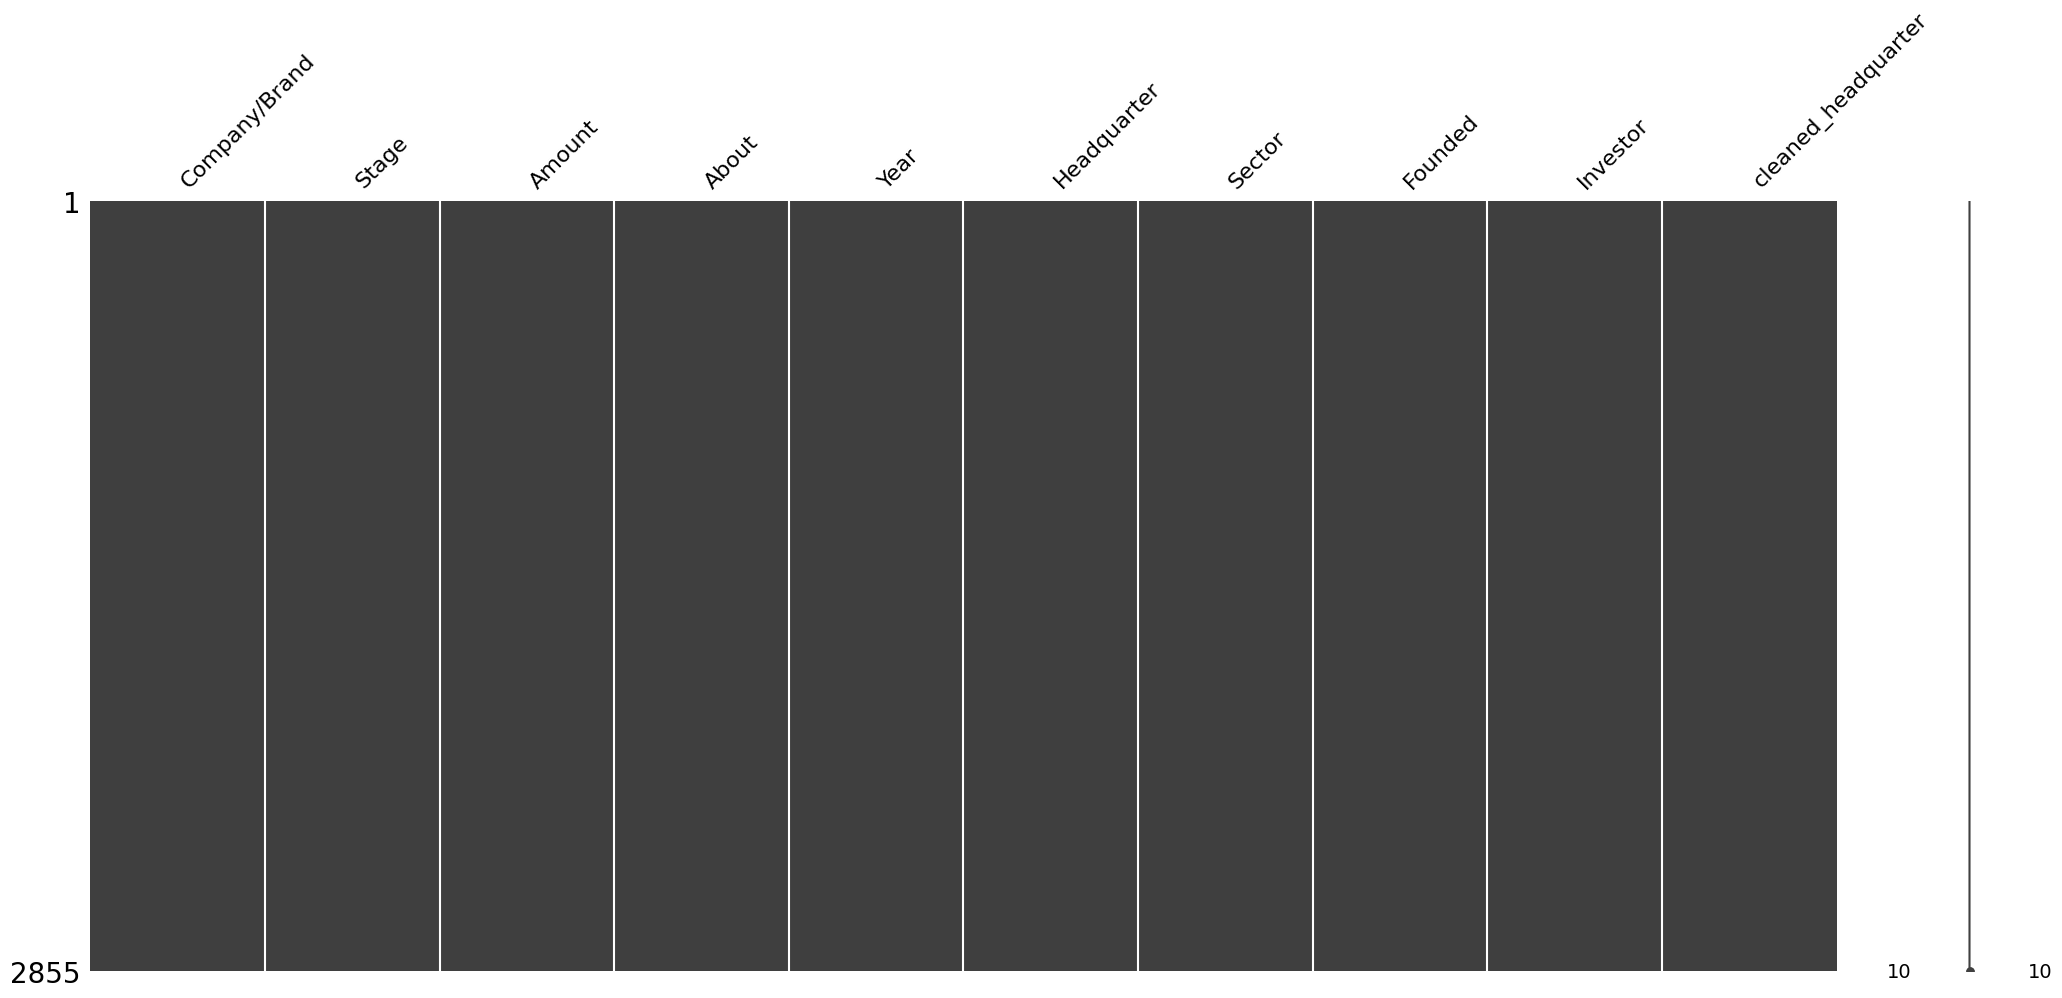

In [270]:
# check for nulls in the dataset
msno.matrix(df)

In [264]:
# Create a csv of the final dataset
df.to_csv("Indian_startup_ecosystem_final_dataset.csv")

## EDA of Concatenated Dataset

In [265]:
# view top 5 rows
df.head()

,Company/Brand,Stage,Amount,About,Year,Headquarter,Sector,Founded,Investor,cleaned_headquarter
0,TheCollegeFever,Early-Stage Funding,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Media & Entertainment,2018.0,Undisclosed,Bangalore
1,Happy Cow Dairy,Early-Stage Funding,584000.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,2018.0,Undisclosed,Mumbai
2,MyLoanCare,Mid-Stage Funding,949000.0,Leading Online Loans Marketplace in India,2018,Gurugram,Retail,2018.0,Undisclosed,Gurugram
3,PayMe India,Special Funding Types,2000000.0,PayMe India is an innovative FinTech organizat...,2018,Uttar Pradesh,Financial Services,2018.0,Undisclosed,Uttar Pradesh
4,Eunimart,Early-Stage Funding,584000.0,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,IT & Technology,2018.0,Undisclosed,Hyderabad


In [271]:
# check for nulls
df.isna().sum()

Company/Brand          0
Stage                  0
Amount                 0
About                  0
Year                   0
Headquarter            0
Sector                 0
Founded                0
Investor               0
cleaned_headquarter    0
dtype: int64

In [272]:
# perform final description 
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,2855,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2855,5,Other Funding Types,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,2855.0,NaN,NaN,NaN,97254161.686865,3098434442.090965,876.0,730000.0,2500000.0,7887850.0,150000000000.0
About,2855,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2855.0,NaN,NaN,NaN,2020.017513,1.087794,2018.0,2020.0,2020.0,2021.0,2021.0
Headquarter,2855,61,Bangalore,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2855,17,Undisclosed,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,2855.0,NaN,NaN,NaN,2016.924694,3.954312,1963.0,2016.0,2018.0,2019.0,2021.0
Investor,2855,1771,Undisclosed,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaned_headquarter,2855,61,Bangalore,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# check the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 2858
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company/Brand        2855 non-null   object 
 1   Stage                2855 non-null   object 
 2   Amount               2855 non-null   float64
 3   About                2855 non-null   object 
 4   Year                 2855 non-null   int64  
 5   Headquarter          2855 non-null   object 
 6   Sector               2855 non-null   object 
 7   Founded              2855 non-null   float64
 8   Investor             2855 non-null   object 
 9   cleaned_headquarter  2855 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 309.9+ KB


### Univariate analysis

array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Founded'}>, <Axes: >]], dtype=object)

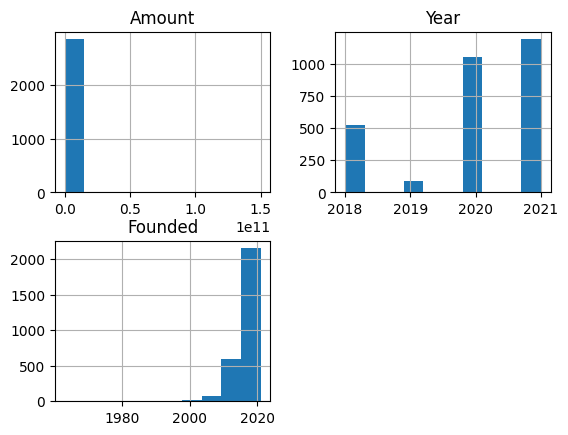

In [274]:
# plot histogram on the numerical columns 
df.hist()

<Axes: >

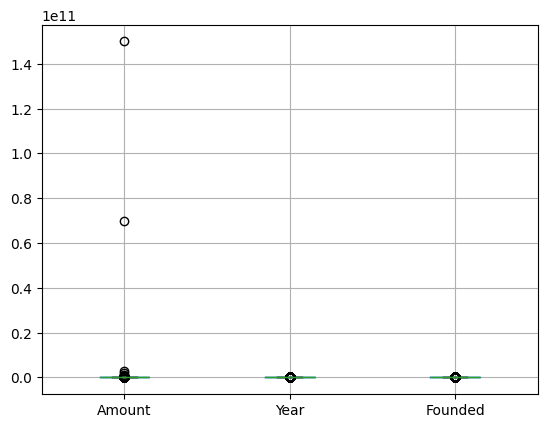

In [275]:
# box plot to check for outliers and the quartiles of the dataset
df.boxplot()

From the plot above, it can be seen that there are few outliers in the amount column

## Hypothesis Testing Using One Way ANOVA Testing (Analysis of Variance)

## Hypotheses:

- Null Hypothesis (H0): Funding amounts are evenly distributed across all sectors in the Indian startup ecosystem from 2018 to 2021, and technology-driven startups do not receive higher average funding compared to other sectors.

- Alternative Hypothesis (H1): Funding amounts are not evenly distributed across all sectors in the Indian startup ecosystem from 2018 to 2021, and technology-driven startups receive higher average funding compared to other sectors.

significance-value(α-value) = 0.05%

In [276]:
import scipy.stats as stats

# Create separate arrays for each sector's amounts
sector_groups = [df[df['Sector'] == sector]['Amount'] for sector in df['Sector'].unique()]

# Perform ANOVA
F, p = stats.f_oneway(*sector_groups)

# Print the results
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.679, p=0.817


### Inference From The Testing
Since the p-value = 0.817 after the test is greater than the significance value of 0.05, we fail to reject the Null Hypothesis with an F-statistics of 0.679

This means that we do not have sufficient statistical evidence to conclude that there is a significant difference in funding amounts across sectors. Therefore, based on the ANOVA results, we cannot support the alternative hypothesis that technology-driven startups receive higher average funding compared to other sectors.

In summary, the ANOVA results suggest that, within the given dataset and under the assumptions of the test, there is no significant difference in funding amounts across sectors, supporting the null hypothesis.

### Answering Key Questions

##### 1. Which sectors (Top 5) are receiving the most investment in the Indian startup ecosystem?
We shall investigate which sectors stand out in terms of average funding received to identify potential investment hotspots.


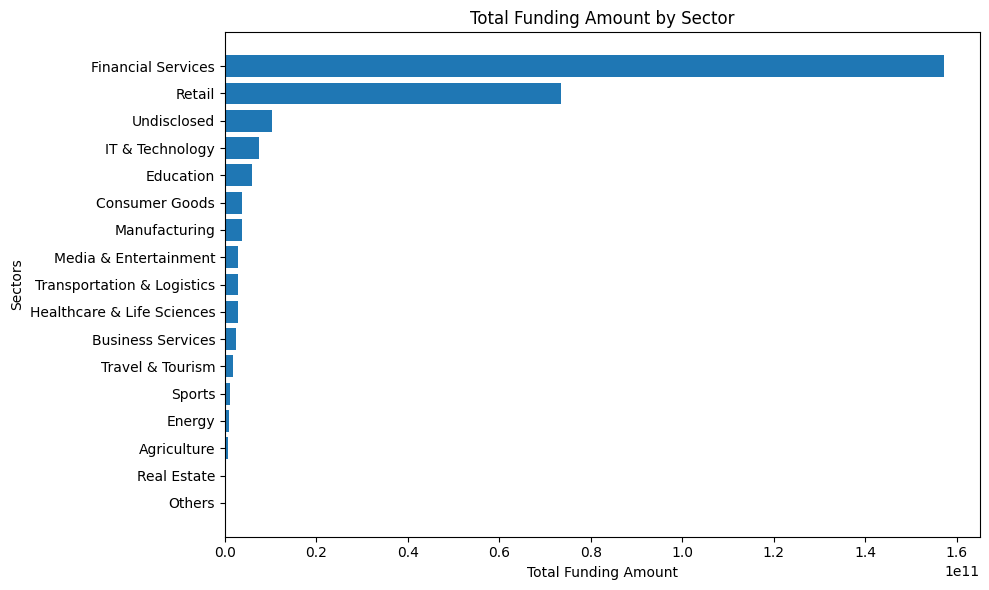

In [277]:
# Group by both 'sector' and 'time' and sum the 'amount'
grouped_data = df.groupby('Sector')['Amount'].sum().reset_index()

# Sort the DataFrame by the sum of 'amount' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Amount', ascending=True)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_data_sorted['Sector'], grouped_data_sorted['Amount'])

# Adding labels and title
plt.xlabel('Total Funding Amount')
plt.ylabel('Sectors')
plt.title('Total Funding Amount by Sector')

# Save the plot to a file
plt.savefig("Total Funding Amount by Sector.png")

# Show plot
plt.xticks()
plt.tight_layout()
plt.show()

From the chart above,

It is evident the financial sector received the most funding over the years, amassing hundereds of billions, followed by the Retail sector.
The Real Estate, Agriculture, Sports and Energy sector receive little or no funding

##### 2. How do funding amounts vary across different startup sectors, yearly?
We will analyze year-over-year trends to determine if funding increased, decreased, or remained stable, providing insight into overall investment climate changes.

<Figure size 1200x600 with 0 Axes>

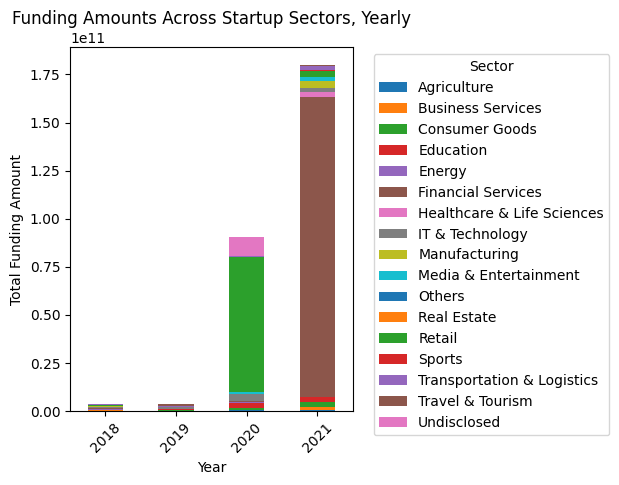

In [278]:
# Group the data by year and sector and calculate the total funding amount
sector_yearly_funding = df.groupby(['Year', 'Sector'])['Amount'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))
sector_yearly_funding.plot(kind='bar', stacked=True)
plt.title('Funding Amounts Across Startup Sectors, Yearly')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the fig. above, More funds were given out in the year 2021 and Financial Services received the most funding.

##### 3. At what stage do businesses raise the most money across sectors?
We shall examine funding distribution across different stages (e.g., seed, early, growth) to understand where investors are most likely to commit significant capital.


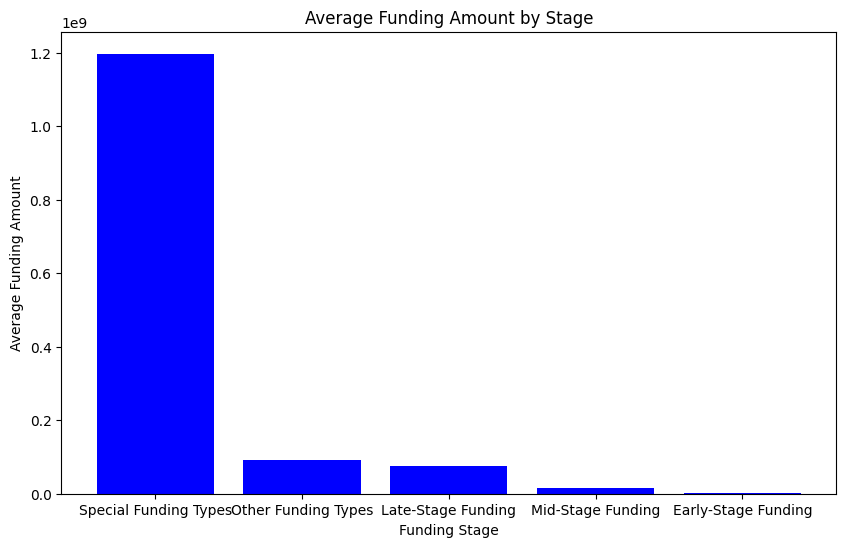

In [279]:
funding_by_stage =df.groupby('Stage')[['Amount']].mean().sort_values('Amount', ascending=False)

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(funding_by_stage.index, funding_by_stage['Amount'], color='blue')
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount')
plt.title('Average Funding Amount by Stage')

# Save the plot to a file
plt.savefig("Average Funding Amount by Stage.png")

# Show the plot
plt.show()

Companies often receive special types of funding at certain stages of their growth due to several factors:

- Risk Profile: In the early stages, companies are often considered riskier investments due to uncertainties related to their business model, market traction, and technology. As a result, they may seek specialized funding sources such as seed funding or angel investment, which are more willing to take on higher risk in exchange for potential high returns.

- Capital Requirements: Different stages of a company's growth require varying amounts of capital to fund operations, research and development, marketing, and expansion. Specialized funding sources, such as venture capital or private equity, are tailored to meet the capital needs of companies at specific stages, providing larger investments as companies mature.

- Strategic Alignment: Investors often specialize in particular stages or industries where they have expertise or strategic interest. For example, early-stage startups may attract angel investors who have experience in entrepreneurship or specific sectors. As companies grow, they may seek venture capital firms that specialize in their industry or stage of growth, providing not only funding but also strategic guidance and networking opportunities.

- Valuation and Ownership: Specialized funding sources may offer terms that are more favorable to entrepreneurs, such as higher valuations or less dilution of ownership, particularly in the early stages when companies are still establishing their market position and intellectual property.

Overall, specialized funding at different stages of a company's growth reflects the evolving needs, risks, and opportunities that accompany each stage, as well as the preferences and expertise of investors.

##### 4. Which are the top 5 locations that received funding?
We will analyze funding distribution across various cities to determine if certain locations are emerging as major startup hubs.

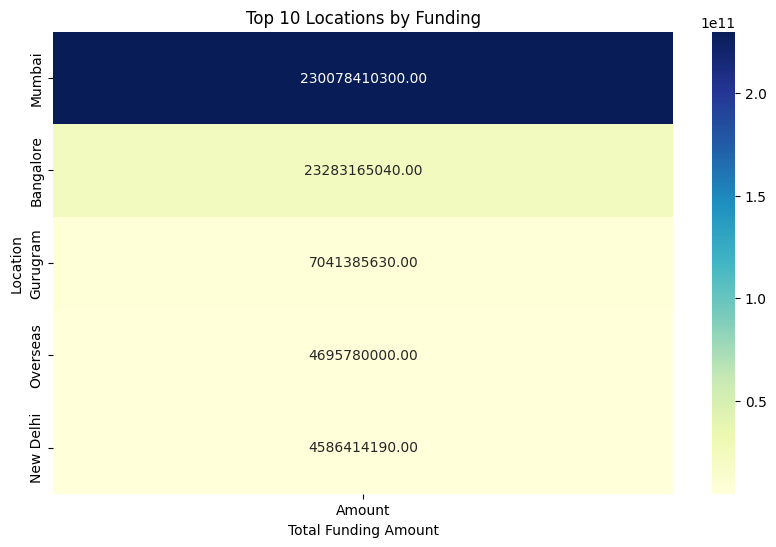

In [280]:
# Top 10 Locations by Funding
# Grouping data by location and summing up the funding amount, then sorting in descending order
top_locations = df.groupby('Headquarter')[['Amount']].sum().sort_values('Amount', ascending=False).head(5)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Generate the heatmap
heatmap = sns.heatmap(top_locations, annot=True, fmt=".2f", cmap="YlGnBu")

# Set the title and labels
heatmap.set_title('Top 10 Locations by Funding')
heatmap.set_xlabel('Total Funding Amount')
heatmap.set_ylabel('Location')

# Save the plot to a file
plt.savefig("top_10_locations.png")

# Display the plot
plt.show()

From observations in the chart, Maharashtra is the top location which receives the highest funding.


##### 5. Are there specific cities that have become hubs for certain industries or types of startups?
We will identify which cities(headquarters) are becoming specialized hubs for particular sectors or types of startups.

<Figure size 1200x800 with 0 Axes>

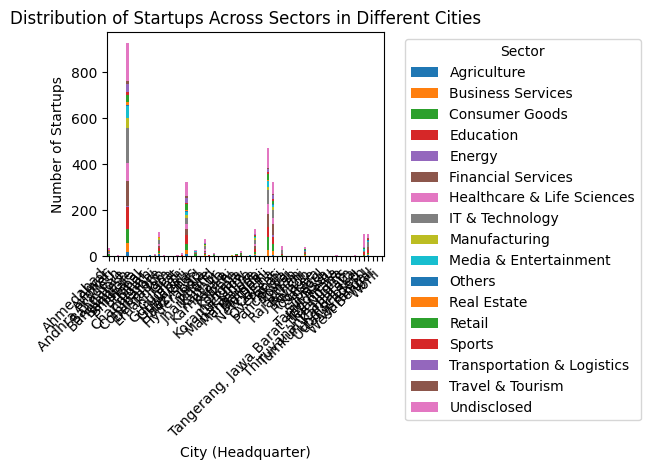

In [281]:

#Grouping data by city (Headquarter) and Sector, then counting the number of startups in each category
city_sector_counts = df.groupby(['Headquarter', 'Sector']).size().unstack(fill_value=0)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plotting a stacked bar chart for each city
city_sector_counts.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Distribution of Startups Across Sectors in Different Cities')
plt.xlabel('City (Headquarter)')
plt.ylabel('Number of Startups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 6. Who are the top 3 investors in the top 5 sectors?
We will identify key investors and their sector preferences to gauge influential players and sector-specific investment trends.

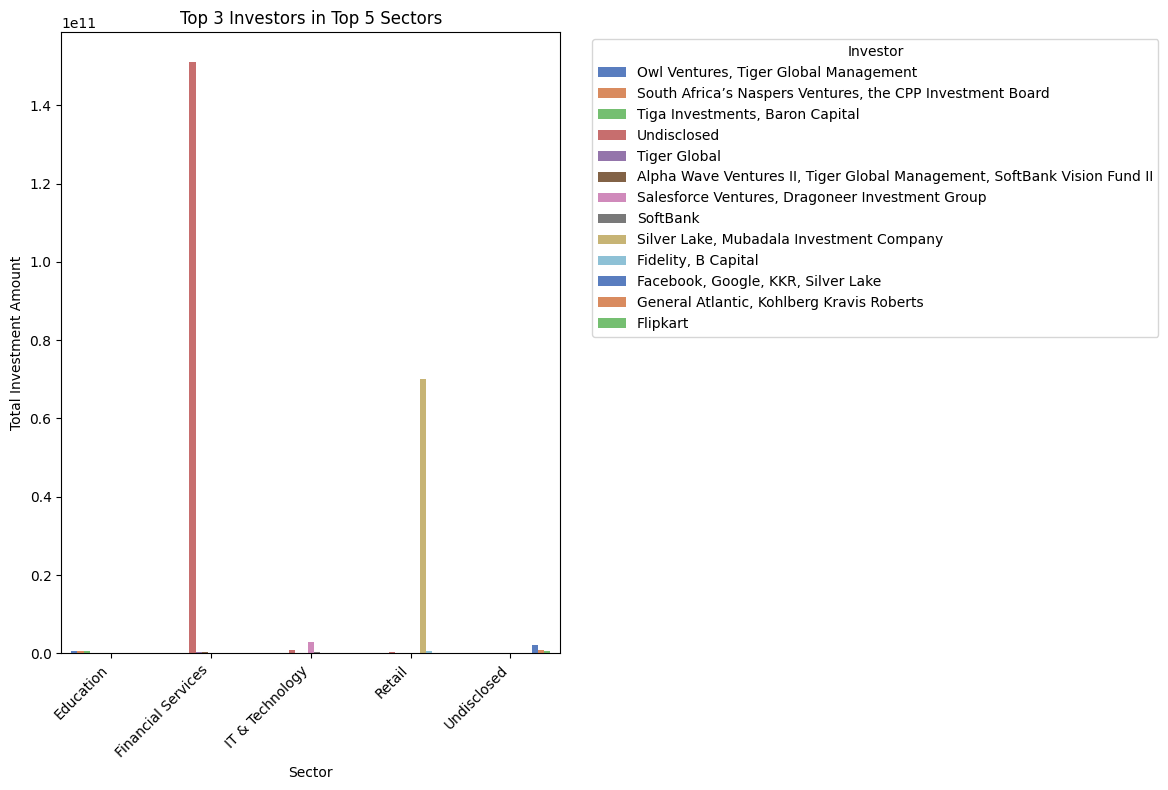

In [282]:
# Grouping data by sector and investor, then summing up the investment amount for each investor in each sector
sector_investor_amount = df.groupby(['Sector', 'Investor'])['Amount'].sum().reset_index()

# Finding the top 5 sectors based on total investment amount
top_5_sectors = sector_investor_amount.groupby('Sector')['Amount'].sum().nlargest(5).index

# Filtering data for only the top 5 sectors
top_5_sectors_data = sector_investor_amount[sector_investor_amount['Sector'].isin(top_5_sectors)]

# Finding the top 3 investors in each of the top 5 sectors
top_3_investors = top_5_sectors_data.groupby('Sector').apply(lambda x: x.nlargest(3, 'Amount'))

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plotting a grouped bar chart for each sector
sns.barplot(x='Sector', y='Amount', hue='Investor', data=top_3_investors, palette='muted')

# Set the title and labels
plt.title('Top 3 Investors in Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Total Investment Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.legend(title='Investor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()